# ML Applicaiton: Applying ML Models to the transition data

### Tasks included:
- Reading transition matrices 
- Reading P/AUC scores 
- Apply ML models 
- Select features and apply ML models 

## Imports and system info

In [3]:
import HumachLab_Global 
HumachLab_Global.get_system_info()


List of OS platforms and codes
___________________________________________
0 Darwin
1 Windows
2 Linux
===> "1 - Windows" OS is detected.

Processor (CPU) details: 
___________________________________________
{'python_version': '3.7.10.final.0 (64 bit)', 'cpuinfo_version': [8, 0, 0], 'cpuinfo_version_string': '8.0.0', 'arch': 'X86_64', 'bits': 64, 'count': 40, 'arch_string_raw': 'AMD64', 'vendor_id_raw': 'GenuineIntel', 'brand_raw': 'Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz', 'hz_advertised_friendly': '2.2000 GHz', 'hz_actual_friendly': '2.2010 GHz', 'hz_advertised': [2200000000, 0], 'hz_actual': [2201000000, 0], 'l2_cache_size': 2621440, 'stepping': 1, 'model': 79, 'family': 6, 'l3_cache_size': 26214400, 'flags': ['3dnow', '3dnowprefetch', 'abm', 'acpi', 'adx', 'aes', 'apic', 'avx', 'avx2', 'bmi1', 'bmi2', 'clflush', 'cmov', 'cx16', 'cx8', 'dca', 'de', 'ds_cpl', 'dtes64', 'dts', 'erms', 'est', 'f16c', 'fma', 'fpu', 'fxsr', 'hle', 'ht', 'ia64', 'intel_pt', 'invpcid', 'lahf_lm', 'mca',

(1,
 'Windows',
 {'brand_raw': 'Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz',
  'arch_string_raw': 'AMD64',
  'arch': 'X86_64',
  'count': 40,
  'python_version': '3.7.10.final.0 (64 bit)',
  'CPU_usage': 100.0,
  'RAM_usage': 84.8,
  'Total_RAM': 127.9,
  'Used_RAM': 108.4,
  'Available_RAM': 19.5},
 [1, 2, 3, 4, 5, 6, 7],
 1)

In [4]:
'''
Importing necessary modules
'''

import os
import sys
import datetime

print(os.getcwd())
os.chdir(os.getcwd())
print(f"{os.getcwd()}\HumachLab")
sys.path.append(f"{os.getcwd()}\HumachLab")
sys.path.insert(0, os.path.abspath('./HumachLab'))

import itertools as it
import re
import pickle
import json

import copy
from pprint import pprint

import glob

import math
import numbers

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc, rcParams
%matplotlib inline
import seaborn as sns


from sklearn.utils import resample
# from imblearn.over_sampling import SMOTE

import HumachLab_Global
from HumachLab import * 
# from HumachLab.HumachLab_Global import *
# import HumachLab_Global
HumachLab_Global.get_system_info()

import mne

# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.figsize"] = (20,6)

C:\Users\aliem\OneDrive - Deakin University\_MyResearch\PhD_Research\HML_IHC_Sleep_Data_Analysis
C:\Users\aliem\OneDrive - Deakin University\_MyResearch\PhD_Research\HML_IHC_Sleep_Data_Analysis\HumachLab

List of OS platforms and codes
___________________________________________
0 Darwin
1 Windows
2 Linux
===> "1 - Windows" OS is detected.

Processor (CPU) details: 
___________________________________________
{'python_version': '3.7.10.final.0 (64 bit)', 'cpuinfo_version': [8, 0, 0], 'cpuinfo_version_string': '8.0.0', 'arch': 'X86_64', 'bits': 64, 'count': 40, 'arch_string_raw': 'AMD64', 'vendor_id_raw': 'GenuineIntel', 'brand_raw': 'Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz', 'hz_advertised_friendly': '2.2000 GHz', 'hz_actual_friendly': '2.2010 GHz', 'hz_advertised': [2200000000, 0], 'hz_actual': [2201000000, 0], 'l2_cache_size': 2621440, 'stepping': 1, 'model': 79, 'family': 6, 'l3_cache_size': 26214400, 'flags': ['3dnow', '3dnowprefetch', 'abm', 'acpi', 'adx', 'aes', 'apic', 'avx', 

## Get directory list: Subject-wise

In [5]:
'''
Explore the contents/files in the directory
'''

def get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=None):
    '''
    directory: valid path string, path_type: p_file|p_dir, containes: string, extension: valid string file extension 
    '''
    os_path = os.path
    list_of_paths = []
        
    path_keywords = "*"
    if containes:
        path_keywords = f"{path_keywords}{containes}*"
    
    if extension:
        path_keywords = f"{path_keywords}.{extension}"
        
    complete_path = f"{directory}/{path_keywords}"
    print(f"============> {path_keywords}, {path_type}, {complete_path}")
    
    all_paths = glob.glob(complete_path) 
    all_temp_paths = None
    list_of_paths = None
    
    if path_type:
        if path_type=="p_file":
            all_temp_paths = [path.replace("\\", "/") for path in all_paths if (os_path.exists(path) and os_path.isfile(path))]
        if path_type=="p_dir":
            all_temp_paths = [path.replace("\\", "/") for path in all_paths if (os_path.exists(path) and os_path.isdir(path))]   
    else:
        all_temp_paths = [path.replace("\\", "/") for path in all_paths]
        
    if exclude:
        # print(all_temp_paths)
        # print(len(all_temp_paths), exclude)
        # list_of_paths = [path for path in all_temp_paths for ex in exclude if ex not in path]
        # list_of_paths = [path for ex in exclude for path in all_temp_paths if ex not in path]
        list_of_paths = [path for path in all_temp_paths if not any((ex in path) for ex in exclude)]
        # list_of_paths = [path for ex in exclude if any(ex not in path for path in all_temp_paths)]
        # any(substring in string for substring in substring_list)
        # print(len(list_of_paths))
    else:
        list_of_paths = all_temp_paths.copy()
    
    return list_of_paths

In [6]:
root_directory = "./Results/" 
data_dir = "/_Combined/"
# data_directory = "./Results/" 
# tran_directory = "/Transition_Matrices"
# result_directory = "./Results/_Combined" 
result_subdirctory = "/_Classification"
prob_cal_from_all = False  
result_subdir = ['STP_From_Same_Stages', 'STP_From_All_Stages'][int(prob_cal_from_all)]
data_directory = f"{root_directory}{data_dir}{result_subdir}"
result_directory = f"{root_directory}{result_subdirctory}" 
wake_state_trimmed = True  
result_subdirectory = f"Subject_One_Night{'_TrimW' if wake_state_trimmed else ''}"  ###"Subject_Combined_Record"  "Subject_Separate_Record"  "Subject_One_Night" "Subject_One_Night_TrimW"   ## Change for new type of result 
data_subdirectory = ["CAP_Sleep", "Sleep_EDFX", "SDRC"] 
metadata_subdirectory = ["CAP_Sleep", "Sleep_EDFX", "SDRC"] 
tran_matrix_type = ["count", "dura", "proba"] 
annotation_type = ['annot', 'tran'] 
tran_step = 3
exclude_contents_in_dataset_directory = ["SHA256SUMS", "RECORDS"]
exclude_contents_in_result_directory = ["SHA256SUMS", "RECORDS", "all_annotions", "annot_sequence", "transition_sequence", "hypno", "DATASET_CHANGELOG"]
sleep_stage_labels = ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
sleep_stage_labels_dict = {'W':0, 'S1':1, 'S2':2, 'S3':3, 'S4':4, 'REM':5}
sleep_stage_names_dict = {'W':0, 'S1':1, 'S2':2, 'S3':3, 'S4':4, 'R':5}
list_of_paths = None 
data_directory, result_directory

# directory = dataset_directory
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type="p_file", containes=None, extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type="p_dir", containes=None, extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes="nfle", extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension="edf", exclude=None) 
# list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=exclude_contents_in_dataset_directory) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=None) 
# # pprint(list_of_paths)
# list_of_paths

('./Results//_Combined/STP_From_Same_Stages', './Results//_Classification')

### Get basic information and transition matrix

In [7]:
def get_demography_info(tmp_dir): 
#     list_of_tran_mat_paths = [] 
    all_demography_df = pd.read_csv(f"{tmp_dir}/all_demography.csv", index_col=False) 
    all_demography_detail_df = pd.read_csv(f"{tmp_dir}/all_demography_detail.csv", index_col=False)  
    return all_demography_df, all_demography_detail_df 


info_type="sub" ##"sub"/"file"  ## Change for new type of result 
annot_type = annotation_type[0]   ## Change for different data preparation for 'annot' and 'tran' 

all_demography_df, all_demography_detail_df = get_demography_info(data_directory) 
all_demography_df  

,#,Dataset,Category_Name,Category,Total_Count,Male_Count,Female_Count,Total_AgeRange,Male_AgeRange,Female_AgeRange
0,1,CAP_Sleep,Bruxism,brux,2,2,0,23 - 34,23 - 34,0 - 0
1,2,CAP_Sleep,Sleep-Disordered Breathing,sdb,4,4,0,65 - 78,65 - 78,0 - 0
2,3,CAP_Sleep,Insomnia,ins,9,4,5,47 - 82,54 - 82,47 - 59
3,4,CAP_Sleep,Narcolepsy,narco,5,2,3,18 - 44,24 - 43,18 - 44
4,5,CAP_Sleep,Nocturnal Frontal Lobe Epilepsy,nfle,40,21,19,14 - 67,14 - 44,16 - 67
5,6,CAP_Sleep,Periodic Leg Movements,plm,10,7,3,40 - 62,40 - 62,50 - 52
6,7,CAP_Sleep,REM Behavior Disorder,rbd,22,19,3,58 - 82,58 - 82,73 - 76
7,8,CAP_Sleep,No Pathology (Controls),n,16,7,9,23 - 42,23 - 34,24 - 42
8,10,CAP_Sleep,Total,NaN,108,66,42,14 - 82,14 - 82,16 - 76
9,11,CAP_Sleep,Sleep Disorders,dis,92,59,33,14 - 82,14 - 82,16 - 76


In [6]:
# '''
# Explore the contents/files in the directory
# '''

# def get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=None):
#     '''
#     directory: valid path string, path_type: p_file|p_dir, containes: string, extension: valid string file extension 
#     '''
#     os_path = os.path
#     list_of_paths = []
        
#     path_keywords = "*"
#     if containes:
#         path_keywords = f"{path_keywords}{containes}*"
    
#     if extension:
#         path_keywords = f"{path_keywords}.{extension}"
        
#     complete_path = f"{directory}/{path_keywords}"
#     print(f"============> {path_keywords}, {path_type}, {complete_path}")
    
#     all_paths = glob.glob(complete_path) 
#     all_temp_paths = None
#     list_of_paths = None
    
#     if path_type:
#         if path_type=="p_file":
#             all_temp_paths = [path.replace("\\", "/") for path in all_paths if (os_path.exists(path) and os_path.isfile(path))]
#         if path_type=="p_dir":
#             all_temp_paths = [path.replace("\\", "/") for path in all_paths if (os_path.exists(path) and os_path.isdir(path))]   
#     else:
#         all_temp_paths = [path.replace("\\", "/") for path in all_paths]
        
#     if exclude:
#         # print(all_temp_paths)
#         # print(len(all_temp_paths), exclude)
#         # list_of_paths = [path for path in all_temp_paths for ex in exclude if ex not in path]
#         # list_of_paths = [path for ex in exclude for path in all_temp_paths if ex not in path]
#         list_of_paths = [path for path in all_temp_paths if not any((ex in path) for ex in exclude)]
#         # list_of_paths = [path for ex in exclude if any(ex not in path for path in all_temp_paths)]
#         # any(substring in string for substring in substring_list)
#         # print(len(list_of_paths))
#     else:
#         list_of_paths = all_temp_paths.copy()
    
#     return list_of_paths

In [7]:
# root_directory = "./Results/" 
# data_directory = "/_Combined"
# prob_cal_from_all = False 
# data_subdir = ['STP_From_Same_Stages', 'STP_From_All_Stages'][int(prob_cal_from_all)] 
# wake_state_trimmed = False 
# data_subdirectory = f"Subject_One_Night{'_TrimW' if wake_state_trimmed else ''}"  ###"Subject_Combined_Record"  "Subject_Separate_Record"  "Subject_One_Night" "Subject_One_Night_TrimW"   ## Change for new type of result 
# # result_directory = f"./Results/_Classification/{result_subdir}" 
# result_directory = "./Results/_Classification" 
# metadata_subdirectory = ["CAP_Sleep", "Sleep_EDFX", "SDRC"] 
# dataset_list = ["CAP_Sleep", "Sleep_EDFX", "SDRC"] 
# tran_matrix_type = ["count", "dura", "proba"] 
# annotation_type = ['annot', 'tran']
# tran_step = 2
# exclude_contents_in_dataset_directory = ["SHA256SUMS", "RECORDS"]
# exclude_contents_in_result_directory = ["SHA256SUMS", "RECORDS", "all_annotations", "annot_sequence", "transition_sequence", "hypno", "DATASET_CHANGELOG"]
# sleep_stage_labels = ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
# sleep_stage_labels_dict = {'W':0, 'S1':1, 'S2':2, 'S3':3, 'S4':4, 'REM':5}
# sleep_stage_names_dict = {'W':0, 'S1':1, 'S2':2, 'S3':3, 'S4':4, 'R':5}
# list_of_paths = None 


# info_type="sub" ##"sub"/"file"  ## Change for new type of result
# annot_type = annotation_type[0]   ## Change for different data preparation for 'annot' and 'tran' 


# directory = dataset_directory
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type="p_file", containes=None, extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type="p_dir", containes=None, extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes="nfle", extension=None, exclude=None) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension="edf", exclude=None) 
# list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=exclude_contents_in_dataset_directory) 
# # list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=None) 
# # pprint(list_of_paths)
# list_of_paths

### Get basic information

In [8]:
all_demography_df

,#,Dataset,Category_Name,Category,Total_Count,Male_Count,Female_Count,Total_AgeRange,Male_AgeRange,Female_AgeRange
0,1,CAP_Sleep,Bruxism,brux,2,2,0,23 - 34,23 - 34,0 - 0
1,2,CAP_Sleep,Sleep-Disordered Breathing,sdb,4,4,0,65 - 78,65 - 78,0 - 0
2,3,CAP_Sleep,Insomnia,ins,9,4,5,47 - 82,54 - 82,47 - 59
3,4,CAP_Sleep,Narcolepsy,narco,5,2,3,18 - 44,24 - 43,18 - 44
4,5,CAP_Sleep,Nocturnal Frontal Lobe Epilepsy,nfle,40,21,19,14 - 67,14 - 44,16 - 67
5,6,CAP_Sleep,Periodic Leg Movements,plm,10,7,3,40 - 62,40 - 62,50 - 52
6,7,CAP_Sleep,REM Behavior Disorder,rbd,22,19,3,58 - 82,58 - 82,73 - 76
7,8,CAP_Sleep,No Pathology (Controls),n,16,7,9,23 - 42,23 - 34,24 - 42
8,10,CAP_Sleep,Total,NaN,108,66,42,14 - 82,14 - 82,16 - 76
9,11,CAP_Sleep,Sleep Disorders,dis,92,59,33,14 - 82,14 - 82,16 - 76


In [9]:
all_demography_detail_df

,Dataset,File_Name,Subject_Name,Category,Subject_ID,Gender,Age
0,CAP_Sleep,brux1,brux1,brux,1,M,34
1,CAP_Sleep,brux2,brux2,brux,2,M,23
2,CAP_Sleep,sdb1,sdb1,sdb,1,M,65
3,CAP_Sleep,sdb2,sdb2,sdb,2,M,77
4,CAP_Sleep,sdb3,sdb3,sdb,3,M,78
...,...,...,...,...,...,...,...
322,SDRC,ins1107,ins1107,ins,7,F,62
323,SDRC,ins1108,ins1108,ins,8,F,57
324,SDRC,ins1109,ins1109,ins,9,F,32
325,SDRC,ins1110,ins1110,ins,10,M,41


### Get transition matrix or features information from transition probabilities and P/AUC information

In [8]:
tran_mat_type = ['Proba', 'Dura', 'Count']
mat_info_type = 0 
print( f"{data_directory}/{result_subdirectory}/{annot_type.capitalize()}_{tran_mat_type[mat_info_type]}_Transition{tran_step}.csv" ) 
print( f"{data_directory}/{result_subdirectory}/{annot_type.capitalize()}_{tran_mat_type[mat_info_type]}_Transition{tran_step}_STAT_bin.csv" ) 
# print( f"{data_directory}/{result_subdirectory}/Annot_{tran_mat_type[mat_info_type]}_Transition{tran_step}.csv" ) Annot_Proba_Transition3_STAT_bin
# data_directory, result_subdirectory, tran_mat_type, mat_info_type, tran_step 

./Results//_Combined/STP_From_Same_Stages/Subject_One_Night_TrimW/Annot_Proba_Transition3.csv
./Results//_Combined/STP_From_Same_Stages/Subject_One_Night_TrimW/Annot_Proba_Transition3_STAT_bin.csv


In [9]:
def get_all_STP_matrix_files_for_PhDStudy01(mat_info_type, tran_step): 
    tran_mat_type = ['Proba', 'Dura', 'Count']
    ## ['EDFXSCRem', 'CAPOnly', 'CAPandSDRC']
    
    annot_proba_file_list = [] 
    annot_proba_file_list.append(f'./Results//_Combined/STP_From_Same_Stages/Subject_One_Night/Annot_{tran_mat_type[mat_info_type]}_Transition{tran_step}.csv') 
    annot_proba_file_list.append(f'./Results//_Combined/STP_From_Same_Stages/Subject_One_Night_TrimW/Annot_{tran_mat_type[mat_info_type]}_Transition{tran_step}.csv') 
    annot_proba_file_list.append(f'./Results//_Combined/STP_From_All_Stages/Subject_One_Night/Annot_{tran_mat_type[mat_info_type]}_Transition{tran_step}.csv') 
    annot_proba_file_list.append(f'./Results//_Combined/STP_From_All_Stages/Subject_One_Night_TrimW/Annot_{tran_mat_type[mat_info_type]}_Transition{tran_step}.csv') 
    tran_proba_file_list = [] 
    tran_proba_file_list.append(f'./Results//_Combined/STP_From_Same_Stages/Subject_One_Night/Tran_{tran_mat_type[mat_info_type]}_Transition{tran_step}.csv') 
    tran_proba_file_list.append(f'./Results//_Combined/STP_From_Same_Stages/Subject_One_Night_TrimW/Tran_{tran_mat_type[mat_info_type]}_Transition{tran_step}.csv') 
    tran_proba_file_list.append(f'./Results//_Combined/STP_From_All_Stages/Subject_One_Night/Tran_{tran_mat_type[mat_info_type]}_Transition{tran_step}.csv') 
    tran_proba_file_list.append(f'./Results//_Combined/STP_From_All_Stages/Subject_One_Night_TrimW/Tran_{tran_mat_type[mat_info_type]}_Transition{tran_step}.csv') 
    return annot_proba_file_list, tran_proba_file_list

In [10]:
def get_dataset_for_file_conditions2(mat_type, STP_From_All, TrimW, mat_info_type, tran_step):
    print(f'Reading criteria: {mat_type}, {STP_From_All}, {TrimW}, {mat_info_type}, {tran_step}')
    annot_proba_file_list, tran_proba_file_list = get_all_STP_matrix_files_for_PhDStudy01(mat_info_type, tran_step) 
    expected_list = annot_proba_file_list if mat_type==0 else tran_proba_file_list 
    ind = 0 
    if STP_From_All==1 and TrimW==1:
        ind = 3
    elif STP_From_All==1 and TrimW==0:
        ind = 2 
    elif STP_From_All==0 and TrimW==1:
        ind = 1
    else:
        ind = 0 
        
    filename = expected_list[ind] 
    print(f'Reading data from the file: {ind}, {filename}') 
    df = pd.read_csv(filename, index_col=False)
    return df

In [11]:
def get_dataset_for_file_conditions(mat_type, STP_From_All, TrimW, mat_info_type, tran_step):
    print(f'Reading criteria: {mat_type}, {STP_From_All}, {TrimW}, {mat_info_type}, {tran_step}')
    
    filename = f"{data_directory}/{result_subdirectory}/{annot_type.capitalize()}_{tran_mat_type[mat_info_type]}_Transition{tran_step}.csv"  
    stat_filename = f"{data_directory}/{result_subdirectory}/{annot_type.capitalize()}_{tran_mat_type[mat_info_type]}_Transition{tran_step}_STAT_bin.csv" 
    
    print(f'Reading data from the file: {filename}\nStatistics from the file: {stat_filename}') 
    df = pd.read_csv(filename, index_col=False)
    stat_df = pd.read_csv(stat_filename, index_col=False)
    return df, stat_df

In [12]:
class_name='Class' 
mat_type = 0 ## annot_type  # mat_type=annot/tran -- 0/1 
STP_From_All = 0 ## int(tran_info_cal_from_all)  # STP_From_All=same/all -- 0/1 
TrimW = 1 ## int(wake_state_trimmed)  # TrimW=normal/trimmed -- 0/1 
mat_info_type = 0 ## int(tran_info_type) # Proba/Dura/Count -- 0/1/2
tran_step = 3 ## int (tran step) # one level=2 step, two level=3 step -- 2/3

dataset, stat_dataset = get_dataset_for_file_conditions(mat_type, STP_From_All, TrimW, mat_info_type, tran_step=tran_step) # mat_type=annot/tran, STP_From_All=same/all, TrimW=normal/trimmed, mat_info_type=proba/dura/count, tran_step=2/3 
dataset 

Reading criteria: 0, 0, 1, 0, 3
Reading data from the file: ./Results//_Combined/STP_From_Same_Stages/Subject_One_Night_TrimW/Annot_Proba_Transition3.csv
Statistics from the file: ./Results//_Combined/STP_From_Same_Stages/Subject_One_Night_TrimW/Annot_Proba_Transition3_STAT_bin.csv


,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.795181,0.192771,0.012048,0.0,0.0,0.0,0.100000,...,0.0,0.0,0.0,0.0,0.034682,0.000000,0.000000,0.0,0.0,0.965318
1,CAP_Sleep,brux,brux2,0.873786,0.126214,0.000000,0.0,0.0,0.0,0.045455,...,0.0,0.0,0.0,0.0,0.019802,0.004950,0.000000,0.0,0.0,0.975248
2,CAP_Sleep,sdb,sdb1,0.879581,0.120419,0.000000,0.0,0.0,0.0,0.148148,...,0.0,0.0,0.0,0.0,0.009709,0.000000,0.029126,0.0,0.0,0.961165
3,CAP_Sleep,sdb,sdb2,0.959184,0.040816,0.000000,0.0,0.0,0.0,0.142857,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.026316,0.0,0.0,0.973684
4,CAP_Sleep,sdb,sdb3,0.934673,0.050251,0.015075,0.0,0.0,0.0,0.100000,...,0.0,0.0,0.0,0.0,0.066667,0.000000,0.000000,0.0,0.0,0.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Sleep_EDFX,n,ST7191,0.862745,0.137255,0.000000,0.0,0.0,0.0,0.058824,...,0.0,0.0,0.0,0.0,0.000000,0.020725,0.015544,0.0,0.0,0.963731
226,Sleep_EDFX,n,ST7201,0.400000,0.600000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.048000,0.008000,0.016000,0.0,0.0,0.928000
227,Sleep_EDFX,n,ST7211,0.940789,0.059211,0.000000,0.0,0.0,0.0,0.176471,...,0.0,0.0,0.0,0.0,0.026846,0.000000,0.020134,0.0,0.0,0.953020
228,Sleep_EDFX,n,ST7221,0.926230,0.073770,0.000000,0.0,0.0,0.0,0.037037,...,0.0,0.0,0.0,0.0,0.023148,0.041667,0.000000,0.0,0.0,0.935185


In [148]:
dataset.isna().sum().sum()

0

#### Prepare final dataset

In [865]:
# def map_age_category_to_class(dat_set, demo_det, source_cols=['Subject_Name', 'File_Name'], age_col = 'Age', age_ranges = [[19, 30], [31, 40]], class_name='Class', multi_class=True, healthy_only=True):
#     tmp_df = dataset.merge(all_demography_detail_df, how='inner', left_on=[source_cols[0]], right_on=[source_cols[1]])
#     tmp_df

#     dat_set.insert(3, age_col, tmp_df[age_col].values) 
#     dat_set

#     dat_set = dat_set[ ((dat_set[age_col]>=age_ranges[0][0]) & (dat_set[age_col]<=age_ranges[0][1])) | ((dat_set[age_col]>=age_ranges[1][0]) & (dat_set[age_col]<=age_ranges[1][1])) ]  
#     dat_set.reset_index(drop=True, inplace=True)

#     tmp_age_range = [list(range(age_ranges[0][0], age_ranges[0][1]+1)), list(range(age_ranges[1][0], age_ranges[1][1]+1))] 
#     tmp_age_range 

#     cls_map = {} 
#     for i, lst in enumerate(tmp_age_range): 
#         for l in lst:
#             cls_map[l]=i
#     cls_map
    
#     all_cols = dat_set.columns.values.tolist() 
#     if (age_col in all_cols):
#         if (class_name in all_cols): 
#             dat_set = dat_set.drop([class_name], axis=1)
#         dat_set = dat_set.rename(columns={age_col: class_name})
    
#     all_cols2 = dat_set.columns.values.tolist() 
#     if (class_name not in all_cols) and (class_name in all_cols2):
#         dat_set.replace({class_name: cls_map}, inplace=True) 
        
#     if healthy_only==True: 
#         pass
#     return cls_map, dat_set 

In [137]:
all_demography_detail_df
dataset

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CAP_Sleep,brux,brux2,0.0,0.0,0.0,0.0,0.0,0.0,0.380952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CAP_Sleep,sdb,sdb1,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CAP_Sleep,sdb,sdb2,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CAP_Sleep,sdb,sdb3,0.0,0.0,0.0,0.0,0.0,0.0,0.444444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,Sleep_EDFX,n,ST7212,0.0,0.0,0.0,0.0,0.0,0.0,0.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323,Sleep_EDFX,n,ST7221,0.0,0.0,0.0,0.0,0.0,0.0,0.269231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
324,Sleep_EDFX,n,ST7222,0.0,0.0,0.0,0.0,0.0,0.0,0.272727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
325,Sleep_EDFX,n,ST7241,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
def map_age_category_to_class(dat_set, demo_det, source_cols=['Subject_Name', 'File_Name'], age_col = 'Age', age_ranges = [[19, 30], [31, 40]], class_name='Class', multi_class=True, healthy_only=True):
    if healthy_only==True: 
        dat_set = dat_set[(dat_set['Category']=='n')] 
    
    tmp_df = dat_set.merge(demo_det, how='inner', left_on=[source_cols[0]], right_on=[source_cols[1]])
    tmp_df
#     print(tmp_df.shape[0], dat_set.shape[0])
    assert tmp_df.shape[0]==dat_set.shape[0], "Something hapend. No shape after dataframe joining is same..."

    dat_set.insert(3, age_col, tmp_df[age_col].values) 
    dat_set
#     print(age_ranges, dat_set)

#     dat_set = dat_set[ ((dat_set[age_col]>=age_ranges[0][0]) & (dat_set[age_col]<=age_ranges[0][1])) | ((dat_set[age_col]>=age_ranges[1][0]) & (dat_set[age_col]<=age_ranges[1][1])) ]  
#     dat_set.reset_index(drop=True, inplace=True)
    
    tmp_age_range = []
    tmp_dat_set = pd.DataFrame() 
    for i, ar in enumerate(age_ranges):
        sel_df = dat_set[((dat_set[age_col]>=ar[0]) & (dat_set[age_col]<=ar[1]))] 
        tmp_dat_set = pd.concat([tmp_dat_set, sel_df ] )
        tmp_age_range.append( sorted(sel_df[age_col].values.tolist()) ) 
        tmp_age_range 
#         print(tmp_age_range, dat_set)
    dat_set = tmp_dat_set.copy()
    dat_set.reset_index(drop=True, inplace=True)
#     print(dat_set)

    cls_map = {} 
    for i, lst in enumerate(tmp_age_range): 
        for l in lst:
            cls_map[l]=i
    cls_map
    
    all_cols = dat_set.columns.values.tolist() 
    if (age_col in all_cols):
        if (class_name in all_cols): 
            dat_set = dat_set.drop([class_name], axis=1)
        dat_set = dat_set.rename(columns={age_col: class_name})
    
    all_cols2 = dat_set.columns.values.tolist() 
    if (class_name not in all_cols) and (class_name in all_cols2):
        dat_set.replace({class_name: cls_map}, inplace=True) 
    return cls_map, dat_set 

In [930]:
# # label_map, dataset2 = map_age_category_to_class(dataset.copy(), all_demography_detail_df.copy(), source_cols=['Subject_Name', 'File_Name'], age_col = 'Age', age_ranges = [[19, 30], [31, 200]], class_name='Class', multi_class=True, healthy_only=True) ##19-101 
# label_map, dataset2 = map_age_category_to_class(dataset.copy(), all_demography_detail_df.copy(), source_cols=['Subject_Name', 'File_Name'], age_col = 'Age', age_ranges = [[1, 30], [40, 60], [70, 200]], class_name='Class', multi_class=True, healthy_only=True) ##19-101 
# print(label_map)
# dataset2

In [14]:
def map_category_to_class(dat_set, source_col='Category', class_name='Class', removable_cats=None, multi_class=True, age_data=None, age_col = 'Age', source_cols=['Subject_Name', 'File_Name']): 
    if class_name in dat_set.columns.tolist():
        dat_set = dat_set.drop(columns=[class_name])
    dat_set.insert(3, class_name, dat_set[source_col].values) 
    dat_set

    cat_val = dat_set[source_col].unique().tolist() 
    cat_val.remove('n')
    cat_val.insert(0, 'n')
    print(cat_val) 
    
    if removable_cats:
        cat_val = [c for c in cat_val if c not in removable_cats]
        dat_set = dat_set[dat_set[source_col].isin(cat_val)]
        dat_set.reset_index(drop=True, inplace=True)
    print(cat_val) 
        
    cls_map = dict(zip(cat_val, list(range(len(cat_val))))) 
    cls_map
    
    if not multi_class:
        for k in cls_map.keys():
            if cls_map[k]>1:
                cls_map[k]=1

    dat_set.replace({class_name: cls_map}, inplace=True) 
    
    if age_data is not None: 
        tmp_df = dat_set.merge(age_data, how='inner', left_on=[source_cols[0]], right_on=[source_cols[1]])
        tmp_df
        assert tmp_df.shape[0]==dat_set.shape[0], "Something hapend. No shape after dataframe joining is same..." 
        sel_ind = dat_set.columns.values.tolist().index(class_name)+1 
        dat_set.insert(sel_ind, age_col, tmp_df[age_col].values)
    
    return cls_map, dat_set 
    
    

In [1218]:
# label_map, dataset2 = map_category_to_class(dataset.copy(), source_col='Category', class_name='Class', removable_cats=None, multi_class=False, age_data=all_demography_detail_df.copy(), age_col = 'Age', source_cols=['Subject_Name', 'File_Name'])
# print(label_map)
# dataset2

#### Get features with zeo transition

In [15]:
def get_features_with_zero_values(tmp_df):
    feat_names = tmp_df.columns.values[4:] 
    feat_names
    zero_feats = [] 
    for f in feat_names:
        if tmp_df[f].values.sum() == 0:
            zero_feats.append(f)
    return zero_feats

# Classification 

In [16]:
def create_experiment_directory(path, exp_name): 
    exp_directory = f"{path}/{exp_name}/"

    if (not os.path.exists(exp_directory)):
        try:
            os.makedirs(exp_directory, exist_ok = True)
            print(f"Directory successfully created at path: {exp_directory}") 
        except OSError as error:
            print(f"Directory cannot be created at path: {exp_directory}") 
    else:
        print(f"Directory already exists at path: {exp_directory}") 

    return exp_directory

In [17]:
ML_Classifiers.SVC, ML_Classifiers.XGBoost

(<ML_Classifiers.SVC: 'support_vector_classifier'>,
 <ML_Classifiers.XGBoost: 'xtreme_gradient_boosting'>)

In [18]:
__name__, os.getcwd()

('__main__',
 'C:\\Users\\aliem\\OneDrive - Deakin University\\_MyResearch\\PhD_Research\\HML_IHC_Sleep_Data_Analysis')

In [19]:
def start_logger(result_save_path, exp_name): 
    util = Humachlab_Utility() 
    all_log_file_name = f'{result_save_path}/all_logs_{exp_name}.txt'
    # logger = util.get_logger(logger_name=__name__, log_file_name=all_log_file_name)
    logger = util.get_logger(logger_name="Sleep ML Model Analysis", log_file_name=all_log_file_name)
    util, all_log_file_name, logger 
    return util, logger

In [20]:
def stop_logger(logger): 
    handlers = logger.handlers[:]
    for handler in handlers:
        logger.removeHandler(handler)
        handler.close()

In [21]:
def modify_experiment_information_summarry(exp_dir, dict_dat=None):
    exp_sum_dir = f'{exp_dir}/Experiment_Information.csv'
    df = pd.DataFrame(columns=['exp_name', 'stp_from', 'exp_description', 'datasets', 'feature_selection', 'special_consideration', 'classification_type'])
    if (os.path.exists(exp_sum_dir)):
        df = pd.read_csv(exp_sum_dir, index_col=False) 
    if dict_dat:
        if df.shape[0]>0:
            print(dict_dat['exp_name'], (df['exp_name'].values.tolist()))
            if dict_dat['exp_name'] in (df['exp_name'].values.tolist()):
                # nn = 1 
                # print(f'Cannot add this data. this experiment is already exited. Please recheck and do a new experiment')
                # assert nn < 0, f'Cannot add this data. this experiment is already exited. Please recheck and do a new experiment' 
                print(f'This experiment is already exited. So this data is removed...')
                df = df.loc[df["exp_name"] != dict_dat['exp_name']] 
                df.reset_index(drop=True, inplace=True) 
                
        df.loc[len(df)] = dict_dat
        df.sort_values(by=['exp_name'], ascending=[True], inplace=True)
        df.reset_index(drop=True, inplace=True) 
        df.to_csv(exp_sum_dir, index=False) 
        print(f'Data is successfully inserted...')
    return df

In [23]:
class_name='Class' 
mat_type = 0 ## annot_type  # mat_type=annot/tran -- 0/1 
STP_From_All = 0 ## int(tran_info_cal_from_all)  # STP_From_All=same/all -- 0/1 
TrimW = 1 ## int(wake_state_trimmed)  # TrimW=normal/trimmed -- 0/1 
mat_info_type = 0 ## int(tran_info_type) # Proba/Dura/Count -- 0/1/2
tran_step = 3 ## int (tran step) # one level=2 step, two level=3 step -- 2/3

# ##dataset, stat_dataset = get_dataset_for_file_conditions(mat_type, STP_From_All, TrimW, mat_info_type, tran_step=tran_step) # mat_type=annot/tran, STP_From_All=same/all, TrimW=normal/trimmed, mat_info_type=proba/dura/count, tran_step=2/3 
# ##dataset 

# dataset1, stat_dataset1 = get_dataset_for_file_conditions(mat_type, STP_From_All, TrimW, mat_info_type, tran_step=tran_step) # mat_type=annot/tran, STP_From_All=same/all, TrimW=normal/trimmed, mat_info_type=proba/dura/count 
# dataset1 

dataset2, stat_dataset2 = get_dataset_for_file_conditions(mat_type, STP_From_All, TrimW, mat_info_type, tran_step=tran_step) # mat_type=annot/tran, STP_From_All=same/all, TrimW=normal/trimmed, mat_info_type=proba/dura/count 
dataset2 

Reading criteria: 0, 0, 1, 0, 3
Reading data from the file: ./Results//_Combined/STP_From_Same_Stages/Subject_One_Night_TrimW/Annot_Proba_Transition3.csv
Statistics from the file: ./Results//_Combined/STP_From_Same_Stages/Subject_One_Night_TrimW/Annot_Proba_Transition3_STAT_bin.csv


,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.795181,0.192771,0.012048,0.0,0.0,0.0,0.100000,...,0.0,0.0,0.0,0.0,0.034682,0.000000,0.000000,0.0,0.0,0.965318
1,CAP_Sleep,brux,brux2,0.873786,0.126214,0.000000,0.0,0.0,0.0,0.045455,...,0.0,0.0,0.0,0.0,0.019802,0.004950,0.000000,0.0,0.0,0.975248
2,CAP_Sleep,sdb,sdb1,0.879581,0.120419,0.000000,0.0,0.0,0.0,0.148148,...,0.0,0.0,0.0,0.0,0.009709,0.000000,0.029126,0.0,0.0,0.961165
3,CAP_Sleep,sdb,sdb2,0.959184,0.040816,0.000000,0.0,0.0,0.0,0.142857,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.026316,0.0,0.0,0.973684
4,CAP_Sleep,sdb,sdb3,0.934673,0.050251,0.015075,0.0,0.0,0.0,0.100000,...,0.0,0.0,0.0,0.0,0.066667,0.000000,0.000000,0.0,0.0,0.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Sleep_EDFX,n,ST7191,0.862745,0.137255,0.000000,0.0,0.0,0.0,0.058824,...,0.0,0.0,0.0,0.0,0.000000,0.020725,0.015544,0.0,0.0,0.963731
226,Sleep_EDFX,n,ST7201,0.400000,0.600000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.048000,0.008000,0.016000,0.0,0.0,0.928000
227,Sleep_EDFX,n,ST7211,0.940789,0.059211,0.000000,0.0,0.0,0.0,0.176471,...,0.0,0.0,0.0,0.0,0.026846,0.000000,0.020134,0.0,0.0,0.953020
228,Sleep_EDFX,n,ST7221,0.926230,0.073770,0.000000,0.0,0.0,0.0,0.037037,...,0.0,0.0,0.0,0.0,0.023148,0.041667,0.000000,0.0,0.0,0.935185


In [90]:
# dataset1.shape, dataset2.shape

((230, 39), (230, 219))

In [91]:
[i for i in dataset2.Subject_Name.values.tolist() if i not in dataset1.Subject_Name.values.tolist()]

[]

In [98]:
# inner_merged_total = pd.merge(
#     dataset1, dataset2, on=['Dataset', 'Category', 'Subject_Name'], suffixes=['_proba', '_dura']
# )
# inner_merged_total

# inner_merged_total = pd.merge(
#     dataset1, dataset2, on=['Dataset', 'Category', 'Subject_Name'], suffixes=['_proba', '_dura']
# )
# print(inner_merged_total.columns.values) 

In [ ]:
# pd.concat([stat_dataset1, stat_dataset2], axis=0) 

In [24]:
# dataset = pd.concat([dataset1.add_prefix('proba_'), dataset2.add_prefix('dura_')], axis=1)
# dataset = pd.merge(dataset1, dataset2, on=['Dataset', 'Category', 'Subject_Name'], suffixes=['_proba', '_dura'])
# dataset = pd.merge(dataset1, dataset2, on=['Dataset', 'Category', 'Subject_Name'], suffixes=['_annot', '_tran'])

dataset = dataset1.copy()
stat_dataset = stat_dataset1.copy() 
# dataset = dataset2.copy()
# stat_dataset = stat_dataset2.copy() 

# dataset = pd.merge(
#     dataset1, dataset2, on=['Dataset', 'Category', 'Subject_Name'], suffixes=['_proba', '_dura']
# )
# stat_dataset = pd.concat([stat_dataset1, stat_dataset2], axis=0) 

print(stat_dataset.columns.values) 
dataset

['Features' 'Sum' 'Mean' 'STD' 'Healthy_Sum' 'Healthy_Mean' 'Healthy_STD'
 'Disorder_Sum' 'Disorder_Mean' 'Disorder_STD' 'P_Value' 'AUC'
 'Wilcoxon_zscore' 'Wilcoxon_pvalue' 'MannWhitney_statistic'
 'MannWhitney_pvalue']


,Dataset,Category,Subject_Name,W->W,W->S1,W->S2,W->S3,W->S4,W->REM,S1->W,...,S4->S2,S4->S3,S4->S4,S4->REM,REM->W,REM->S1,REM->S2,REM->S3,REM->S4,REM->REM
0,CAP_Sleep,brux,brux1,0.798077,0.192308,0.009615,0.0,0.0,0.000000,0.030769,...,0.004926,0.024631,0.970443,0.0,0.033520,0.000000,0.000000,0.0,0.0,0.966480
1,CAP_Sleep,brux,brux2,0.824000,0.176000,0.000000,0.0,0.0,0.000000,0.061728,...,0.000000,0.012048,0.984940,0.0,0.019324,0.004831,0.000000,0.0,0.0,0.975845
2,CAP_Sleep,sdb,sdb1,0.876147,0.123853,0.000000,0.0,0.0,0.000000,0.099237,...,0.005076,0.030457,0.949239,0.0,0.009346,0.000000,0.028037,0.0,0.0,0.962617
3,CAP_Sleep,sdb,sdb2,0.948387,0.045161,0.006452,0.0,0.0,0.000000,0.011364,...,0.008475,0.016949,0.966102,0.0,0.000000,0.000000,0.025641,0.0,0.0,0.974359
4,CAP_Sleep,sdb,sdb3,0.934272,0.046948,0.018779,0.0,0.0,0.000000,0.108696,...,0.025974,0.038961,0.935065,0.0,0.062500,0.000000,0.000000,0.0,0.0,0.937500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Sleep_EDFX,n,ST7191,0.739130,0.246377,0.014493,0.0,0.0,0.000000,0.044118,...,0.013889,0.166667,0.805556,0.0,0.000000,0.020000,0.015000,0.0,0.0,0.965000
226,Sleep_EDFX,n,ST7201,0.294118,0.588235,0.058824,0.0,0.0,0.058824,0.014493,...,0.038462,0.615385,0.346154,0.0,0.044776,0.007463,0.014925,0.0,0.0,0.932836
227,Sleep_EDFX,n,ST7211,0.894118,0.100000,0.000000,0.0,0.0,0.005882,0.116667,...,0.016949,0.254237,0.728814,0.0,0.025641,0.000000,0.019231,0.0,0.0,0.955128
228,Sleep_EDFX,n,ST7221,0.818792,0.181208,0.000000,0.0,0.0,0.000000,0.052133,...,0.000000,0.000000,0.000000,0.0,0.021645,0.043290,0.000000,0.0,0.0,0.935065


In [1328]:
# pd.concat?

In [133]:
# tmp_df = dataset[~(dataset['Dataset']=='SDRC')].copy() 
# tmp_df = tmp_df[(tmp_df['Category']=='n')]
# tmp_df 

In [134]:
# cap_ndf = tmp_df[(tmp_df['Dataset']=='CAP_Sleep')] 
# cap_ndf.columns = [col if i<3 else f"CAP_Sleep_{col}" for i,col in enumerate(cap_ndf.columns)] 
# edfx_ndf = tmp_df[(tmp_df['Dataset']=='Sleep_EDFX')] 
# edfx_ndf.columns = [col if i<3 else f"Sleep_EDFX_{col}" for i,col in enumerate(edfx_ndf.columns)] 
# edfx_ndf

In [135]:
# pd.concat([ cap_ndf.describe().T[['mean', 'std']], edfx_ndf.describe().T[['mean', 'std']] ], axis=0) 

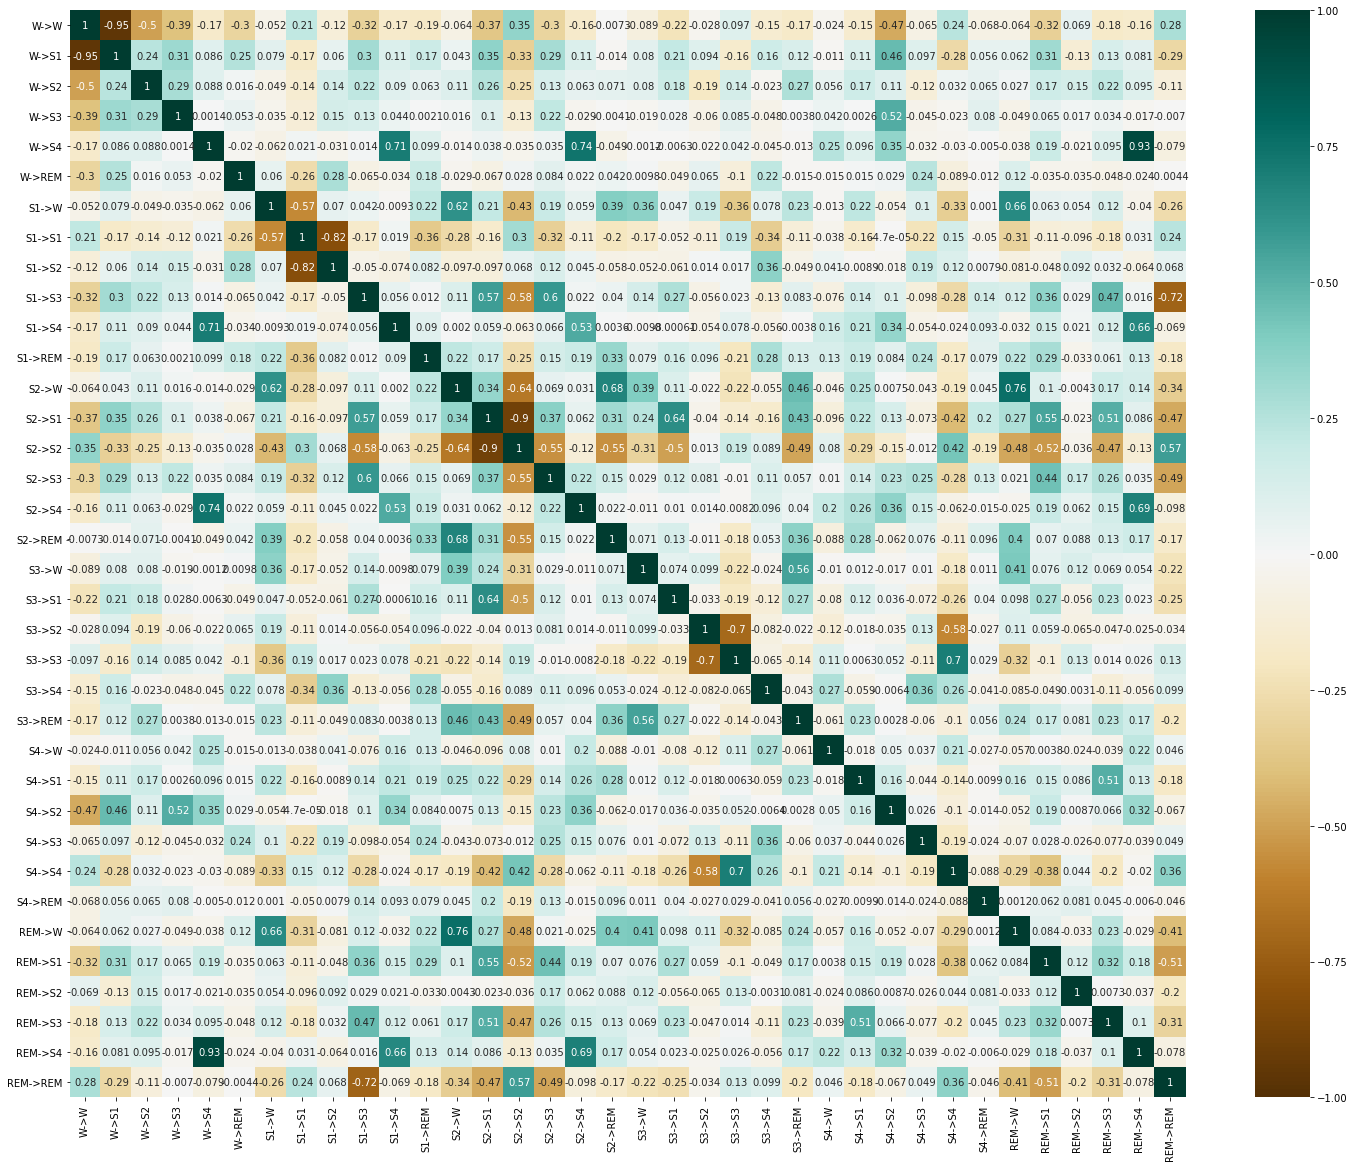

In [189]:
plt.figure(figsize=(25, 20))
heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG', fmt='.2g')

In [195]:
# dataset.corr()
corr_matrix = dataset.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.70)]
to_drop_corr
# # Drop features 
# df.drop(to_drop, axis=1, inplace=True)

['W->S1',
 'S1->S2',
 'S1->S4',
 'S2->S2',
 'S2->S4',
 'REM->W',
 'REM->S4',
 'REM->REM']

In [25]:
dataset.isna().sum().sum() 

0

In [26]:
dataset['Dataset'].unique() 

array(['CAP_Sleep', 'SDRC', 'Sleep_EDFX'], dtype=object)

In [27]:
dataset['Subject_Name'].unique().shape

(230,)

In [28]:
zero_feats = get_features_with_zero_values(dataset)
print(len(zero_feats), zero_feats) 

0 []


In [29]:
stat_dataset

,Features,Sum,Mean,STD,Healthy_Sum,Healthy_Mean,Healthy_STD,Disorder_Sum,Disorder_Mean,Disorder_STD,P_Value,AUC,Wilcoxon_zscore,Wilcoxon_pvalue,MannWhitney_statistic,MannWhitney_pvalue
0,W->W,200.023853,0.869669,0.111130,108.678140,0.855733,0.120193,91.345712,0.886852,0.096074,3.481301e-02,0.403218,-2.522887,1.163957e-02,5274.5,5.836077e-03
1,W->S1,24.969913,0.108565,0.094053,15.941897,0.125527,0.099497,9.028017,0.087651,0.082186,2.277298e-03,0.347374,3.978629,6.931372e-05,4544.0,3.479935e-05
2,W->S2,4.074743,0.017716,0.030857,1.629452,0.012830,0.027523,2.445291,0.023741,0.033563,7.522503e-03,0.653811,-4.009518,6.084289e-05,4528.5,1.431124e-05
3,W->S3,0.219641,0.000955,0.004911,0.108293,0.000853,0.004927,0.111348,0.001081,0.004890,7.272645e-01,0.511199,-0.291945,7.703283e-01,6394.0,2.483123e-01
4,W->S4,0.125777,0.000547,0.007757,0.117647,0.000926,0.010398,0.008130,0.000079,0.000797,4.121993e-01,0.500879,-0.022917,9.817163e-01,6529.0,4.457874e-01
5,W->REM,0.586073,0.002548,0.009081,0.524571,0.004130,0.011837,0.061502,0.000597,0.002123,3.217895e-03,0.422139,2.029669,4.239021e-02,5522.0,1.180169e-03
6,S1->W,15.246232,0.066288,0.067213,9.969784,0.078502,0.053088,5.276448,0.051228,0.078752,2.102759e-03,0.700673,5.231105,1.684994e-07,3915.5,8.178827e-08
7,S1->S1,164.464191,0.715062,0.143797,85.942910,0.676716,0.142570,78.521282,0.762343,0.130624,4.897664e-06,0.686301,-4.854466,1.207117e-06,4104.5,6.063551e-07
8,S1->S2,44.629370,0.194041,0.112006,27.225130,0.214371,0.116463,17.404240,0.168973,0.100755,2.128943e-03,0.381011,3.101796,1.923502e-03,4984.0,9.646592e-04
9,S1->S3,1.493990,0.006496,0.026515,0.857565,0.006752,0.024687,0.636425,0.006179,0.028607,8.711021e-01,0.505695,0.148464,8.819768e-01,6466.0,3.975669e-01


In [30]:
def get_top_features_baseOn_pValue(tstat_dataset, pval=0.05): 
    tsdf = tstat_dataset[(tstat_dataset['P_Value']<pval)] 
    return tsdf 

def get_top_features_baseOn_AUC(tstat_dataset, auc=0.5): 
    tsdf = tstat_dataset[(tstat_dataset['AUC']>auc)] 
    return tsdf 

In [31]:
def get_top_featute_names_baseOn_pValue(tstat_dataset, pval=0.05): 
    top_feat_df = get_top_features_baseOn_pValue(tstat_dataset, pval=pval)
    top_feat_df
    return top_feat_df['Features'].values.tolist() 

def get_top_featute_names_baseOn_AUC(tstat_dataset, auc=0.5): 
    top_feat_df = get_top_features_baseOn_AUC(tstat_dataset, auc=auc)
    top_feat_df
    return top_feat_df['Features'].values.tolist() 

In [32]:
top_feats_p = get_top_featute_names_baseOn_pValue(stat_dataset, pval=0.05)
len(top_feats_p), top_feats_p

(15,
 ['W->W',
  'W->S1',
  'W->S2',
  'W->REM',
  'S1->W',
  'S1->S1',
  'S1->S2',
  'S1->REM',
  'S2->S3',
  'S3->S2',
  'S3->S3',
  'S3->S4',
  'S4->S3',
  'S4->S4',
  'REM->S1'])

In [33]:
top_feats_a = get_top_featute_names_baseOn_AUC(stat_dataset, auc=0.5)
len(top_feats_a), top_feats_a

(20,
 ['W->S2',
  'W->S3',
  'W->S4',
  'S1->W',
  'S1->S1',
  'S1->S3',
  'S2->W',
  'S2->S1',
  'S2->S3',
  'S2->REM',
  'S3->S1',
  'S3->S2',
  'S3->S3',
  'S3->REM',
  'S4->S1',
  'S4->S2',
  'S4->S3',
  'S4->S4',
  'REM->W',
  'REM->S4'])

In [39]:
# dataset['Dataset'].unique()

In [40]:
# dataset[~(dataset['Subject_Name'].str.startswith('SC'))]
# dataset[~(dataset['Dataset']=='Sleep_EDFX')]
dataset

,Dataset,Category,Subject_Name,W->W->W,W->W->S1,W->W->S2,W->W->S3,W->W->S4,W->W->REM,W->S1->W,...,REM->S4->S2,REM->S4->S3,REM->S4->S4,REM->S4->REM,REM->REM->W,REM->REM->S1,REM->REM->S2,REM->REM->S3,REM->REM->S4,REM->REM->REM
0,CAP_Sleep,brux,brux1,0.795181,0.192771,0.012048,0.0,0.0,0.0,0.100000,...,0.0,0.0,0.0,0.0,0.034682,0.000000,0.000000,0.0,0.0,0.965318
1,CAP_Sleep,brux,brux2,0.873786,0.126214,0.000000,0.0,0.0,0.0,0.045455,...,0.0,0.0,0.0,0.0,0.019802,0.004950,0.000000,0.0,0.0,0.975248
2,CAP_Sleep,sdb,sdb1,0.879581,0.120419,0.000000,0.0,0.0,0.0,0.148148,...,0.0,0.0,0.0,0.0,0.009709,0.000000,0.029126,0.0,0.0,0.961165
3,CAP_Sleep,sdb,sdb2,0.959184,0.040816,0.000000,0.0,0.0,0.0,0.142857,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.026316,0.0,0.0,0.973684
4,CAP_Sleep,sdb,sdb3,0.934673,0.050251,0.015075,0.0,0.0,0.0,0.100000,...,0.0,0.0,0.0,0.0,0.066667,0.000000,0.000000,0.0,0.0,0.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Sleep_EDFX,n,ST7191,0.862745,0.137255,0.000000,0.0,0.0,0.0,0.058824,...,0.0,0.0,0.0,0.0,0.000000,0.020725,0.015544,0.0,0.0,0.963731
226,Sleep_EDFX,n,ST7201,0.400000,0.600000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.048000,0.008000,0.016000,0.0,0.0,0.928000
227,Sleep_EDFX,n,ST7211,0.940789,0.059211,0.000000,0.0,0.0,0.0,0.176471,...,0.0,0.0,0.0,0.0,0.026846,0.000000,0.020134,0.0,0.0,0.953020
228,Sleep_EDFX,n,ST7221,0.926230,0.073770,0.000000,0.0,0.0,0.0,0.037037,...,0.0,0.0,0.0,0.0,0.023148,0.041667,0.000000,0.0,0.0,0.935185


In [34]:
print( f"{data_directory}/{result_subdirectory}/{annot_type.capitalize()}_{tran_mat_type[mat_info_type]}_Transition{tran_step}.csv" ) 
print( f"{data_directory}/{result_subdirectory}/{annot_type.capitalize()}_{tran_mat_type[mat_info_type]}_Transition{tran_step}_STAT_bin.csv" ) 

./Results//_Combined/STP_From_Same_Stages/Subject_One_Night_TrimW/Annot_Proba_Transition3.csv
./Results//_Combined/STP_From_Same_Stages/Subject_One_Night_TrimW/Annot_Proba_Transition3_STAT_bin.csv


In [35]:
exp_sum_df = modify_experiment_information_summarry(result_directory) 
exp_sum_df 

# exp_sum_df = modify_experiment_information_summarry(result_directory, dict_dat=exp_detail) 
# exp_sum_df 

# exp_sum_df = modify_experiment_information_summarry(result_directory) 
# exp_sum_df 

,exp_name,stp_from,exp_description,datasets,feature_selection,special_consideration,classification_type
0,ML0011,Same,Data classification using sleep transition mat...,"2 datasets- CAP_Sleep, Sleep_EDFX",No feature selection,"Remove all zero, subject balanced over the fol...",Binary classification- Healthy vs disordered
1,ML0012,Same,Data classification using sleep transition mat...,"2 datasets- CAP_Sleep, Sleep_EDFX",No feature selection,"Remove all zero, subject balanced over the fol...",Binary classification- Healthy vs disordered
2,ML0013,Same,Data classification using sleep transition mat...,"2 datasets- CAP_Sleep, Sleep_EDFX",No feature selection,"Remove all zero, subject balanced over the fol...",Binary classification- Healthy vs disordered
3,ML10001,Same,Data classification using sleep transition mat...,2 datasets- All,AUC>0.5,"Remove all zero transition and W->W stage, sub...",Binary classification- Healthy vs disordered
4,ML10002,Same,Data classification using sleep transition mat...,2 datasets- All,AUC>0.5,"Remove all zero, subject balanced over the fol...",Binary classification- Healthy vs disordered
...,...,...,...,...,...,...,...
104,ML6005,Same,Data classification using sleep transition mat...,3 datasets- All,No feature selection,"Remove all zero, AUC>0.5, subject balanced ove...",Binary classification- Healthy vs disordered
105,ML6006,Same,Data classification using sleep transition mat...,3 datasets- All,No feature selection,"Remove all zero, AUC>0.6, subject balanced ove...",Binary classification- Healthy vs disordered
106,ML6007,Same,Data classification using sleep transition mat...,3 datasets- All,No feature selection,"Remove all zero, pval<=0.05, subject balanced ...",Binary classification- Healthy vs disordered
107,ML6008,Same,Data classification using sleep transition mat...,3 datasets- All,No feature selection,"Remove all zero, AUC>0.5, subject balanced ove...",Binary classification- Healthy vs disordered


In [36]:
# pd.read_csv?
# exp_detail
# exp_name
try:
    stop_logger(logger)
except Exception as e:
    print(e)
    logger = None
    
# logger = None

# del logger

name 'logger' is not defined


In [37]:
# tran_type
tran_step

3

In [213]:
exp_name = 'ML1301'
# exp_name = 'ML11002'
#>1000 & <1500-Annot,Same stage, no feat sels 
# >1500 & <2000-Annot,Same stage, feat sels 
# >2000 & <2500-Annot,All stage, no feat sels 
# >2500 & <3000-Annot,All stage, feat sels 
# >3000 & <3500-Annot,All stage, no feat sels, TrimW 
# >3500 & <4000-Annot,All stage, feat sels, TrimW 
tran_type = 'All' if prob_cal_from_all==1 else 'Same' #"combined" # 'All' if prob_cal_from_all==1 else 'Same'
exp_detail = {'exp_name':exp_name, 'stp_from':tran_type.capitalize(), 
              'exp_description':f"Data classification using sleep transition matrix for {tran_type} sleep stages for {tran_step} stage trans, with TrimW and transition same transition", 
              'datasets':'3 datasets- CAP, EDFX, SDRC', 'feature_selection':'pre selection P-value<0.05', 
              'special_consideration':'Remove all zero transition and W->W stage, subject balanced over the folds, validated with training data, All data n vs dis', 
              'classification_type':'Binary classification- Healthy vs disordered'}
#               'exp_description':f"Data classification using sleep transition matrix for {tran_type} sleep stages, with TrimW and transition same transition", 
#               'datasets':'2 datasets- CAP_Sleep, Sleep_EDFX', 'feature_selection':'No feature selection', 
#               'special_consideration':'Remove all zero, feature values with <5% transition, healthy-healthy correlated features and W->W, subject balanced over the folds, validated with training data, TESING', 
#               'classification_type':'Binary classification- Healthy vs disordered'}
# exp_detail = {'exp_name':exp_name, 'stp_from':'All' if prob_cal_from_all==1 else 'Same', 
#               'exp_description':f"Data classification using sleep transition matrix for {'all' if prob_cal_from_all==1 else 'same'} sleep stages, with TrimW", 
#               'datasets':'2 datasets- CAP_Sleep, Sleep_EDFX, Only healthy subjects', 'feature_selection':'No feature selection', 
#               'special_consideration':'W->W and theoritically infeasible transitions, Remove all zero, subject balanced over the folds, validated with training data', 
#               'classification_type':'Binary classification- Age group <=35 and >=55'}
# exp_detail = {'exp_name':exp_name, 'stp_from':'All' if prob_cal_from_all==1 else 'Same', 
#               'exp_description':f"Data classification using sleep transition matrix for {'all' if prob_cal_from_all==1 else 'same'} sleep stages, with TrimW", 
#               'datasets':'2 datasets- CAP_Sleep, Sleep_EDFX', 'feature_selection':'No feature selection', 
#               'special_consideration':'Remove all zero, subject balanced over the folds, validated with training data, TESING', 
#               'classification_type':'Binary classification- Healthy vs disordered'}

# exp_detail = {'exp_name':exp_name, 'stp_from':'All' if prob_cal_from_all==1 else 'Same', 
#               'exp_description':f"Data classification using sleep transition matrix for {'all' if prob_cal_from_all==1 else 'same'} sleep stages, with TrimW", 
#               'datasets':'2 datasets- CAP_Sleep, Sleep_EDFX', 'feature_selection':'No feature selection', 
#               'special_consideration':'Remove all zero, W->W and theoritically infeasible transitions, subject balanced over the folds, validated with training data', 
#               'classification_type':'Binary classification- Healthy vs disordered'}
# exp_detail = {'exp_name':exp_name, 'exp_description':'Data classification using sleep transition matrix for all sleep stages', 'datasets':'2 datasets- CAP_Sleep, Sleep_EDFX', 
#               'feature_selection':'No feature selection', 'special_consideration':'No special consideration', 
#               'classification_type':"Multi-class classification: Healthy and 7 different disordered in one vs all fashion | removed: 'brux', 'sdb', 'narco', 'ins', 'plm'"}
# exp_detail = {'exp_name':exp_name, 'exp_description':'Wake vs sleep binary classification using sleep transition matrix', 'datasets':'2 datasets- CAP_Sleep, Sleep_EDFX', 
#               'feature_selection':'AUC based training set only feature selection with AUC>=0.7', 'special_consideration':'W->W stage transition removed, subject balanced over the folds', 
#               'classification_type':'Binary classification: Healthy vs disordered'} 
# exp_detail = {'exp_name':exp_name, 'exp_description':'Wake vs sleep binary classification using sleep transition matrix, with TrimW', 'datasets':'1 datasets- CAP_Sleep', 
#               'feature_selection':'No feature selection | RF based predetermined features after experiment with RF importence>0.02 | AUC based predetermined features after experiment with AUC>0.7', 'special_consideration':'No special consideration, nxx balanced over the folds', 'classification_type':'Binary classification: Healthy vs disordered'} 
# exp_detail = {'exp_name':exp_name, 'exp_description':'Data classification using sleep transition matrix for all sleep stages', 'datasets':'2 datasets- CAP_Sleep, Sleep_EDFX (Excluding SC records)', 
#               'feature_selection':'AUC based >0.7', 'special_consideration':'Remove W->W and all zero transitions, nxx balanced over the folds', 'classification_type':'Binary classification: Healthy vs disordered'} 
result_save_path = create_experiment_directory(result_directory, exp_name) 
result_save_path 

Directory already exists at path: ./Results//_Classification/ML11002/


'./Results//_Classification/ML11002/'

In [214]:
# logger.info("Hello")
ML_Classifiers.SVC, ML_Classifiers.RF, ML_Classifiers.XGBoost

(<ML_Classifiers.SVC: 'support_vector_classifier'>,
 <ML_Classifiers.RF: 'random_forest'>,
 <ML_Classifiers.XGBoost: 'xtreme_gradient_boosting'>)

In [215]:
random_state_value = 312
class_name = "Class" 
metadata_column = ["Dataset", "Category", "Subject_Name"] 
all_metadata_columns = metadata_column+[class_name]
# ### #Binary/Multi-class healthy vs disorders 
split_column = "Subject_Name"  #"Subject_Name" for binary or multi-class 
split_balance_pattern = [['n'], ['SC', 'ST'], ['brux'], ['sdb'], ['ins'], ['narco'], ['nfle'], ['plm'], ['rbd']] #[['n'], ['SC', 'ST']]  for binary || [['n'], ['SC', 'ST'], ['brux'], ['sdb'], ['ins'], ['narco'], ['nfle'], ['plm'], ['rbd']] for multi-class 
# split_balance_pattern = [['n'], ['ST'], ['brux'], ['sdb'], ['ins'], ['narco'], ['nfle'], ['plm'], ['rbd']] #[['n'], ['SC', 'ST']]  for binary || [['n'], ['SC', 'ST'], ['brux'], ['sdb'], ['ins'], ['narco'], ['nfle'], ['plm'], ['rbd']] for multi-class 
# split_balance_pattern = [['n'], ['brux'], ['sdb'], ['ins'], ['narco'], ['nfle'], ['plm'], ['rbd']] #[['n'], ['SC', 'ST']]  for binary || [['n'], ['SC', 'ST'], ['brux'], ['sdb'], ['ins'], ['narco'], ['nfle'], ['plm'], ['rbd']] for multi-class 
### #Binary/Multi-class age-group detection  
# split_column = class_name
# split_balance_pattern = [[1]]
class_name, metadata_column, split_column, all_metadata_columns, result_save_path


('Class',
 ['Dataset', 'Category', 'Subject_Name'],
 'Subject_Name',
 ['Dataset', 'Category', 'Subject_Name', 'Class'],
 './Results//_Classification/ML11002/')

In [216]:
#### 2 step transition feature selection 
# dataset
# OLD ['S3->S3','S4->S4','S3->S2','W->S1','W->S2','S2->S2','REM->REM','S4->S3','S3->S4','S2->S1','S2->S3','S2->W']

### From 1031 
# AUC_0_7 = ['S3->S3','W->S1','S3->S4','S3->S2','S4->S4','S2->S2','S4->S3','W->S2','S2->S3','S1->W','S2->S1'] 
# AUC_0_5 = ['S3->S3','W->S1','S3->S4','S3->S2','S4->S4','S2->S2','S4->S3','W->S2','S2->S3','S1->W','S2->S1','S3->W','S1->REM','S1->S1','REM->REM','S2->REM','S4->S2','REM->W',
#            'REM->S1','S2->W','S1->S2','S4->W','S3->S1','W->S3','W->REM','S2->S4','S3->REM']
# RF_FI_0_2 = ['S3->S3','S4->S4','S3->S2','W->S1','S2->S2','W->S2','S4->S3','S2->S1','S3->S4','S1->S1','S2->S3','REM->REM','S2->W','S2->REM','REM->W'] 

# ### Overall AUC
# AUC_0_7 = ['W->W', 'S1->W', 'S1->REM', 'S2->S1', 'S2->S2', 'S3->S3', 'S4->S4']
# AUC_0_5 = ['W->W', 'W->S2', 'S1->W', 'S1->REM', 'S2->S1', 'S2->S2', 'S2->S4', 'S2->REM', 'S3->S2', 'S3->S3', 'S4->W', 'S4->S2', 'S4->S3', 'S4->S4', 'REM->S2']

### From 1135  
AUC_0_7 = ['S3->S3', 'S4->S4', 'S2->S2', 'S4->S3', 'REM->REM', 'S3->S4', 'S2->REM', 'S3->S2', 'S2->S1', 'W->S2', 'S1->REM'] 
AUC_0_5 = ['S3->S3', 'S4->S4', 'S2->S2', 'S4->S3', 'REM->REM', 'S3->S4', 'S2->REM', 'S3->S2', 'S2->S1', 'W->S2', 'S1->REM', 'S4->S2', 'S1->W', 'S4->W', 'REM->S2', 
           'S2->W', 'S2->S3', 'REM->S1', 'S3->W', 'S2->S4', 'S1->S1', 'W->S3'] 
RF_FI_0_2 = ['S3->S3','S4->S4','S2->S2','REM->REM','S3->S2','S3->S4','S2->S1','S1->REM','S4->S3','S1->S2','S2->S3','W->S2','W->S1','S4->S2','S2->REM','REM->S2','S1->W','S1->S1','S4->W'] 

theoritically_feasible_transitions = ['W->S1', 'W->S2', 'S1->W', 'S1->S1', 'S1->S2', 'S2->W', 'S2->S1', 'S2->S2', 'S2->S3', 'S2->S4', 'S2->REM', 'S3->W', 'S3->S2', 'S3->S3', 'S3->S4',
                                     'S4->W', 'S4->S2', 'S4->S3', 'S4->S4', 'REM->W', 'REM->S2', 'REM->REM'] 
feats_cant_seperate_both_healthy = ['W->W', 'W->S1', 'W->REM', 'S1->W', 'S1->S1', 'S1->REM', 'S2->W', 'S2->S1', 'S2->S2', 'S2->S3', 'S2->REM', 'S3->S2', 'S3->S3', 'S4->S2', 'S4->S4', 
                                    'REM->W', 'REM->S1', 'REM->S2', 'REM->REM']
# feats_cant_seperate_both_healthy2 = ['W->REM', 'S1->W', 'S1->S2', 'S2->S1', 'S2->REM', 'S3->S2', 'S3->S4', 'S4->S1', 'S4->S2', 'REM->W', 'REM->S1', 'REM->S2']

theoritically_infeasible_transitions = ['W->S3', 'W->S4', 'W->REM', 'S1->S3', 'S1->S4', 'S1->REM', 'S3->S1', 'S3->REM', 'S4->S1', 'S4->REM', 'REM->S1', 'REM->S3', 'REM->S4'] 

len(AUC_0_7),len(AUC_0_5),len(RF_FI_0_2) 


## For PhS Study01: P-value<0.05 based feature #15 ['W->W', 'W->S1', 'W->S2', 'W->REM', 'S1->W', 'S1->S1', 'S1->S2', 'S1->REM', 'S2->S3', 'S3->S2', 'S3->S3', 'S3->S4', 'S4->S3', 'S4->S4', 'REM->S1']
## For PhS Study01: AUC>0.5 based feature #20 ['W->S2', 'W->S3', 'W->S4', 'S1->W', 'S1->S1', 'S1->S3', 'S2->W', 'S2->S1', 'S2->S3', 'S2->REM', 'S3->S1', 'S3->S2', 'S3->S3', 'S3->REM', 'S4->S1', 'S4->S2', 'S4->S3', 'S4->S4', 'REM->W', 'REM->S4']
## For PhS Study01: AUC>0.6 based feature #11 ['W->S2', 'S1->W', 'S1->S1', 'S2->W', 'S2->S1', 'S2->S3', 'S2->REM', 'S3->S2', 'S3->S3', 'S4->S2', 'S4->S4']
## Features showing common characteristics among the healthy subjects from CAP and EDFX 

top_feats = get_top_featute_names_baseOn_pValue(stat_dataset, pval=0.05)
# top_feats = get_top_featute_names_baseOn_AUC(stat_dataset, auc=0.6)
print(len(top_feats), top_feats) 

15 ['W->W', 'W->S1', 'W->S2', 'W->REM', 'S1->W', 'S1->S1', 'S1->S2', 'S1->REM', 'S2->S3', 'S3->S2', 'S3->S3', 'S3->S4', 'S4->S3', 'S4->S4', 'REM->S1']


In [217]:
# Feature values greater than or equal to 1% of the transitions
processed_dataset = dataset.copy()
dd = ((processed_dataset.mean()/processed_dataset.mean().sum())>=0.01) 
dd = dd[dd==True]
type(dd), dd.index.tolist(), dd
take_feats = dd.index.tolist() 
take_feats

['W->W',
 'W->S1',
 'S1->W',
 'S1->S1',
 'S1->S2',
 'S2->S2',
 'S3->S2',
 'S3->S3',
 'S4->S3',
 'S4->S4',
 'REM->REM']

In [218]:
# processed_dataset = dataset.copy() if not random_state_value else dataset.copy().sample(frac=1, random_state=random_state_value).reset_index(drop=True) 
processed_dataset = dataset.copy()
all_cols = processed_dataset.columns.values.tolist() 
last_metadata_col_indx = all_cols.index('Subject_Name')+1 

# ### Select some features based on dataset 
# processed_dataset = processed_dataset[~(processed_dataset['Subject_Name'].str.startswith('SC'))] #dataset[~(dataset['Subject_Name'].str.startswith('SC'))]
# processed_dataset = processed_dataset[~(processed_dataset['Dataset']=='Sleep_EDFX')] #dataset[~(dataset['Subject_Name'].str.startswith('SC'))]

### Select specific group of features from % of transitions
# selected_feats = all_cols[:last_metadata_col_indx]+take_feats
selected_feats = all_cols[:last_metadata_col_indx]+top_feats
selected_feats 
processed_dataset = processed_dataset.loc[:, selected_feats]

### Remove zero and wake-to-wake and specific group 
removable_feats = []
zero_feats = get_features_with_zero_values(processed_dataset)
zero_feats
removable_feats.extend(zero_feats)
removable_feats.extend(['W->W'])
# removable_feats.extend(to_drop_corr)
# removable_feats.extend(feats_cant_seperate_both_healthy) 
# removable_feats.extend(theoritically_infeasible_transitions) 
print(f'Removed: {removable_feats}')
removable_feats 
processed_dataset = processed_dataset.drop(removable_feats, axis=1, errors='ignore')

### Remove features with <5% transitions


### Select specific group of features 
# # # processed_dataset = processed_dataset[all_metadata_columns+sorted_PAUC_df]
# # processed_dataset = processed_dataset.drop(removable_feats, axis=1)
# # # select features from manual feature selection list: from previous AUC or RF 
# selected_feats = all_cols[:last_metadata_col_indx]+theoritically_feasible_transitions
# selected_feats = all_cols[:last_metadata_col_indx]+feats_cant_seperate_both_healthy
# selected_feats 
# processed_dataset = processed_dataset.loc[:, selected_feats]

### #Binary/Multi-class healthy vs disorders 
# processed_dataset = processed_dataset[~processed_dataset['Category'].isin(['brux', 'sdb'])]### Brux and sdb is cancelled coz of low number to fit in 5 fold
label_map, processed_dataset = map_category_to_class(processed_dataset.copy(), source_col='Category', class_name='Class', removable_cats=None, multi_class=False)
# label_map, processed_dataset = map_category_to_class(processed_dataset.copy(), source_col='Category', class_name='Class', removable_cats=None, multi_class=True)
# label_map, processed_dataset = map_category_to_class(processed_dataset.copy(), source_col='Category', class_name='Class', removable_cats=['brux', 'sdb', 'narco', 'ins', 'plm'], multi_class=True) 
# label_map, processed_dataset = map_category_to_class(processed_dataset.copy(), source_col='Category', class_name='Class', removable_cats=['brux', 'sdb', 'narco', 'ins', 'plm'], multi_class=True) 
# label_map, processed_dataset = map_category_to_class(processed_dataset.copy(), source_col='Category', class_name='Class', removable_cats=['brux', 'sdb', 'narco', 'ins', 'plm'], multi_class=True) 

# label_map, processed_dataset = map_category_to_class(processed_dataset.copy(), source_col='Category', class_name='Class', removable_cats=None, multi_class=False, age_data=all_demography_detail_df.copy(), age_col = 'Age', source_cols=['Subject_Name', 'File_Name'])
# label_map, processed_dataset = map_category_to_class(processed_dataset.copy(), source_col='Category', class_name='Class', removable_cats=None, multi_class=False, age_data=None, age_col = 'Age', source_cols=['Subject_Name', 'File_Name'])
# label_map, processed_dataset = map_category_to_class(processed_dataset.copy(), source_col='Category', class_name='Class', removable_cats=['brux', 'sdb', 'narco', 'ins', 'plm', 'nfle'], multi_class=False, age_data=None, age_col = 'Age', source_cols=['Subject_Name', 'File_Name'])
# label_map, processed_dataset = map_category_to_class(processed_dataset.copy(), source_col='Category', class_name='Class', removable_cats=['brux', 'sdb', 'narco', 'ins', 'rbd', 'nfle'], multi_class=False, age_data=None, age_col = 'Age', source_cols=['Subject_Name', 'File_Name'])
# label_map, processed_dataset = map_category_to_class(processed_dataset.copy(), source_col='Category', class_name='Class', removable_cats=['brux', 'sdb', 'narco', 'ins', 'plm', 'rbd'], multi_class=False, age_data=None, age_col = 'Age', source_cols=['Subject_Name', 'File_Name'])
# label_map, processed_dataset = map_category_to_class(processed_dataset.copy(), source_col='Category', class_name='Class', removable_cats=['brux', 'sdb', 'narco', 'plm', 'rbd', 'nfle'], multi_class=False, age_data=None, age_col = 'Age', source_cols=['Subject_Name', 'File_Name'])


print(label_map)
# processed_dataset = processed_dataset[~processed_dataset['Subject_Name'].str.startswith('SC')] 
# processed_dataset = processed_dataset[~processed_dataset['Subject_Name'].str.startswith('ST')] 
# processed_dataset = processed_dataset[~(processed_dataset['Dataset']=='Sleep_EDFX')]
# processed_dataset = processed_dataset[(processed_dataset['Dataset']=='SDRC')]
# processed_dataset = processed_dataset[(processed_dataset['Dataset']=='CAP_Sleep')]

# ### #Binary/Multi-class age-group detection  
# label_map, processed_dataset = map_age_category_to_class(processed_dataset.copy(), all_demography_detail_df.copy(), source_cols=['Subject_Name', 'File_Name'], age_col ='Age', age_ranges = [[0, 30], [40, 200]], class_name='Class', multi_class=True, healthy_only=True) ##19-101 
# label_map, processed_dataset = map_age_category_to_class(processed_dataset.copy(), all_demography_detail_df.copy(), source_cols=['Subject_Name', 'File_Name'], age_col ='Age', age_ranges = [[0, 30], [40, 60], [70, 200]], class_name='Class', multi_class=True, healthy_only=True) ##19-101 
# label_map, processed_dataset = map_age_category_to_class(processed_dataset.copy(), all_demography_detail_df.copy(), source_cols=['Subject_Name', 'File_Name'], age_col ='Age', age_ranges = [[0, 35], [35, 55], [55, 200]], class_name='Class', multi_class=True, healthy_only=True) ##19-101  
# label_map, processed_dataset = map_age_category_to_class(processed_dataset.copy(), all_demography_detail_df.copy(), source_cols=['Subject_Name', 'File_Name'], age_col ='Age', age_ranges = [[0, 35], [55, 200]], class_name='Class', multi_class=True, healthy_only=True) ##19-101 
# print(label_map)
# processed_dataset

processed_dataset = processed_dataset.reset_index(drop=True) 
# processed_dataset = processed_dataset.reset_index() 
processed_dataset 

Removed: ['W->W']
['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
['n', 'brux', 'sdb', 'ins', 'narco', 'nfle', 'plm', 'rbd']
{'n': 0, 'brux': 1, 'sdb': 1, 'ins': 1, 'narco': 1, 'nfle': 1, 'plm': 1, 'rbd': 1}


,Dataset,Category,Subject_Name,Class,W->S1,W->S2,W->REM,S1->W,S1->S1,S1->S2,S1->REM,S2->S3,S3->S2,S3->S3,S3->S4,S4->S3,S4->S4,REM->S1
0,CAP_Sleep,brux,brux1,1,0.192308,0.009615,0.000000,0.030769,0.807692,0.161538,0.000000,0.014472,0.079208,0.851485,0.059406,0.024631,0.970443,0.000000
1,CAP_Sleep,brux,brux2,1,0.176000,0.000000,0.000000,0.061728,0.851852,0.086420,0.000000,0.022822,0.045455,0.924242,0.025253,0.012048,0.984940,0.004831
2,CAP_Sleep,sdb,sdb1,1,0.123853,0.000000,0.000000,0.099237,0.763359,0.137405,0.000000,0.050000,0.055944,0.874126,0.069930,0.030457,0.949239,0.000000
3,CAP_Sleep,sdb,sdb2,1,0.045161,0.006452,0.000000,0.011364,0.926136,0.062500,0.000000,0.004128,0.026316,0.921053,0.052632,0.016949,0.966102,0.000000
4,CAP_Sleep,sdb,sdb3,1,0.046948,0.018779,0.000000,0.108696,0.782609,0.108696,0.000000,0.023656,0.024590,0.961749,0.013661,0.038961,0.935065,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Sleep_EDFX,n,ST7191,0,0.246377,0.014493,0.000000,0.044118,0.558824,0.382353,0.014706,0.014184,0.040816,0.387755,0.571429,0.166667,0.805556,0.020000
226,Sleep_EDFX,n,ST7201,0,0.588235,0.058824,0.058824,0.014493,0.623188,0.333333,0.028986,0.024590,0.212121,0.530303,0.227273,0.615385,0.346154,0.007463
227,Sleep_EDFX,n,ST7211,0,0.100000,0.000000,0.005882,0.116667,0.483333,0.383333,0.016667,0.053903,0.239130,0.521739,0.173913,0.254237,0.728814,0.000000
228,Sleep_EDFX,n,ST7221,0,0.181208,0.000000,0.000000,0.052133,0.734597,0.161137,0.052133,0.004566,1.000000,0.000000,0.000000,0.000000,0.000000,0.043290


In [219]:
# processed_dataset[~processed_dataset['Subject_Name'].str.startswith('SC')].groupby('Category')['Class'].value_counts() 
processed_dataset.mean()
# processed_dataset.isna().sum()
# label_map

Class      0.447826
W->S1      0.108565
W->S2      0.017716
W->REM     0.002548
S1->W      0.066288
S1->S1     0.715062
S1->S2     0.194041
S1->REM    0.017830
S2->S3     0.036480
S3->S2     0.186136
S3->S3     0.685885
S3->S4     0.052712
S4->S3     0.098201
S4->S4     0.584832
REM->S1    0.022889
dtype: float64

In [220]:
print(processed_dataset['Dataset'].unique(), processed_dataset['Class'].unique())
processed_dataset.groupby('Category')['Class'].value_counts()
# processed_dataset['Category'].unique().tolist()

['CAP_Sleep' 'SDRC' 'Sleep_EDFX'] [1 0]


Category  Class
brux      1          2
ins       1         20
n         0        127
narco     1          5
nfle      1         40
plm       1         10
rbd       1         22
sdb       1          4
Name: Class, dtype: int64

In [221]:
if logger:
    stop_logger(logger) 
util, logger = start_logger(result_save_path, exp_name)

# classifier_obj = HumachLab_ML_CLassifiers(logger=logger, directory=result_save_path, dataset=dataset.copy(), class_name=class_name, metadata_column=metadata_column, split_column=split_column) 
classifier_obj = HumachLab_ML_CLassifiers(logger=logger, directory=result_save_path, dataset=processed_dataset.copy(), class_name=class_name, label_map=label_map, metadata_column=metadata_column, split_column=split_column, random_state_value=random_state_value, split_balance_pattern=split_balance_pattern) 

classifier_obj 



        Object is initialised with the following properties: 
        ###################################################################################################
        Dataset size: (230, 18), Columns: ['Dataset', 'Category', 'Subject_Name', 'Class', 'W->S1', 'W->S2', 'W->REM', 'S1->W', 'S1->S1', 'S1->S2', 'S1->REM', 'S2->S3', 'S3->S2', 'S3->S3', 'S3->S4', 'S4->S3', 'S4->S4', 'REM->S1']
        Target class column name: Class
        Metadata column names: ['Dataset', 'Category', 'Subject_Name']
        Dataset split column on which the training and test sets will be devided: Subject_Name
        Is multi-class classification: False
        


In [222]:
classifier_obj.print_message()

Hello from HumachLab_ML_CLassifiers class


In [223]:
# splitting_crieteria = [(10, 0), (5, 20)]     ### for test & training (validation) splitting_crieteria (m, n)-m folds, n%:  m=0: loso, m>0: m-fold, (n>0 given m>0) -shuffled random splitting with m-fold, n% testing 
# splitting_crieteria = [(5, 0), (5, 20)]     ### for test & training (validation) splitting_crieteria (m, n)-m folds, n%:  m=0: loso, m>0: m-fold, (n>0 given m>0) -shuffled random splitting with m-fold, n% testing 
# splitting_crieteria = [(1, 0), (1, 20)]   ## for small data  ### for test & training (validation) splitting_crieteria (m, n)-m folds, n%:  m=0: loso, m>0: m-fold, (n>0 given m>0) -shuffled random splitting with m-fold, n% testing 
# splitting_crieteria = [(5, 0), (2, 10)]   ## for small data  ### for test & training (validation) splitting_crieteria (m, n)-m folds, n%:  m=0: loso, m>0: m-fold, (n>0 given m>0) -shuffled random splitting with m-fold, n% testing 
splitting_crieteria = [(5, 0), (2, 5)]   ## for small data  ### for test & training (validation) splitting_crieteria (m, n)-m folds, n%:  m=0: loso, m>0: m-fold, (n>0 given m>0) -shuffled random splitting with m-fold, n% testing 
model_list = [ML_Classifiers.LogReg, ML_Classifiers.SVC, ML_Classifiers.NB, ML_Classifiers.kNN, ML_Classifiers.DT, ML_Classifiers.RF, ML_Classifiers.GBoost, ML_Classifiers.XGBoost] # [ML_Classifiers.LogReg, ML_Classifiers.SVC, ML_Classifiers.NB, ML_Classifiers.kNN, ML_Classifiers.DT, ML_Classifiers.RF, ML_Classifiers.GBoost] 
should_use_params = True 
is_validate_models = True
# is_binary_classification = False 
apply_feature_selection = False
custom_splitter = True
exp_name = exp_name

splitting_crieteria, model_list, result_save_path, should_use_params 

([(5, 0), (2, 5)],
 [<ML_Classifiers.LogReg: 'logistic_regression'>,
  <ML_Classifiers.SVC: 'support_vector_classifier'>,
  <ML_Classifiers.NB: 'naive_bayes'>,
  <ML_Classifiers.kNN: 'k_nearest_neighbors'>,
  <ML_Classifiers.DT: 'decision_tree'>,
  <ML_Classifiers.RF: 'random_forest'>,
  <ML_Classifiers.GBoost: 'gradient_boosting'>,
  <ML_Classifiers.XGBoost: 'xtreme_gradient_boosting'>],
 './Results//_Classification/ML11002/',
 True)

In [224]:
classifier_obj.class_name, classifier_obj.split_column, result_directory

('Class', 'Subject_Name', './Results//_Classification')

In [225]:
### Set the classifier parameters in the "HumachLab_ML_CLassifiers" class file to run with the parameter 
# best_tr_model, tr_model, tr_model_scores_df, tr_target_and_prediction_df, ts_model, ts_model_scores_df, ts_target_and_prediction_df, ts_fold_info_df, exp_info_df
best_tr_model, tr_model, tr_model_scores_df, tr_target_and_prediction_df, ts_model, ts_model_scores_df, ts_target_and_prediction_df, ts_fold_info_df, exp_info_df = classifier_obj.classify(
    should_use_params=should_use_params, splitting_crieteria=splitting_crieteria, model_list=model_list, is_validate_models=is_validate_models, 
    result_save_path=result_save_path, exp_name=exp_name, exp_detail=exp_detail, apply_feature_selection=apply_feature_selection, custom_splitter=custom_splitter) 

stop_logger(logger) 

exp_sum_df = modify_experiment_information_summarry(result_directory, dict_dat=exp_detail) 
exp_sum_df 


        Classification is set with the following parameters: 
        ###################################################################################################
        Splitting crieteria: [(5, 0), (2, 5)]
        Test split: 5-fold cross validation
        Training split: 2-fold 5% random test splitting
        List of ML models that will be applied: ['logistic_regression', 'support_vector_classifier', 'naive_bayes', 'k_nearest_neighbors', 'decision_tree', 'random_forest', 'gradient_boosting', 'xtreme_gradient_boosting']
        Use parameters for model: True
        Is validate the model (or only train): True 
        Classification results will be saved in the directory: ./Results//_Classification/ML11002/
        
Custom splitter testing...
test- tsi, train_all_ids, test_ids, tr_all_dat, ts_dat 0 [1, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\linear_model\_logi




        GridSearch: SVC - {'probability': [True], 'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0], 'kernel': ['linear', 'rbf', 'poly']} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 21 candidates, totalling 105 fits

        From training? False, Data shape: (182, 18), Indices: [1, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 73, 74, 75, 76, 77, 78, 79, 80, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\tree\_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF




        GridSearch: RF - {'n_estimators': [3, 5, 10, 15, 21, 30, 50, 75, 100], 'max_depth': [2, 3, 5, 7, 10, 15, 20, 25, 30], 'criterion': ['gini', 'entropy', 'log_loss']} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

        From training? False, Data shape: (182, 18), Indices: [1, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 73, 74, 75, 76, 77, 78, 79, 80, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\ensemble\_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch




        GridSearch: GB - {'n_estimators': [3, 5, 10, 15, 21, 30, 50, 75, 100], 'max_depth': [2, 3, 5, 7, 10, 15, 20, 25, 30], 'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 405 candidates, totalling 2025 fits

        From training? False, Data shape: (182, 18), Indices: [1, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 73, 74, 75, 76, 77, 78, 79, 80, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\linear_model\_logi




        GridSearch: SVC - {'probability': [True], 'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0], 'kernel': ['linear', 'rbf', 'poly']} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 21 candidates, totalling 105 fits

        From training? False, Data shape: (182, 18), Indices: [1, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 73, 74, 75, 76, 77, 78, 79, 80, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\tree\_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF




        GridSearch: RF - {'n_estimators': [3, 5, 10, 15, 21, 30, 50, 75, 100], 'max_depth': [2, 3, 5, 7, 10, 15, 20, 25, 30], 'criterion': ['gini', 'entropy', 'log_loss']} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

        From training? False, Data shape: (182, 18), Indices: [1, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 73, 74, 75, 76, 77, 78, 79, 80, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\ensemble\_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch




        GridSearch: GB - {'n_estimators': [3, 5, 10, 15, 21, 30, 50, 75, 100], 'max_depth': [2, 3, 5, 7, 10, 15, 20, 25, 30], 'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 405 candidates, totalling 2025 fits

        From training? False, Data shape: (182, 18), Indices: [1, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 73, 74, 75, 76, 77, 78, 79, 80, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\linear_model\_logi




        GridSearch: SVC - {'probability': [True], 'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0], 'kernel': ['linear', 'rbf', 'poly']} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 21 candidates, totalling 105 fits

        From training? False, Data shape: (182, 18), Indices: [0, 2, 4, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 170, 171, 172, 173, 174, 175

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\tree\_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF




        GridSearch: RF - {'n_estimators': [3, 5, 10, 15, 21, 30, 50, 75, 100], 'max_depth': [2, 3, 5, 7, 10, 15, 20, 25, 30], 'criterion': ['gini', 'entropy', 'log_loss']} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

        From training? False, Data shape: (182, 18), Indices: [0, 2, 4, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\ensemble\_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch


        Best model (GriveSearchCV): GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=50,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5, 7, 10, 15, 20, 25, 30],
                         'n_estimators': [3, 5, 10, 15, 21, 30, 50, 75, 100]},
             refit='recall', return_train_score=True, scoring=['recall', 'f1'],
             verbose=2) 
        Best model: GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=50,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5, 7, 10, 15, 20, 25, 30],
                         'n_estimators': [3, 5, 10, 15, 21, 30, 50, 75, 100]},
             refit='recall', return_train_score=True, scoring=['recall', 'f1'],
             verbose=2) 
        Best estimator of the model: RandomForestClassifier(max_depth=25, n_estimators=50) 
        Best parameters of the model: {'criterion': 'gini', 'max_

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\linear_model\_logi




        GridSearch: SVC - {'probability': [True], 'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0], 'kernel': ['linear', 'rbf', 'poly']} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 21 candidates, totalling 105 fits

        From training? False, Data shape: (182, 18), Indices: [0, 2, 4, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 170, 171, 172, 173, 174, 175

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\tree\_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF




        GridSearch: RF - {'n_estimators': [3, 5, 10, 15, 21, 30, 50, 75, 100], 'max_depth': [2, 3, 5, 7, 10, 15, 20, 25, 30], 'criterion': ['gini', 'entropy', 'log_loss']} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\ensemble\_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch


        From training? False, Data shape: (182, 18), Indices: [0, 2, 4, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229]
        All Columns: ['Dataset', 'Category', 'Subject_Name', 'Class', 'W->S1', 'W->S2', 'W->REM', 'S1->W', 'S1->S

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\linear_model\_logi




        GridSearch: SVC - {'probability': [True], 'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0], 'kernel': ['linear', 'rbf', 'poly']} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 21 candidates, totalling 105 fits

        From training? False, Data shape: (185, 18), Indices: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\tree\_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF




        GridSearch: RF - {'n_estimators': [3, 5, 10, 15, 21, 30, 50, 75, 100], 'max_depth': [2, 3, 5, 7, 10, 15, 20, 25, 30], 'criterion': ['gini', 'entropy', 'log_loss']} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

        From training? False, Data shape: (185, 18), Indices: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 1

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\ensemble\_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch




        GridSearch: GB - {'n_estimators': [3, 5, 10, 15, 21, 30, 50, 75, 100], 'max_depth': [2, 3, 5, 7, 10, 15, 20, 25, 30], 'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 405 candidates, totalling 2025 fits

        From training? False, Data shape: (185, 18), Indices: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 1

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\linear_model\_logi




        GridSearch: SVC - {'probability': [True], 'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0], 'kernel': ['linear', 'rbf', 'poly']} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 21 candidates, totalling 105 fits

        From training? False, Data shape: (185, 18), Indices: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\tree\_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF




        GridSearch: RF - {'n_estimators': [3, 5, 10, 15, 21, 30, 50, 75, 100], 'max_depth': [2, 3, 5, 7, 10, 15, 20, 25, 30], 'criterion': ['gini', 'entropy', 'log_loss']} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

        From training? False, Data shape: (185, 18), Indices: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 1

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\ensemble\_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch




        GridSearch: GB - {'n_estimators': [3, 5, 10, 15, 21, 30, 50, 75, 100], 'max_depth': [2, 3, 5, 7, 10, 15, 20, 25, 30], 'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 405 candidates, totalling 2025 fits

        From training? False, Data shape: (185, 18), Indices: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 1

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\linear_model\_logi




        GridSearch: SVC - {'probability': [True], 'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0], 'kernel': ['linear', 'rbf', 'poly']} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 21 candidates, totalling 105 fits

        From training? False, Data shape: (185, 18), Indices: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\tree\_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF




        GridSearch: RF - {'n_estimators': [3, 5, 10, 15, 21, 30, 50, 75, 100], 'max_depth': [2, 3, 5, 7, 10, 15, 20, 25, 30], 'criterion': ['gini', 'entropy', 'log_loss']} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

        From training? False, Data shape: (185, 18), Indices: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 1

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\ensemble\_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch




        GridSearch: GB - {'n_estimators': [3, 5, 10, 15, 21, 30, 50, 75, 100], 'max_depth': [2, 3, 5, 7, 10, 15, 20, 25, 30], 'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 405 candidates, totalling 2025 fits

        From training? False, Data shape: (185, 18), Indices: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 1

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\linear_model\_logi




        GridSearch: SVC - {'probability': [True], 'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0], 'kernel': ['linear', 'rbf', 'poly']} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 21 candidates, totalling 105 fits

        From training? False, Data shape: (185, 18), Indices: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\tree\_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF




        GridSearch: RF - {'n_estimators': [3, 5, 10, 15, 21, 30, 50, 75, 100], 'max_depth': [2, 3, 5, 7, 10, 15, 20, 25, 30], 'criterion': ['gini', 'entropy', 'log_loss']} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

        From training? False, Data shape: (185, 18), Indices: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 1

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\ensemble\_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch




        GridSearch: GB - {'n_estimators': [3, 5, 10, 15, 21, 30, 50, 75, 100], 'max_depth': [2, 3, 5, 7, 10, 15, 20, 25, 30], 'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 405 candidates, totalling 2025 fits

        From training? False, Data shape: (185, 18), Indices: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 1

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\linear_model\_logi




        GridSearch: SVC - {'probability': [True], 'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0], 'kernel': ['linear', 'rbf', 'poly']} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 21 candidates, totalling 105 fits

        From training? False, Data shape: (186, 18), Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 71, 72, 73, 74, 75, 76, 77, 78, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\tree\_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF




        GridSearch: RF - {'n_estimators': [3, 5, 10, 15, 21, 30, 50, 75, 100], 'max_depth': [2, 3, 5, 7, 10, 15, 20, 25, 30], 'criterion': ['gini', 'entropy', 'log_loss']} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

        From training? False, Data shape: (186, 18), Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 71, 72, 73, 74, 75, 76, 77, 78, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\ensemble\_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch




        GridSearch: GB - {'n_estimators': [3, 5, 10, 15, 21, 30, 50, 75, 100], 'max_depth': [2, 3, 5, 7, 10, 15, 20, 25, 30], 'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 405 candidates, totalling 2025 fits

        From training? False, Data shape: (186, 18), Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 71, 72, 73, 74, 75, 76, 77, 78, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\linear_model\_logi




        GridSearch: SVC - {'probability': [True], 'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0], 'kernel': ['linear', 'rbf', 'poly']} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 21 candidates, totalling 105 fits

        From training? False, Data shape: (186, 18), Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 71, 72, 73, 74, 75, 76, 77, 78, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\tree\_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF




        GridSearch: RF - {'n_estimators': [3, 5, 10, 15, 21, 30, 50, 75, 100], 'max_depth': [2, 3, 5, 7, 10, 15, 20, 25, 30], 'criterion': ['gini', 'entropy', 'log_loss']} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

        From training? False, Data shape: (186, 18), Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 71, 72, 73, 74, 75, 76, 77, 78, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\sklearn\ensemble\_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch




        GridSearch: GB - {'n_estimators': [3, 5, 10, 15, 21, 30, 50, 75, 100], 'max_depth': [2, 3, 5, 7, 10, 15, 20, 25, 30], 'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]} 
        ---------------------------------------------------------------------------------------------------
        
Refitting the model with best parameter ['recall', 'f1'] == recall
Fitting 5 folds for each of 405 candidates, totalling 2025 fits

        From training? False, Data shape: (186, 18), Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 71, 72, 73, 74, 75, 76, 77, 78, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,

,exp_name,stp_from,exp_description,datasets,feature_selection,special_consideration,classification_type
0,ML0011,Same,Data classification using sleep transition mat...,"2 datasets- CAP_Sleep, Sleep_EDFX",No feature selection,"Remove all zero, subject balanced over the fol...",Binary classification- Healthy vs disordered
1,ML0012,Same,Data classification using sleep transition mat...,"2 datasets- CAP_Sleep, Sleep_EDFX",No feature selection,"Remove all zero, subject balanced over the fol...",Binary classification- Healthy vs disordered
2,ML0013,Same,Data classification using sleep transition mat...,"2 datasets- CAP_Sleep, Sleep_EDFX",No feature selection,"Remove all zero, subject balanced over the fol...",Binary classification- Healthy vs disordered
3,ML10001,Same,Data classification using sleep transition mat...,2 datasets- CAP and EDFX,pre selection P-value<0.05,"Remove all zero transition and W->W stage, sub...",Binary classification- Healthy vs disordered
4,ML10002,Same,Data classification using sleep transition mat...,2 datasets- CAP and EDFX,pre selection AUC>0.5,"Remove all zero transition and W->W stage, sub...",Binary classification- Healthy vs disordered
...,...,...,...,...,...,...,...
109,ML6005,Same,Data classification using sleep transition mat...,3 datasets- All,No feature selection,"Remove all zero, AUC>0.5, subject balanced ove...",Binary classification- Healthy vs disordered
110,ML6006,Same,Data classification using sleep transition mat...,3 datasets- All,No feature selection,"Remove all zero, AUC>0.6, subject balanced ove...",Binary classification- Healthy vs disordered
111,ML6007,Same,Data classification using sleep transition mat...,3 datasets- All,No feature selection,"Remove all zero, pval<=0.05, subject balanced ...",Binary classification- Healthy vs disordered
112,ML6008,Same,Data classification using sleep transition mat...,3 datasets- All,No feature selection,"Remove all zero, AUC>0.5, subject balanced ove...",Binary classification- Healthy vs disordered


In [57]:
# LogisticRegression?

In [1633]:
# best_tr_model, tr_model, tr_model_scores_df, tr_target_and_prediction_df, ts_model, ts_model_scores_df, ts_target_and_prediction_df, ts_fold_info_df, exp_info_df
# all_best_tr_model, all_tr_model, all_tr_scores_df, all_tr_prediction_df, all_ts_model, all_ts_scores_df, all_ts_prediction_df, all_ts_fold_info_df, all_exp_info_df

In [1645]:
# ts_model 
# best_tr_model
# tr_model

In [ ]:
print( len(ts_fold_info_df[:1]['Test'].values[0]), ts_fold_info_df[:1]['Test'].values[0] ) 
print( len(ts_fold_info_df[:1]['Validation'].values[0]), ts_fold_info_df[:1]['Validation'].values[0] ) 
print( len(ts_fold_info_df[:1]['Training'].values[0]), ts_fold_info_df[:1]['Training'].values[0] ) 
21+20+167 

In [ ]:
exp_info_df

In [ ]:
ts_fold_info_df

In [ ]:
ts_model_scores_df

In [218]:
ts_model_scores_df[(ts_model_scores_df['Model_No']==6)] 

,Test_No,Model_No,method,model,model_parameters,model_scores,confusion_matrix,accuracy,precision,recall,sensitivity,specificity,f1_score,roc_auc
5,1,6,"GridSearchCV(cv=5, estimator=RandomForestClass...","(DecisionTreeClassifier(max_depth=5, max_featu...","{'criterion': 'gini', 'max_depth': 5, 'n_estim...",90.59,"[[0, 6], [0, 22]]",78.571,78.571,100.0,100.0,0.0,88.000,0.50
13,2,6,"GridSearchCV(cv=5, estimator=RandomForestClass...","(DecisionTreeClassifier(max_depth=3, max_featu...","{'criterion': 'gini', 'max_depth': 3, 'n_estim...",91.62,"[[0, 6], [0, 22]]",78.571,78.571,100.0,100.0,0.0,88.000,0.50
21,3,6,"GridSearchCV(cv=5, estimator=RandomForestClass...","(DecisionTreeClassifier(criterion='entropy', m...","{'criterion': 'entropy', 'max_depth': 3, 'n_es...",95.29,"[[0, 5], [2, 18]]",72.000,78.261,90.0,90.0,0.0,83.721,0.45
29,4,6,"GridSearchCV(cv=5, estimator=RandomForestClass...","(DecisionTreeClassifier(criterion='entropy', m...","{'criterion': 'entropy', 'max_depth': 7, 'n_es...",96.47,"[[2, 3], [0, 20]]",88.000,86.957,100.0,100.0,40.0,93.023,0.70
37,5,6,"GridSearchCV(cv=5, estimator=RandomForestClass...","(DecisionTreeClassifier(criterion='entropy', m...","{'criterion': 'entropy', 'max_depth': 2, 'n_es...",100.00,"[[1, 4], [0, 19]]",83.333,82.609,100.0,100.0,20.0,90.476,0.60


In [219]:
ts_model_scores_df[(ts_model_scores_df['Model_No']==8)] 

,Test_No,Model_No,method,model,model_parameters,model_scores,confusion_matrix,accuracy,precision,recall,sensitivity,specificity,f1_score,roc_auc
7,1,8,"GridSearchCV(cv=5,\n estimator=XGB...","XGBClassifier(base_score=0.5, booster='gbtree'...","{'eta': 0.05, 'max_depth': 6}",88.09,"[[1, 5], [1, 21]]",78.571,80.769,95.455,95.455,16.667,87.500,0.561
15,2,8,"GridSearchCV(cv=5,\n estimator=XGB...","XGBClassifier(base_score=0.5, booster='gbtree'...","{'eta': 0.01, 'max_depth': 2}",90.44,"[[1, 5], [0, 22]]",82.143,81.481,100.000,100.000,16.667,89.796,0.583
23,3,8,"GridSearchCV(cv=5,\n estimator=XGB...","XGBClassifier(base_score=0.5, booster='gbtree'...","{'eta': 0.01, 'max_depth': 2}",95.29,"[[0, 5], [1, 19]]",76.000,79.167,95.000,95.000,0.000,86.364,0.475
31,4,8,"GridSearchCV(cv=5,\n estimator=XGB...","XGBClassifier(base_score=0.5, booster='gbtree'...","{'eta': 0.1, 'max_depth': 3}",91.62,"[[3, 2], [1, 19]]",88.000,90.476,95.000,95.000,60.000,92.683,0.775
39,5,8,"GridSearchCV(cv=5,\n estimator=XGB...","XGBClassifier(base_score=0.5, booster='gbtree'...","{'eta': 0.01, 'max_depth': 2}",95.29,"[[1, 4], [2, 17]]",75.000,80.952,89.474,89.474,20.000,85.000,0.547


In [994]:
# ts_model_scores_df[(ts_model_scores_df['Model_No']==6)] 

In [995]:
# ts_model_scores_df[(ts_model_scores_df['Model_No']==8)] 

In [ ]:
rf1 = ts_model[1][6].estimator 
rf1 = ts_model[1][6] 
rf1.feature_importances_ 

In [ ]:
ts_model 

In [ ]:
ts_model_scores_df['method_name'][-5:].values, ts_model_scores_df['method_name'][-5:].values[0], type(ts_model_scores_df['method_name'][-5:].values[0]) 
ts_model_scores_df[-10:] 

In [ ]:
tr_model_scores_df

In [ ]:
ts_target_and_prediction_df

In [ ]:
metadata_column, class_name

In [ ]:
# Sort the dataframe based on the list as the column values
sorter = processed_dataset['Subject_Name'].values.tolist()
sorter

ts_target_and_prediction_df['Subject_Name'] = ts_target_and_prediction_df['Subject_Name'].astype("category")
ts_target_and_prediction_df['Subject_Name'] = ts_target_and_prediction_df['Subject_Name'].cat.set_categories(sorter)
ts_target_and_prediction_df
ts_target_and_prediction_df2 = ts_target_and_prediction_df.sort_values(['Subject_Name'])
ts_target_and_prediction_df2

In [ ]:
ts_target_and_prediction_df2[(ts_target_and_prediction_df2['Subject_Name'].str.match(r'^n\d')==True)]

In [ ]:
# SVC?

In [ ]:
tr_target_and_prediction_df

### Test saved results

In [1053]:
# exp_name = 'ML3002' 
# result_save_path = f'./Results/_Classification/{exp_name}/'
# result_save_path

'./Results/_Classification/ML3002/'

In [1054]:
# if logger:
#     stop_logger(logger) 
# util, logger = start_logger(result_save_path, exp_name)


In [220]:
# result_save_path2 = result_save_path 
result_save_path2 = f'./Results/_Classification/{exp_name}/'
result_save_path2

'./Results/_Classification/ML6002/'

In [221]:
class_name

'Class'

In [222]:
if logger:
    stop_logger(logger) 
util, logger = start_logger('./Results/', '00')

classifier_obj2 = HumachLab_ML_CLassifiers(logger=logger, directory=result_save_path2, dataset=pd.DataFrame(columns=[class_name]), class_name=class_name, label_map={}, metadata_column=metadata_column, split_column=split_column, random_state_value=0, split_balance_pattern=[], check_result=True) 

classifier_obj2 


        Object is initialised with the following properties: 
        ###################################################################################################
        Dataset size: (0, 1), Columns: ['Class']
        Target class column name: Class
        Metadata column names: ['Dataset', 'Category', 'Subject_Name']
        Dataset split column on which the training and test sets will be devided: Subject_Name
        Is multi-class classification: False
        


In [223]:
best_tr_model2, tr_model2, tr_model_scores_df2, tr_target_and_prediction_df2, ts_model2, ts_model_scores_df2, ts_target_and_prediction_df2, ts_fold_info_df2, exp_info_df2  = classifier_obj2.load_results(result_save_path2)  



        Data is being loaded from: ./Results/_Classification/ML6002/
        
Start retrieving Test Models model from file...
Finish retrieving Test Models model from file...
Start retrieving Training Models model from file...
Finish retrieving Training Models model from file...
Start retrieving Best Training Models model from file...
Finish retrieving Best Training Models model from file...


In [224]:
# best_tr_model, tr_model, tr_model_scores_df, tr_target_and_prediction_df, ts_model, ts_model_scores_df, ts_target_and_prediction_df, ts_fold_info_df, exp_info_df = best_tr_model2, tr_model2, tr_model_scores_df2, tr_target_and_prediction_df2, ts_model2, ts_model_scores_df2, ts_target_and_prediction_df2, ts_fold_info_df2, exp_info_df2 


In [225]:
ts_fold_info_df2

,Test_No,Training_No,Model_No,Model_Name,Selected_Features,Test,Validation,Training
0,1,1,1,LR,"['W->W->W', 'W->W->S1', 'W->W->S2', 'W->S1->W'...","['n1110', 'brux1', 'sdb1', 'ins1', 'ins2', 'in...","['brux2', 'sdb2', 'sdb3', 'sdb4', 'ins5', 'ins...","['brux2', 'sdb2', 'sdb3', 'sdb4', 'ins5', 'ins..."
1,1,2,1,LR,"['W->W->W', 'W->W->S1', 'W->W->S2', 'W->S1->W'...","['n1110', 'brux1', 'sdb1', 'ins1', 'ins2', 'in...","['brux2', 'sdb2', 'sdb3', 'sdb4', 'ins5', 'ins...","['brux2', 'sdb2', 'sdb3', 'sdb4', 'ins5', 'ins..."
2,1,3,1,LR,"['W->W->W', 'W->W->S1', 'W->W->S2', 'W->S1->W'...","['n1110', 'brux1', 'sdb1', 'ins1', 'ins2', 'in...","['brux2', 'sdb2', 'sdb3', 'sdb4', 'ins5', 'ins...","['brux2', 'sdb2', 'sdb3', 'sdb4', 'ins5', 'ins..."
3,1,4,1,LR,"['W->W->W', 'W->W->S1', 'W->W->S2', 'W->S1->W'...","['n1110', 'brux1', 'sdb1', 'ins1', 'ins2', 'in...","['brux2', 'sdb2', 'sdb3', 'sdb4', 'ins5', 'ins...","['brux2', 'sdb2', 'sdb3', 'sdb4', 'ins5', 'ins..."
4,1,5,1,LR,"['W->W->W', 'W->W->S1', 'W->W->S2', 'W->S1->W'...","['n1110', 'brux1', 'sdb1', 'ins1', 'ins2', 'in...","['brux2', 'sdb2', 'sdb3', 'sdb4', 'ins5', 'ins...","['brux2', 'sdb2', 'sdb3', 'sdb4', 'ins5', 'ins..."
...,...,...,...,...,...,...,...,...
195,5,1,8,XGB,"['W->W->W', 'W->W->S1', 'W->W->S2', 'W->S1->W'...","['ins1108', 'ins1109', 'ins1110', 'ins1111', '...","['brux1', 'brux2', 'sdb1', 'sdb2', 'sdb3', 'sd...","['brux1', 'brux2', 'sdb1', 'sdb2', 'sdb3', 'sd..."
196,5,2,8,XGB,"['W->W->W', 'W->W->S1', 'W->W->S2', 'W->S1->W'...","['ins1108', 'ins1109', 'ins1110', 'ins1111', '...","['brux1', 'brux2', 'sdb1', 'sdb2', 'sdb3', 'sd...","['brux1', 'brux2', 'sdb1', 'sdb2', 'sdb3', 'sd..."
197,5,3,8,XGB,"['W->W->W', 'W->W->S1', 'W->W->S2', 'W->S1->W'...","['ins1108', 'ins1109', 'ins1110', 'ins1111', '...","['brux1', 'brux2', 'sdb1', 'sdb2', 'sdb3', 'sd...","['brux1', 'brux2', 'sdb1', 'sdb2', 'sdb3', 'sd..."
198,5,4,8,XGB,"['W->W->W', 'W->W->S1', 'W->W->S2', 'W->S1->W'...","['ins1108', 'ins1109', 'ins1110', 'ins1111', '...","['brux1', 'brux2', 'sdb1', 'sdb2', 'sdb3', 'sd...","['brux1', 'brux2', 'sdb1', 'sdb2', 'sdb3', 'sd..."


In [ ]:
tt = ts_fold_info_df2[ ts_fold_info_df2['Model_No']==1 ] ['Selected_Features'] 
tt

for t in tt:
    print(t) 

In [227]:
ts_model_scores_df2

,Test_No,Model_No,method,model,model_parameters,model_scores,confusion_matrix,accuracy,precision,recall,sensitivity,specificity,f1_score,roc_auc
0,1,1,"GridSearchCV(cv=5, estimator=LogisticRegressio...","LogisticRegression(C=0.001, max_iter=50)","{'C': 0.001, 'max_iter': 50, 'penalty': 'l2'}",100.00,"[[0, 6], [0, 22]]",78.571,78.571,100.000,100.000,0.000,88.000,0.500
1,2,1,"GridSearchCV(cv=5, estimator=LogisticRegressio...","LogisticRegression(C=0.001, max_iter=50)","{'C': 0.001, 'max_iter': 50, 'penalty': 'l2'}",100.00,"[[0, 6], [0, 22]]",78.571,78.571,100.000,100.000,0.000,88.000,0.500
2,3,1,"GridSearchCV(cv=5, estimator=LogisticRegressio...","LogisticRegression(C=0.001, max_iter=50)","{'C': 0.001, 'max_iter': 50, 'penalty': 'l2'}",100.00,"[[0, 5], [0, 20]]",80.000,80.000,100.000,100.000,0.000,88.889,0.500
3,4,1,"GridSearchCV(cv=5, estimator=LogisticRegressio...","LogisticRegression(C=0.001, max_iter=50)","{'C': 0.001, 'max_iter': 50, 'penalty': 'l2'}",100.00,"[[0, 5], [0, 20]]",80.000,80.000,100.000,100.000,0.000,88.889,0.500
4,5,1,"GridSearchCV(cv=5, estimator=LogisticRegressio...","LogisticRegression(C=0.001, max_iter=50)","{'C': 0.001, 'max_iter': 50, 'penalty': 'l2'}",100.00,"[[0, 5], [0, 19]]",79.167,79.167,100.000,100.000,0.000,88.372,0.500
5,1,2,"GridSearchCV(cv=5, estimator=SVC(), n_jobs=50,...","SVC(C=0.001, kernel='linear', probability=True)","{'C': 0.001, 'kernel': 'linear', 'probability'...",100.00,"[[0, 6], [0, 22]]",78.571,78.571,100.000,100.000,0.000,88.000,0.500
6,2,2,"GridSearchCV(cv=5, estimator=SVC(), n_jobs=50,...","SVC(C=0.001, kernel='linear', probability=True)","{'C': 0.001, 'kernel': 'linear', 'probability'...",100.00,"[[0, 6], [0, 22]]",78.571,78.571,100.000,100.000,0.000,88.000,0.500
7,3,2,"GridSearchCV(cv=5, estimator=SVC(), n_jobs=50,...","SVC(C=0.001, kernel='linear', probability=True)","{'C': 0.001, 'kernel': 'linear', 'probability'...",100.00,"[[0, 5], [0, 20]]",80.000,80.000,100.000,100.000,0.000,88.889,0.500
8,4,2,"GridSearchCV(cv=5, estimator=SVC(), n_jobs=50,...","SVC(C=0.001, kernel='linear', probability=True)","{'C': 0.001, 'kernel': 'linear', 'probability'...",100.00,"[[0, 5], [0, 20]]",80.000,80.000,100.000,100.000,0.000,88.889,0.500
9,5,2,"GridSearchCV(cv=5, estimator=SVC(), n_jobs=50,...","SVC(C=0.001, kernel='linear', probability=True)","{'C': 0.001, 'kernel': 'linear', 'probability'...",100.00,"[[0, 5], [0, 19]]",79.167,79.167,100.000,100.000,0.000,88.372,0.500


In [228]:
ts_model2[1][6].best_estimator_.feature_importances_

array([0.        , 0.02888352, 0.01464654, 0.02246696, 0.03424956,
       0.03860234, 0.        , 0.01117043, 0.        , 0.04388861,
       0.03416731, 0.        , 0.01632673, 0.0932154 , 0.03100788,
       0.        , 0.02564235, 0.        , 0.        , 0.02300982,
       0.        , 0.028694  , 0.09891637, 0.0081134 , 0.02662944,
       0.01282695, 0.        , 0.        , 0.        , 0.01723145,
       0.        , 0.        , 0.09260955, 0.        , 0.        ,
       0.0764569 , 0.02281511, 0.00252085, 0.        , 0.        ,
       0.0131076 , 0.        , 0.00249633, 0.        , 0.        ,
       0.        , 0.        , 0.06456443, 0.05540885, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05821315,
       0.00211816])

In [1084]:
ts_model2[1][8].best_estimator_.feature_importances_

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

In [ ]:
# model_list

In [ ]:
tr_model_scores_df2 

In [ ]:
tr_model_scores_df2[ (tr_model_scores_df2['Model_No']==6) ]['accuracy'].min() 

In [ ]:
# ts_model_scores_df['method_name'][-5:].values, ts_model_scores_df['method_name'][-5:].values[0], type(ts_model_scores_df['method_name'][-5:].values[0]) 
ts_model_scores_df2[-30:] 
ts_model_scores_df2[ ts_model_scores_df2['Model_No']==1 ] 

In [ ]:
ts_model_scores_df2[ ts_model_scores_df2['Model_No']==6 ]

In [ ]:
ts_model_scores_df2[ ts_model_scores_df2['Model_No']==7 ]

In [ ]:
type(all_ts_model[1][1]), type(all_ts_model[1][1].estimator)

In [ ]:
print(model_list)

In [ ]:
dataset

In [ ]:
# dataset.to_csv('./dataset.csv', index=False) 

In [292]:
# best_tr_model

#### Show and save RF Feature selection 

In [72]:
# ts_model = ts_model2
# result_save_path = result_save_path2

In [279]:
splitting_crieteria, (splitting_crieteria[0][0]+1)

([(5, 0), (5, 20)], 6)

In [1138]:
# ts_model 
processed_dataset 

,Dataset,Category,Subject_Name,Class,W->W,W->S1,W->S2,W->S3,W->S4,W->REM,...,S4->S2,S4->S3,S4->S4,S4->REM,REM->W,REM->S1,REM->S2,REM->S3,REM->S4,REM->REM
0,CAP_Sleep,brux,brux1,1,0.798077,0.192308,0.009615,0.0,0.0,0.000000,...,0.004926,0.024631,0.970443,0.0,0.033520,0.000000,0.000000,0.0,0.0,0.966480
1,CAP_Sleep,brux,brux2,1,0.824000,0.176000,0.000000,0.0,0.0,0.000000,...,0.000000,0.012048,0.984940,0.0,0.019324,0.004831,0.000000,0.0,0.0,0.975845
2,CAP_Sleep,sdb,sdb1,1,0.876147,0.123853,0.000000,0.0,0.0,0.000000,...,0.005076,0.030457,0.949239,0.0,0.009346,0.000000,0.028037,0.0,0.0,0.962617
3,CAP_Sleep,sdb,sdb2,1,0.948387,0.045161,0.006452,0.0,0.0,0.000000,...,0.008475,0.016949,0.966102,0.0,0.000000,0.000000,0.025641,0.0,0.0,0.974359
4,CAP_Sleep,sdb,sdb3,1,0.934272,0.046948,0.018779,0.0,0.0,0.000000,...,0.025974,0.038961,0.935065,0.0,0.062500,0.000000,0.000000,0.0,0.0,0.937500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Sleep_EDFX,n,ST7191,0,0.739130,0.246377,0.014493,0.0,0.0,0.000000,...,0.013889,0.166667,0.805556,0.0,0.000000,0.020000,0.015000,0.0,0.0,0.965000
204,Sleep_EDFX,n,ST7201,0,0.294118,0.588235,0.058824,0.0,0.0,0.058824,...,0.038462,0.615385,0.346154,0.0,0.044776,0.007463,0.014925,0.0,0.0,0.932836
205,Sleep_EDFX,n,ST7211,0,0.894118,0.100000,0.000000,0.0,0.0,0.005882,...,0.016949,0.254237,0.728814,0.0,0.025641,0.000000,0.019231,0.0,0.0,0.955128
206,Sleep_EDFX,n,ST7221,0,0.818792,0.181208,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.021645,0.043290,0.000000,0.0,0.0,0.935065


In [78]:
# ts_model[3][6].feature_names

In [ ]:
# ts_model[1][6].best_estimator_.feature_names = ['hi', 'hello', 5, 1.5] 
ts_model[1][6].feature_names, ts_model[1][6].best_estimator_.feature_importances_

In [80]:
# for lll in range(1, 6):
#     print(lll, ts_model[lll][6].best_estimator_, len(ts_model[lll][6].feature_names), ts_model[lll][6].best_estimator_.feature_importances_.shape[0], ts_model[lll][6].feature_names, ts_model[lll][6].best_estimator_.feature_importances_) 

In [81]:
# rf_feat_importance_df = pd.DataFrame() 

# for feat_ss in range(1, (splitting_crieteria[0][0]+1)):
# # #     print('---> ', feat_ss, rf_feat_importance_df)
# #     rf_feat_importance_df[f'Feature-{feat_ss}'] = ts_model[feat_ss][6].feature_names  
# # #     print(feat_ss, ts_model[fld_ss][6].best_estimator_.feature_importances_)
# #     rf_feat_importance_df[f'Fold-{feat_ss}'] = ts_model[feat_ss][6].best_estimator_.feature_importances_ 
#     tdf = pd.DataFrame({f'Feature-{feat_ss}': ts_model[feat_ss][6].feature_names,
#                        f'Fold-{feat_ss}': ts_model[feat_ss][6].best_estimator_.feature_importances_ }) 
#     rf_feat_importance_df = pd.concat([rf_feat_importance_df, tdf], axis=1) 
    
# rf_feat_importance_df

In [1120]:
all_fts

array(['W->S1', 'W->S2', 'W->S3', 'W->S4', 'W->REM', 'S1->W', 'S1->S1',
       'S1->S2', 'S1->S3', 'S1->S4', 'S1->REM', 'S2->W', 'S2->S1',
       'S2->S2', 'S2->S3', 'S2->S4', 'S2->REM', 'S3->W', 'S3->S1',
       'S3->S2', 'S3->S3', 'S3->S4', 'S3->REM', 'S4->W', 'S4->S1',
       'S4->S2', 'S4->S3', 'S4->S4', 'S4->REM', 'REM->W', 'REM->S1',
       'REM->S2', 'REM->S3', 'REM->REM'], dtype=object)

In [ ]:
# Model id # not just RF but also other model 
mod_id = 8 #6-RF, 8-xgboost 

rf_feat_importance_df = pd.DataFrame() 
all_fts = processed_dataset.columns.values[4:]
rf_feat_importance_df[f'Feature'] = all_fts 
rf_feat_importance_df[f'Selected'] = [0 for _ in all_fts] 
# rf_feat_importance_df.set_index([f'Feature'])

for feat_ss in range(1, (splitting_crieteria[0][0]+1)):
#     print('---> ', feat_ss, rf_feat_importance_df)
    fts = ts_model[feat_ss][mod_id].feature_names 
    modl = ts_model[feat_ss][mod_id].best_estimator_ 
    print(feat_ss, fts, type(modl), modl, modl.feature_importances_)
#     print(modl.predict(processed_dataset[all_fts].iloc[:3, :]))
    fts_imp = modl.feature_importances_ 
#     ### for xgboost
#     feature_important = modl.get_booster().get_score(importance_type="weight") #weight, gain
#     fts_imp = list(feature_important.values())
    print(f'Importance: {fts_imp} || {len(fts)==len(fts_imp)}')
    imp_lst = [fts_imp[fts.index(f)] if (f in fts and fts.index(f)>=0) else None for f in all_fts] # [MM[LL.index(f)] for f in LL if f in NN] 
    for f in fts: # Change the status of the selected features if this feature has been used in the experiment of not 
#         rf_feat_importance_df[(rf_feat_importance_df[f'Feature']==f)][f'Selected'] = 1 
        rf_feat_importance_df.loc[rf_feat_importance_df[f'Feature']==f, f'Selected'] = 1
#         print(f, rf_feat_importance_df[(rf_feat_importance_df[f'Feature']==f)][f'Selected']) 
    rf_feat_importance_df[f'Fold-{feat_ss}'] = imp_lst 
    
rf_feat_importance_df 

In [1031]:
# rf_feat_importance_df[(rf_feat_importance_df[f'Selected']=='REM->S3')]#[f'Selected']

In [1032]:
# 34==23+11, np.nan, np.NaN, 
# rf_feat_importance_df[(rf_feat_importance_df['Fold-1']==np.nan)]

# rf_feat_importance_df['Fold-1'][2]==np.nan

In [1033]:
result_save_path, f'{result_save_path}rf_feat_importance.csv'

('./Results/_Classification/ML13003/',
 './Results/_Classification/ML13003/rf_feat_importance.csv')

In [1074]:
# rf_feat_importance_df.to_csv(f'{result_save_path}rf_feat_importance.csv', index=False)  
# rf_feat_importance_df.to_csv(f'{result_save_path}gb_feat_importance.csv', index=False)  
rf_feat_importance_df.to_csv(f'{result_save_path}xgb_feat_importance.csv', index=False)  
# rf_feat_importance_df

In [1035]:
rf_feat_importance_df = pd.read_csv(f'{result_save_path}rf_feat_importance.csv') 
rf_feat_importance_df 

,Feature,Selected,Fold-1,Fold-2,Fold-3,Fold-4,Fold-5
0,Class,0,NaN,NaN,NaN,NaN,NaN
1,W->S1,1,0.000000,0.000000,0.000000,0.000000,0.000000
2,W->S2,1,0.000000,0.000000,0.000000,0.000000,0.000000
3,W->S3,1,0.000000,0.000000,0.000000,0.000000,0.000000
4,W->S4,1,0.000000,0.000000,0.000000,0.000000,0.000000
5,W->REM,1,0.009430,0.018044,0.102245,0.000000,0.000000
6,S1->W,1,0.000000,0.000000,0.000000,0.000000,0.000000
7,S1->S1,1,0.000000,0.000000,0.000000,0.000000,0.000000
8,S1->S2,1,0.000000,0.000000,0.000000,0.000000,0.000000
9,S1->S3,1,0.000000,0.000000,0.000000,0.000000,0.000000


#### Store AUC scores 

In [1036]:
auc_feat_importance_df = pd.DataFrame() 
all_fts = processed_dataset.columns.values[4:]
auc_feat_importance_df[f'Feature'] = all_fts 
auc_feat_importance_df[f'Selected'] = [0 for _ in all_fts] 
# auc_feat_importance_df.set_index([f'Feature'])

for feat_ss in range(1, (splitting_crieteria[0][0]+1)):
#     print('---> ', feat_ss, auc_feat_importance_df)
    fts = ts_model[feat_ss][6].feature_names 
    auc_imp = (ts_model[feat_ss][6].feature_importance_scores).iloc[:,2].values.tolist() 
    ffts_n = auc_feat_importance_df[f'Feature'].values.tolist() #(ts_model[1][6].feature_importance_scores).iloc[:,0].values.tolist() 
    imp_val = [auc_imp[fts.index(f)] if f in fts else 0.5 for f in ffts_n]
#     imp_val = [auc_imp[fts.index(f)] for f in ffts_n]   
    
    for f in fts: # Change the status of the selected features if this feature has been used in the experiment of not  
        auc_feat_importance_df.loc[auc_feat_importance_df[f'Feature']==f, f'Selected'] = 1  
    auc_feat_importance_df[f'AUC-Fold-{feat_ss}'] = imp_val  
    
#     print(auc_imp)
    
auc_feat_importance_df 

,Feature,Selected,AUC-Fold-1,AUC-Fold-2,AUC-Fold-3,AUC-Fold-4,AUC-Fold-5
0,Class,0,0.500000,0.500000,0.500000,0.500000,0.500000
1,W->S1,1,0.748397,0.680654,0.642136,0.672304,0.365950
2,W->S2,1,0.739583,0.690612,0.642496,0.646230,0.711828
3,W->S3,1,0.490785,0.472973,0.500000,0.462297,0.554839
4,W->S4,1,0.500000,0.500000,0.500000,0.500000,0.500000
5,W->REM,1,0.657853,0.343528,0.405483,0.403453,0.613620
6,S1->W,1,0.665465,0.643670,0.310606,0.600423,0.734050
7,S1->S1,1,0.453926,0.433144,0.680375,0.628964,0.407885
8,S1->S2,1,0.636619,0.671053,0.703463,0.630726,0.662366
9,S1->S3,1,0.500000,0.497866,0.507937,0.507400,0.521864


In [1037]:
result_save_path, f'{result_save_path}auc_feat_importance.csv'

('./Results/_Classification/ML13003/',
 './Results/_Classification/ML13003/auc_feat_importance.csv')

In [1038]:
auc_feat_importance_df.to_csv(f'{result_save_path}auc_feat_importance.csv', index=False)  
# auc_feat_importance_df

In [1039]:
auc_feat_importance_df = pd.read_csv(f'{result_save_path}auc_feat_importance.csv') 
auc_feat_importance_df 

,Feature,Selected,AUC-Fold-1,AUC-Fold-2,AUC-Fold-3,AUC-Fold-4,AUC-Fold-5
0,Class,0,0.500000,0.500000,0.500000,0.500000,0.500000
1,W->S1,1,0.748397,0.680654,0.642136,0.672304,0.365950
2,W->S2,1,0.739583,0.690612,0.642496,0.646230,0.711828
3,W->S3,1,0.490785,0.472973,0.500000,0.462297,0.554839
4,W->S4,1,0.500000,0.500000,0.500000,0.500000,0.500000
5,W->REM,1,0.657853,0.343528,0.405483,0.403453,0.613620
6,S1->W,1,0.665465,0.643670,0.310606,0.600423,0.734050
7,S1->S1,1,0.453926,0.433144,0.680375,0.628964,0.407885
8,S1->S2,1,0.636619,0.671053,0.703463,0.630726,0.662366
9,S1->S3,1,0.500000,0.497866,0.507937,0.507400,0.521864


##### Confusion Matrix 

In [722]:
# ts_model_scores_df = ts_model_scores_df2

In [ ]:
# label_map = {'n': 0, 'ins': 1, 'narco': 2, 'nfle': 3, 'plm': 4, 'rbd': 5}

label_map

In [724]:
np.unique(np.array(list(label_map.values())))

array([0, 1])

In [1040]:
label_map

label_map = {'n': 0, 'dis': 1}

label_map 

{'n': 0, 'dis': 1}

In [1041]:
ts_model_scores_df[(ts_model_scores_df['Model_No']==6)] 

,Test_No,Model_No,method,model,model_parameters,model_scores,confusion_matrix,accuracy,precision,recall,sensitivity,specificity,f1_score,roc_auc
5,1,6,"GridSearchCV(cv=5, estimator=RandomForestClass...","(DecisionTreeClassifier(max_depth=2, max_featu...","{'criterion': 'gini', 'max_depth': 2, 'n_estim...",NaN,"[[19, 0], [0, 1]]",100.000,100.0,100.000,100.000,100.000,100.000,1.000
13,2,6,"GridSearchCV(cv=5, estimator=RandomForestClass...","(DecisionTreeClassifier(max_depth=2, max_featu...","{'criterion': 'gini', 'max_depth': 2, 'n_estim...",NaN,"[[7, 0], [1, 11]]",94.737,100.0,91.667,91.667,100.000,95.652,0.958
21,3,6,"GridSearchCV(cv=5, estimator=RandomForestClass...","(DecisionTreeClassifier(max_depth=2, max_featu...","{'criterion': 'gini', 'max_depth': 2, 'n_estim...",NaN,"[[3, 0], [0, 16]]",100.000,100.0,100.000,100.000,100.000,100.000,1.000
29,4,6,"GridSearchCV(cv=5, estimator=RandomForestClass...","(DecisionTreeClassifier(max_depth=2, max_featu...","{'criterion': 'gini', 'max_depth': 2, 'n_estim...",NaN,"[[2, 0], [0, 16]]",100.000,100.0,100.000,100.000,100.000,100.000,1.000
37,5,6,"GridSearchCV(cv=5, estimator=RandomForestClass...","(DecisionTreeClassifier(max_depth=2, max_featu...","{'criterion': 'gini', 'max_depth': 2, 'n_estim...",NaN,"[[8, 6], [0, 4]]",66.667,40.0,100.000,100.000,57.143,57.143,0.786


In [1042]:
all_conf_mat = ts_model_scores_df[(ts_model_scores_df['Model_No']==6)]['confusion_matrix'].values 
# all_conf_mat = [eval(cf) for cf in all_conf_mat] 
all_conf_mat 

array([list([[19, 0], [0, 1]]), list([[7, 0], [1, 11]]),
       list([[3, 0], [0, 16]]), list([[2, 0], [0, 16]]),
       list([[8, 6], [0, 4]])], dtype=object)

In [1043]:
len(all_conf_mat[0]), len(all_conf_mat[0][0])

(2, 2)

In [1044]:
final_conf_mat = np.zeros( ( len(all_conf_mat[0]), len(all_conf_mat[0][0]) ) ) 
for i, arr in enumerate(all_conf_mat):
    arr = np.array(arr) 
    if i==0:
        final_conf_mat = np.zeros( (arr.shape[0], arr.shape[1]) ) 
#     print(type(arr), arr)
    final_conf_mat += arr
    
# tot_counts = np.array( np.sum(final_conf_mat, axis=1) ) 
tot_counts = np.sum(final_conf_mat, axis=1).reshape(1,final_conf_mat.shape[1]) 
print(type(tot_counts), tot_counts) 
final_conf_mat 

<class 'numpy.ndarray'> [[45. 49.]]


array([[39.,  6.],
       [ 1., 48.]])

In [1045]:
tmp_conf = np.concatenate( (tot_counts, final_conf_mat), axis=0).astype(int) 
tmp_conf

array([[45, 49],
       [39,  6],
       [ 1, 48]])

In [1046]:
tmp_conf_df = pd.DataFrame(tmp_conf, columns=list(label_map.keys()), index=['Total']+list(label_map.keys())) 
tmp_conf_df 

,n,dis
Total,45,49
n,39,6
dis,1,48


In [1047]:
result_save_path, f'{result_save_path}combined_conf_mat.csv'

('./Results/_Classification/ML13003/',
 './Results/_Classification/ML13003/combined_conf_mat.csv')

In [1048]:
tmp_conf_df.to_csv(f'{result_save_path}combined_conf_mat.csv')  
# tmp_conf_df

In [1049]:
tmp_conf_df = pd.read_csv(f'{result_save_path}combined_conf_mat.csv', index_col='Unnamed: 0') 
tmp_conf_df 

,n,dis
Total,45,49
n,39,6
dis,1,48


In [1050]:
import os
os.getcwd()

'C:\\Users\\aliem\\OneDrive - Deakin University\\_MyResearch\\PhD_Research\\HML_IHC_Sleep_Data_Analysis'

In [264]:
# from scipy.stats import ttest_ind, f_oneway

# ML Classifier class

In [49]:
### Data preprocessor class 
from scipy.stats import ttest_ind, f_oneway
from sklearn.preprocessing import LabelEncoder

class DataPreprocessor():
    
    def __init__(self):
        return
    
    def calculate_p_and_auc_for_feature(self, feat_data, label_data, binary_class=True): 
        # Extract the independent variable and dependent variable as dataframe and series 
        X = feat_data.copy()  # Replace 'independent_variable' with your column name
        y = label_data.copy()  # Replace 'dependent_variable' with your column name
        # print(X, y) 
        #print("111 Binary classification?", binary_class)

        # Perform a one-way ANOVA and calculate the p-value
        p_value = 1.0
        if binary_class:
            _, p_value = ttest_ind(X[y==0], X[y==1])  # Assuming binary classification 
            #print("222 Binary classification?", binary_class)
        else: 
            groups = [X[y == label] for label in np.unique(y)] # For multiclass classification 
            _, p_value = f_oneway(*groups)
            #print("222 Not binary classification?", binary_class)
        p_value = p_value[0] 

        # Display the p-value
        #print("P-value:", p_value)

        # Encode the target variable - For multiclass 
        if not binary_class: 
            label_encoder = LabelEncoder()
            y = label_encoder.fit_transform(y)
            #print("333 Not binary classification?", binary_class)

        # Fit a logistic regression model and calculate the AUC
        model = None 
        #if binary_class:
        #    model = LogisticRegression()
        #else:
        #    model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
        # model = LogisticRegression()
        # model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
        model = SVC(probability=True)
        # model = SVC(C=1.0, random_state=1, kernel='linear', probability=True)
        model.fit(X, y)
        y_pred_proba = model.predict_proba(X)
        if binary_class: 
            y_pred_proba = y_pred_proba[:, 1]
            #print("444 Binary classification?", binary_class)

        # print(y_pred_proba) 
        auc = 0.0 
        if binary_class:
            auc = roc_auc_score(y, y_pred_proba)
            #print("555 Binary classification?", binary_class)
        else:
            auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')
            #print("555 Not binary classification?", binary_class)

        # Display the AUC
        #print("AUC:", auc)
        return p_value, auc 
    
    def calculate_p_and_auc_for_dataset(self, all_feats_df, label_df, binary_class=True): 
        feat_cols = all_feats_df.columns.values.tolist() 

        all_p_list = [] 
        all_auc_list = [] 
        for ft in feat_cols:
            feat_data = all_feats_df[[ft]].copy() 
            label_data = label_df.copy() 
            # print("HHHHHH", feat_data.shape, type(feat_data), label_data.shape, type(label_data), binary_class)
            p, auc = self.calculate_p_and_auc_for_feature(feat_data, label_data, binary_class=binary_class) 
            all_p_list.append(p) 
            all_auc_list.append(auc) 

        all_p_and_auc_df = pd.DataFrame( {"Features": feat_cols, f"P_Value_{'bin' if binary_class else 'multi'}": all_p_list, f"AUC_{'bin' if binary_class else 'multi'}": all_auc_list} )    
        return all_p_and_auc_df 
    
    def get_selected_feature_list_based_on_PAUC(self, tmp_df, p_threshold=0.05, auc_threshold=0.5, sort=False, binary_class=True): 
        cols = tmp_df['Features'].values.tolist() 
        if p_threshold:
            tmp_df = tmp_df[(tmp_df[f"P_Value_{'bin' if binary_class else 'multi'}"]<p_threshold)]
        if auc_threshold:
            tmp_df = tmp_df[(tmp_df[f"AUC_{'bin' if binary_class else 'multi'}"]>auc_threshold)]
        if sort:
            tmp_df = tmp_df.sort_values([f"P_Value_{'bin' if binary_class else 'multi'}", f"AUC_{'bin' if binary_class else 'multi'}"], ascending = [True, False])
        selected_features = tmp_df['Features'].values.tolist() 
        return selected_features
    
    def select_pandauc_based_features(self, all_feats_df, label_df, binary_class=True, p_threshold=None, auc_threshold=None, sort=False): 
        tmp_df = self.calculate_p_and_auc_for_dataset(all_feats_df, label_df, binary_class=binary_class)
        selected_features = self.get_selected_feature_list_based_on_PAUC(tmp_df, p_threshold=p_threshold, auc_threshold=auc_threshold, sort=sort, binary_class=binary_class)        
        return selected_features, tmp_df 
    

In [50]:
### Custom splitter class 
import math
from sklearn.model_selection import BaseCrossValidator

# class MyCustomSplitter(BaseCrossValidator):
class MyCustomSplitter():
#     def __init__(self, n_splits):
#         self.n_splits = n_splits
        
#     def set_criteria(self, splt_cri, groups=[['n'], ['SC', 'ST']]):
#         self.splt_cri = splt_cri
#         self.groups = groups
        
    def __init__(self, splt_cri, groups=[['n'], ['SC', 'ST']]):
        self.splt_cri = splt_cri
        self.groups = groups

    def split(self, x, y=None):
        groups = self.groups 
        fold = self.splt_cri[0] 
        percent = self.splt_cri[1]
        y = np.array(y) 
        unique_y = np.unique(y)
        num_y = len(unique_y)
        y_indices = np.arange(num_y)
        # print('AAAA--->> ', unique_y, y_indices)

        remain_x = [i for i,v in enumerate(x)]
        all_filterred_x = []
        for grp in groups:
#             print('Group', grp)
            tmp_filterred_x = [] 
            for it in grp: 
                gg = f"^{it}\d"
                r = re.compile(gg) 
                filterred_x = list(filter(r.match, x))
                # print('BBBB--->> ', gg, filterred_x) 
                filterred_x_ind = [i for i,v in enumerate(x) if v in filterred_x]
                tmp_filterred_x.extend(filterred_x_ind) 
                # tmp_filterred_x.extend(filterred_x) 
            remain_x = [i for i in remain_x if i not in tmp_filterred_x] 
            all_filterred_x.append(tmp_filterred_x) 
            # print('CCCC--->> ', all_filterred_x)
            # print('222--->', grp, remain_x) 

        # print('--->', remain_x) 
        remain_x_ind = [i for i,v in enumerate(x) if i in remain_x]
        all_filterred_x.append(remain_x_ind) 
        # all_filterred_x.append(remain_x)     
        all_dat = [item for row in all_filterred_x for item in row]
        # print('DDDD--->> ', all_filterred_x, all_dat)

        num_groups = len(all_filterred_x) 
        groups_item_len = [len(it) for it in all_filterred_x] 
        groups_item_ratio = [int(it/fold) if (it/fold)==int(it/fold) else int(it/fold+1) for it in groups_item_len] 
        # print('EEEE--->> ', num_groups, groups_item_len, groups_item_ratio)

        main_grps = [it//fold  for it in groups_item_len]  # math.floor(it/fold) 
        ext_grps = [it%fold for it in groups_item_len] 
        # print('FFFF--->> ', main_grps, ext_grps)  

        all_fold_values = [[] for _ in range(fold)] 
        for i, dat in enumerate(all_fold_values):
            test_dat = [] 
            for l, (j,k,fd) in enumerate(zip(main_grps, ext_grps, all_filterred_x)): 
                # print('---->> ', i, j, k, i*j, i*j+j*1, i<k, fold*j+i)
                dd = fd[i*j : i*j+j*1]
                ex_dd = [fd[fold*j+i]] if i<k else []
                dd.extend(ex_dd)
                # print('---->> ', i, j, k, i*j, i*j+j*1, i<k, fold*j+i, dd, ex_dd)
                test_dat.extend( dd ) 
            test_dat = list(set(test_dat))
            train_dat = list( set(all_dat)-set(test_dat) ) 
            # print('GGGG--->> ', test_dat, train_dat)
            yield train_dat, test_dat 

In [51]:
### ML Classifier class 
##### import random
import multiprocessing as mp

from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, ShuffleSplit, LeavePOut, KFold, ParameterGrid

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier 


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



###########################################################
# HumachLab_ML_CLassifiers     



# ### All models' implementation

class HumachLab_ML_CLassifiers:
    
    def print_message(self):
#         ---------------------------------------------------------------------------------------------------
#         ===================================================================================================
#         ###################################################################################################
#         ***************************************************************************************************
        self.logger.info(f"Hello from HumachLab_ML_CLassifiers class")
    
    
    
    def __init__(self, logger, directory, dataset, class_name, label_map, metadata_column, split_column, random_state_value, split_balance_pattern, check_result=False): 
        self.logger = logger 
        self.directory = directory
        self.dataset = dataset 
        self.class_name = class_name
        self.label_map = label_map
        self.metadata_column = metadata_column
        self.split_column = split_column 
        self.is_multiclass = True if len(dataset[class_name].unique().tolist())>2 else False
        self.random_state_value = random_state_value
        self.split_balance_pattern = split_balance_pattern
        if not check_result:
            self.experiment_info = {
                'logger':logger, 'directory':directory, 'dataset_size':dataset.shape, 'dataset_columns':dataset.columns.values.tolist(), 'metadata_column':metadata_column, 
                'class_name':class_name, 'label_map':label_map, 'split_column':split_column, 'total_unique_classes':dataset[class_name].value_counts().keys().tolist(), 
                'total_unique_classes':dataset[class_name].value_counts().values.tolist()
                }
        
        self.best_model_scoring_metrics=[ML_Performace_Metrics.RECL, ML_Performace_Metrics.F1SCR] 
        
        self.logger.info(f"""
        Object is initialised with the following properties: 
        ###################################################################################################
        Dataset size: {self.dataset.shape}, Columns: {self.dataset.columns.values.tolist()}
        Target class column name: {self.class_name}
        Metadata column names: {self.metadata_column}
        Dataset split column on which the training and test sets will be devided: {self.split_column}
        Is multi-class classification: {self.is_multiclass}
        """) 
        return  
    
    
    def convert_list_to_string(self, lst):
        lst = [str(l) for l in lst]        
        return '* '.join(lst) 
    
    
    
    def classify(self, should_use_params, splitting_crieteria, model_list, is_validate_models, result_save_path, exp_name, exp_detail, apply_feature_selection, custom_splitter):
        self.splitting_crieteria = splitting_crieteria    ### for test & training (validation) splitting_crieteria (n): n=0 -loso, n>0 -n-fold, n<0 -shuffled random splitting with n% testing
        self.model_list = model_list 
        self.should_use_params = should_use_params
        self.is_validate_models = is_validate_models 
        self.result_save_path = result_save_path 
        self.exp_name = exp_name 
        self.exp_detail = exp_detail 
        self.is_binary_classification = not self.is_multiclass
        self.apply_feature_selection = apply_feature_selection 
        self.selected_features = None 
        self.custom_splitter = custom_splitter
        
        # self.experiment_info['exp_name'] = exp_name 
        self.experiment_info.update(exp_detail)
        self.experiment_info['apply_feature_selection'] = apply_feature_selection
        #self.experiment_info['selected_features'] = self.selected_features 
        self.experiment_info['is_multiclass_classification'] = self.is_multiclass
        self.experiment_info['model_list'] = model_list 
        self.experiment_info['should_use_params'] = should_use_params
        self.experiment_info['is_validate_models'] = is_validate_models
        self.experiment_info['result_save_path'] = result_save_path
        self.experiment_info['random_state_value'] = self.random_state_value 
        self.experiment_info['custom_splitter'] = self.custom_splitter
        self.experiment_info['split_balance_pattern'] = self.split_balance_pattern
        tmp = splitting_crieteria[0] 
        self.experiment_info['test_split_crieteria'] = tmp 
        self.experiment_info['test_split_details'] = f'Leave-one-out' if tmp[0]==0 else (f'{tmp[0]}-fold cross validation' if (tmp[0]>0 and tmp[1]<=0) else f'{tmp[0]}-fold {tmp[1]}% random test splitting') 
        tmp = splitting_crieteria[1] 
        self.experiment_info['training_split_crieteria'] = tmp 
        self.experiment_info['training_split_details'] = f'Leave-one-out' if tmp[0]==0 else (f'{tmp[0]}-fold cross validation' if (tmp[0]>0 and tmp[1]<=0) else f'{tmp[0]}-fold {tmp[1]}% random test splitting') 
        self.experiment_info['model_selection_matrics'] = self.best_model_scoring_metrics 
                                                                                                  
                                                                                                                      
        self.logger.info(f"""
        Classification is set with the following parameters: 
        ###################################################################################################
        Splitting crieteria: {self.splitting_crieteria}
        Test split: {f'Leave-one-out' if splitting_crieteria[0] [0]==0 else (f'{splitting_crieteria[0] [0]}-fold cross validation' if (splitting_crieteria[0] [0]>0 and splitting_crieteria[0] [1]<=0) else f'{splitting_crieteria[0] [0]}-fold {splitting_crieteria[0] [1]}% random test splitting') }
        Training split: {f'Leave-one-out' if splitting_crieteria[1] [0]==0 else (f'{splitting_crieteria[1] [0]}-fold cross validation' if (splitting_crieteria[1] [0]>0 and splitting_crieteria[1] [1]<=0) else f'{splitting_crieteria[1] [0]}-fold {splitting_crieteria[1] [1]}% random test splitting') }
        List of ML models that will be applied: {[mn.value for mn in self.model_list]}
        Use parameters for model: {self.should_use_params}
        Is validate the model (or only train): {self.is_validate_models} 
        Classification results will be saved in the directory: {self.result_save_path}
        """) 
        all_exp_info_df = pd.DataFrame(self.experiment_info.items(), columns=['Information', 'Description']) 
        all_best_tr_model, all_tr_model, all_tr_scores_df, all_tr_prediction_df, all_ts_model, all_ts_scores_df, all_ts_prediction_df, all_ts_fold_info_df  = self.test() 
        
        self.save_results(self.directory, all_best_tr_model, all_tr_model, all_tr_scores_df, all_tr_prediction_df, all_ts_model, all_ts_scores_df, all_ts_prediction_df, all_ts_fold_info_df, all_exp_info_df) 
        
        return all_best_tr_model, all_tr_model, all_tr_scores_df, all_tr_prediction_df, all_ts_model, all_ts_scores_df, all_ts_prediction_df, all_ts_fold_info_df, all_exp_info_df 
    
    
    
    def load_results(self, save_directory):
        # './Results/_Classification/ML001/'
        self.logger.info(f"""
        Data is being loaded from: {save_directory}
        """) 
        save_path = f"{save_directory}all_tr_scores.csv" 
        all_tr_scores_df = pd.read_csv(save_path, index_col=False) 
        
        save_path = f"{save_directory}all_tr_prediction.csv" 
        all_tr_prediction_df = pd.read_csv(save_path, index_col=False) 
        
        save_path = f"{save_directory}all_ts_scores.csv" 
        all_ts_scores_df = pd.read_csv(save_path, index_col=False) 
        
        save_path = f"{save_directory}all_ts_prediction.csv" 
        all_ts_prediction_df = pd.read_csv(save_path, index_col=False)         
        
        save_path = f"{save_directory}all_ts_fold_info.csv" 
        all_ts_fold_info_df = pd.read_csv(save_path, index_col=False)         
        
        save_path = f"{save_directory}all_exp_info.csv" 
        all_exp_info_df = pd.read_csv(save_path, index_col=False)  
        
        new_save_directory = f"{save_directory}/Models/"
        
        save_path = f"{new_save_directory}ts_model" 
        all_ts_model = self.load_models_from_file(save_path, 'Test Models')
        
        save_path = f"{new_save_directory}tr_model" 
        all_tr_model = self.load_models_from_file(save_path, 'Training Models')
        
        save_path = f"{new_save_directory}best_tr_model" 
        all_best_tr_model = self.load_models_from_file(save_path, 'Best Training Models')
        
        return all_best_tr_model, all_tr_model, all_tr_scores_df, all_tr_prediction_df, all_ts_model, all_ts_scores_df, all_ts_prediction_df, all_ts_fold_info_df, all_exp_info_df 


    def load_models_from_file(self, save_path, model_type):
        models_dict = {} 
        
        save_path = f'{save_path}*'
        files = self.sort_string_list(glob.glob(save_path)) 
        files
        selected_files = [[int(fn) for fn in f[len(save_path):].split('.')[0].split('_')] for f in files]
        selected_files
        
        self.logger.info(f'Start retrieving {model_type} model from file...')
        model_dict = {}  
        for i, (ind, fl) in enumerate(zip(selected_files, files)):
            if len(ind)==3:
                tsi, tri, modi = ind
                mod = None 
                with open(fl, "rb") as f:
                    mod = pickle.load(f) 
                if tsi not in model_dict.keys(): 
                    model_dict[tsi] = {}
                if tri not in model_dict[tsi].keys(): 
                    model_dict[tsi][tri] = {} 
                if modi not in model_dict[tsi][tri].keys(): 
                    model_dict[tsi][tri][modi] = mod 
            elif len(ind)==2:
                tsi, modi = ind
                mod = None 
                with open(fl, "rb") as f:
                    mod = pickle.load(f) 
                if tsi not in model_dict.keys(): 
                    model_dict[tsi] = {}
                if modi not in model_dict[tsi].keys(): 
                    model_dict[tsi][modi] = mod 
            else:
                self.logger.info(f'Doesn\'t identify {model_type} model file to retrieve...')
        
        model_dict
        self.logger.info(f'Finish retrieving {model_type} model from file...')
        return model_dict 
    
    
    
    def sort_string_list(self, string_list):
        ## ref: https://blog.codinghorror.com/sorting-for-humans-natural-sort-order/
        """ Sort the given list in the way that humans expect.
        """
        convert = lambda text: int(text) if text.isdigit() else text
        alphanum_key = lambda key: [ convert(c.replace("_","")) for c in re.split('([0-9]+)', key) ]
        string_list.sort( key=alphanum_key )
        return string_list
    
    
        
    def save_results(self, save_directory, all_best_tr_model, all_tr_model, all_tr_scores_df, all_tr_prediction_df, all_ts_model, all_ts_scores_df, all_ts_prediction_df, all_ts_fold_info_df, all_exp_info_df):
        # './Results/_Classification/ML001/'
        save_path = f"{save_directory}all_tr_scores.csv" 
        all_tr_scores_df.to_csv(save_path, index=False) 
        
        save_path = f"{save_directory}all_tr_prediction.csv" 
        all_tr_prediction_df.to_csv(save_path, index=False) 
        
        save_path = f"{save_directory}all_ts_scores.csv" 
        all_ts_scores_df.to_csv(save_path, index=False) 
        
        save_path = f"{save_directory}all_ts_prediction.csv" 
        all_ts_prediction_df.to_csv(save_path, index=False) 
        
        save_path = f"{save_directory}all_ts_fold_info.csv" 
        all_ts_fold_info_df.to_csv(save_path, index=False) 
        
        save_path = f"{save_directory}all_exp_info.csv" 
        all_exp_info_df.to_csv(save_path, index=False) 
        
        new_save_directory = self.create_directory(save_directory, 'Models')
        
        save_path = f"{new_save_directory}ts_model" 
        self.save_models_to_file(save_path, all_ts_model, 'Test Models')
        
        save_path = f"{new_save_directory}tr_model" 
        self.save_models_to_file(save_path, all_tr_model, 'Training Models')
        
        save_path = f"{new_save_directory}best_tr_model" 
        self.save_models_to_file(save_path, all_best_tr_model, 'Best Training Models')
        
        return
    
    
    def create_directory(self, path, dir_name): 
        new_directory = f"{path}/{dir_name}/"
        
        if (not os.path.exists(new_directory)):
            try:
                os.makedirs(new_directory, exist_ok = True)
                print(f"Directory successfully created at path: {new_directory}") 
            except OSError as error:
                print(f"Directory cannot be created at path: {new_directory}") 
        else:
            print(f"Directory already exists at path: {new_directory}") 
            
        return new_directory


    def save_models_to_file(self, save_path, models_dict, model_type):
        self.logger.info(f'Start saving model to file...')
        if model_type=='Training Models':
            for tsfi, ts_dat in models_dict.items():
                for trfi, tr_dat in ts_dat.items():
                    for modi, mod in tr_dat.items():
                        new_save_path = f'{save_path}_{tsfi}_{trfi}_{modi}.dat'
                        try:
                            with open(new_save_path, 'wb') as f:
                                pickle.dump(mod, f)
                                print( f'{model_type} is written to the file: {new_save_path}\n' )
                        except:
                            print( f'Problem creating {model_type} file: {new_save_path}\n' )
        else:
            for tsfi, ts_dat in models_dict.items():
                for modi, mod in ts_dat.items():
                    new_save_path = f'{save_path}_{tsfi}_{modi}.dat'
                    try:
                        with open(new_save_path, 'wb') as f:
                            pickle.dump(mod, f)
                            print( f'{model_type} is written to the file: {new_save_path}\n' )
                    except:
                        print( f'Problem creating {model_type} file: {new_save_path}\n' )
        self.logger.info(f'Finish saving model to file...')
        return
    
    
    
    def evaluate_test_data(self, ind, model_list, test_ids, best_tr_model):
        self.logger.info(f"""
        ### MODEL EVALUATION PHASE 
        EVALUATION {ind} START... XXXXX 
        ---------------------------------------------------------------------------------------------------
        """) 
        #print("HHHHHH3333", best_tr_model)
        
        X_test, y_test, meta_dat_df, _ = self._get_data_from_indices(test_ids, from_where=f'_TS_ts_{ind}')
        #print("meta33->", meta_dat_df)     
#         ### Call features selection algorithm 
#         if self.selected_features: 
#             X_test = X_test[self.selected_features]
        
        
        ts_score_df, ts_prediction_df = pd.DataFrame(), pd.DataFrame() 
        # all_ts_model, all_ts_scores_df, all_ts_prediction_df = {}, pd.DataFrame(), pd.DataFrame()
        for (modi, model), classifier_method in zip(best_tr_model.items(), model_list) : 
            y_pred = model.predict(X_test) 
            y_pred_proba = model.predict_proba(X_test) 
            if modi==1:
                # meta_dat_df.reset_index(drop=True, inplace=True) 
                ts_prediction_df = pd.concat([ts_prediction_df, meta_dat_df]) 
                ts_prediction_df.reset_index(drop=True, inplace=True) 
                ts_prediction_df[self.class_name] = y_test 
                
            ts_prediction_df[f"Prediction_{ML_Classifiers.get_short_form(str(classifier_method.value))}"] = y_pred 
            for p_ind in range(y_pred_proba.shape[1]):
                ts_prediction_df[f"Prediction_Proba_{p_ind}_{ML_Classifiers.get_short_form(str(classifier_method.value))}"] = y_pred_proba[:, p_ind].tolist()
            
            scores_df = self.calculate_model_scores(model, y_test, y_pred, y_pred_proba)
            scores_df.insert(0, "Model_No", modi) 
            ts_score_df = pd.concat([ts_score_df, scores_df]) 
            
        ts_score_df.insert(0, "Test_No", ind) 
        ts_prediction_df.insert(0, "Test_No", ind) 
        return ts_score_df, ts_prediction_df 
    
    
    
    def test(self):
        # splitter = self.get_data_splitter(self.splitting_crieteria[0], stratified=True, custom=True) #Test split cusomised: usually LOSO or 10-fold 
        # splitter = self.get_data_splitter(self.splitting_crieteria[0], stratified=True, custom=False) #Test split: usually LOSO or 10-fold 
        splitter = self.get_data_splitter(self.splitting_crieteria[0], stratified=True, custom=self.custom_splitter) #Test split cusomised: usually LOSO or 10-fold 
        split_data_list = self.dataset[self.split_column].values.tolist() 
        class_data_list = self.dataset[self.class_name].values.tolist() 
        
        all_ts_model, all_ts_scores_df, all_ts_prediction_df, all_ts_fold_info_df = {}, pd.DataFrame(), pd.DataFrame(), pd.DataFrame()  
        cum_best_tr_model, cum_tr_model, cum_tr_scores_df, cum_tr_prediction_df, cum_tr_fold_info_df = {}, {}, pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
        for tsi, (train_all_ids, test_ids) in enumerate(splitter.split(split_data_list, class_data_list)): 
            ### Train-test split: fold based 
#             ts_dat = self.dataset[self.split_column][test_ids].values.tolist() 
#             tr_all_dat = self.dataset[self.split_column][train_all_ids].values.tolist() 
#             ts_dat = self.dataset.loc[test_ids, self.split_column].values.tolist() 
#             tr_all_dat = self.dataset.loc[train_all_ids, self.split_column].values.tolist() 
            ts_dat = self.dataset.iloc[test_ids][self.split_column].values.tolist() 
            tr_all_dat = self.dataset.iloc[train_all_ids][self.split_column].values.tolist() 
            print('test- tsi, train_all_ids, test_ids, tr_all_dat, ts_dat', tsi, train_all_ids, test_ids, tr_all_dat, ts_dat) 
#             print(f"QQQQQQQQQQQQQ {train_all_ids}, {self.dataset[self.split_column][train_all_ids].values.tolist()}, {self.dataset[self.split_column].values.tolist() }")
            ind = tsi+1 
            self.selected_features = None ### Resetting feature selection list 
            self.logger.info(f"""
            ### MODEL TEST PHASE 
            TEST {ind} START... XXXXX 
            ===================================================================================================
            Test=> {len(ts_dat)} {(ts_dat)} 
            Training (Including Validation)=> {len(tr_all_dat)} {(tr_all_dat)} 
            """) 
            best_tr_model, all_tr_model, all_tr_scores_df, all_tr_prediction_df, all_tr_fold_info_df = self.train(ind, model_list, train_all_ids, tr_splitting_crieteria=self.splitting_crieteria[1]) #tr_splitting_crieteria: <0 random split, >0 fold
#             continue
            cum_tr_model[ind] = all_tr_model 
            cum_best_tr_model[ind] = best_tr_model 
            if self.is_validate_models:
                all_tr_scores_df.insert(0, "Test_No", ind) 
                all_tr_prediction_df.insert(0, "Test_No", ind) 
            all_tr_fold_info_df.insert(0, "Test_No", ind) 
            all_tr_fold_info_df.insert(4, "Test", [ts_dat]*all_tr_fold_info_df.shape[0]) 
            all_tr_fold_info_df.insert(4, "Selected_Features", [self.selected_features]*all_tr_fold_info_df.shape[0]) 
            
            cum_tr_scores_df = pd.concat([cum_tr_scores_df, all_tr_scores_df]) 
            cum_tr_prediction_df = pd.concat([cum_tr_prediction_df, all_tr_prediction_df])
            all_ts_fold_info_df = pd.concat([all_ts_fold_info_df, all_tr_fold_info_df])
            
            cum_tr_scores_df.reset_index(drop=True, inplace=True) 
            cum_tr_prediction_df.reset_index(drop=True, inplace=True) 
            all_ts_fold_info_df.reset_index(drop=True, inplace=True) 
            
#             print("TTTT", best_tr_model.keys(), best_tr_model, all_tr_scores_df.shape, all_tr_scores_df.columns, all_tr_prediction_df.shape, all_tr_prediction_df.columns) 
                        
            ###############
            ### Model evaluation with the test data using the best trained model  
            all_ts_model[ind] = best_tr_model
            ts_score_df, ts_prediction_df = self.evaluate_test_data(ind, model_list, test_ids, best_tr_model) 
            
            all_ts_scores_df = pd.concat([all_ts_scores_df, ts_score_df]) 
            all_ts_prediction_df = pd.concat([all_ts_prediction_df, ts_prediction_df])
            
            all_ts_scores_df.reset_index(drop=True, inplace=True) 
            all_ts_prediction_df.reset_index(drop=True, inplace=True) 
        
            self.logger.info(f"""
            ===================================================================================================
            TEST {ind} END...
            """) 
            
        ### Sorting scores
#             print( 'TTRR', cum_tr_scores_df.columns.values.tolist(), cum_tr_prediction_df.columns.values.tolist() )
        cum_tr_scores_df.sort_values(['Model_No', 'Test_No', 'Training_No'], ascending = [True, True, True], inplace=True)  
        cum_tr_prediction_df.sort_values(['Test_No', 'Training_No'], ascending = [True, True], inplace=True)  

#             print( 'TTSS', all_ts_scores_df.columns.values.tolist(), all_ts_prediction_df.columns.values.tolist() )
        all_ts_scores_df.sort_values(['Model_No', 'Test_No'], ascending = [True, True], inplace=True) 
        all_ts_prediction_df.sort_values(['Test_No'], ascending = [True], inplace=True) 
        all_ts_fold_info_df.sort_values(['Model_No', 'Test_No', 'Training_No'], ascending = [True, True, True], inplace=True) 
        
        all_ts_fold_info_df
        
        return cum_best_tr_model, cum_tr_model, cum_tr_scores_df, cum_tr_prediction_df, all_ts_model, all_ts_scores_df, all_ts_prediction_df, all_ts_fold_info_df  
        
    
    
    
    def train(self, tsi, model_list, train_all_ids, tr_splitting_crieteria):           
        # tr_splitter = self.get_data_splitter(tr_splitting_crieteria, stratified=True, custom=True) #Training split customised: usually 5-fold or Random 20% split
        tr_splitter = self.get_data_splitter(tr_splitting_crieteria, stratified=True, custom=False) #Training split: usually 5-fold or Random 20% split
        all_tr_model, all_tr_scores_df, all_tr_prediction_df, all_tr_fold_info_df = {}, pd.DataFrame(), pd.DataFrame(), pd.DataFrame()  
        best_tr_model, best_acc, best_rec, best_prec = {}, [], [], []  
        class_data_list2 = self.dataset.iloc[train_all_ids][self.class_name].values.tolist() 
        split_data_list2 = self.dataset.iloc[train_all_ids][self.split_column].values.tolist() 
#         split_data_list2 = self.dataset[self.split_column][train_all_ids].values.tolist()
#         class_data_list2 = self.dataset[self.class_name][train_all_ids].values.tolist() 
#         class_data_list2 = self.dataset.loc[train_all_ids, self.class_name].values.tolist() 
#         split_data_list2 = self.dataset.loc[train_all_ids, self.split_column].values.tolist()
#         print(f"QQQQQQQQQQQQQ 222222 {train_all_ids}, {self.dataset[self.split_column][train_all_ids].values.tolist()}, {self.dataset[self.split_column].values.tolist()}")
        # print('QQQQQQQQQQQ', split_data_list2, class_data_list) 
        for tri, (tmp_train_ids, tmp_val_ids) in enumerate(tr_splitter.split(split_data_list2, class_data_list2)): 
        # for tri, (tmp_train_ids, tmp_val_ids) in enumerate(tr_splitter.split(split_data_list2)): 
            
#             if not should_validate: 
#                 tmp_train_ids = np.concatenate((tmp_train_ids, tmp_val_ids)) 
#             else:
#                 tmp_train_ids = np.concatenate((tmp_train_ids, tmp_val_ids)) 
#                 tmp_val_ids = tmp_train_ids.copy() 
            tmp_train_ids = np.concatenate((tmp_train_ids, tmp_val_ids)) 
            tmp_val_ids = tmp_train_ids.copy() 
            
            ### This tmp_train_ids and tmp_val_ids are indexes re-starting from 0 again, but we need to get the actual indexes in the dataset 
            xx = (np.array(split_data_list2)[tmp_val_ids]).tolist() 
            val_ids = self.dataset[self.dataset[self.split_column].isin(xx)].index.tolist()
            xx = (np.array(split_data_list2)[tmp_train_ids]).tolist() 
            train_ids = self.dataset[self.dataset[self.split_column].isin(xx)].index.tolist()
            
            ### Validation-train split: random percentage based 
            val_dat = self.dataset[self.split_column][val_ids].values.tolist() 
            tr_dat = self.dataset[self.split_column][train_ids].values.tolist() 
#             val_dat = self.dataset.loc[val_ids, self.split_column].values.tolist() 
#             tr_dat = self.dataset.loc[train_ids, self.split_column].values.tolist() 
#             val_dat = self.dataset.iloc[val_ids][self.split_column].values.tolist() 
#             tr_dat = self.dataset.iloc[train_ids][self.split_column].values.tolist() 
            print('train- tri, tmp_train_ids, tmp_val_ids, tr_dat, val_dat', tri, tmp_train_ids, tmp_val_ids, tr_dat, val_dat) 
            ind = tri+1 
            self.logger.info(f"""
            *** MODEL TRAINING AND VALIDATION PHASE FOR TEST {tsi} 
            TRAINING {tri+1} START... XXXXX 
            ***************************************************************************************************
            Validation=> {len(val_dat)} {(val_dat)} 
            Training=> {len(tr_dat)} {(tr_dat)} 
            """)            
#             continue
            all_mtr_model, all_mtr_scores_df, all_mtr_prediction_df, all_mtr_fold_info_df = self.train_models(model_list, train_ids, val_ids, tsi, ind)            
            all_tr_model[ind] = all_mtr_model 
            if self.is_validate_models:
                all_mtr_scores_df.insert(0, "Training_No", ind) 
                all_mtr_prediction_df.insert(0, "Training_No", ind) 
            all_mtr_fold_info_df.insert(0, "Training_No", ind) 
                
            all_tr_scores_df = pd.concat([all_tr_scores_df, all_mtr_scores_df]) 
            all_tr_prediction_df = pd.concat([all_tr_prediction_df, all_mtr_prediction_df])
            all_tr_fold_info_df = pd.concat([all_tr_fold_info_df, all_mtr_fold_info_df])
            
            all_tr_scores_df.reset_index(drop=True, inplace=True) 
            all_tr_scores_df.reset_index(drop=True, inplace=True)    
            all_tr_fold_info_df.reset_index(drop=True, inplace=True)          
            
            self.logger.info(f"""
            ---------------------------------------------------------------------------------------------------
            Best model index calculation  
            """)             
#             print("PPPPP", tri, ind, all_mtr_model.keys(), all_mtr_model, all_mtr_scores_df)
            if tri==0:
                best_tr_model = all_mtr_model.copy() 
                print("WWWWWWWWWWWWWWWWWWW", ML_Performace_Metrics.RECL.value, all_mtr_scores_df)
                #print("HHHH", all_mtr_scores_df.columns)
                # best_acc, best_prec, best_rec = all_mtr_scores_df[ML_Performace_Metrics.ACC.value], all_mtr_scores_df[ML_Performace_Metrics.PREC.value], all_mtr_scores_df[ML_Performace_Metrics.RECL.value] 
                best_rec = all_mtr_scores_df[ML_Performace_Metrics.RECL.value].values.tolist()  
            else:                
                for jj, mn in enumerate(model_list):
                    mod_name = ML_Classifiers.get_short_form(str(mn.value))
                    tm_df = all_mtr_scores_df[(all_mtr_scores_df["Model_Name"]==mod_name)] 
                    new = tm_df[ML_Performace_Metrics.RECL.value].values.tolist()[0] 
                    if new>best_rec[jj]: 
                        best_rec[jj] = new 
                        best_tr_model[tm_df["Model_No"].values.tolist()[0]] = all_mtr_model[tm_df["Model_No"].values.tolist()[0]]  
                        
            
            self.logger.info(f"""
            ***************************************************************************************************
            TRAINING {ind} END... 
            """) 
        return best_tr_model, all_tr_model, all_tr_scores_df, all_tr_prediction_df, all_tr_fold_info_df 
    
    
    
    def train_models(self, model_list, train_ids, val_ids, ts_serial, tr_serial):
        all_mtr_model, all_mtr_scores_df, all_mtr_prediction_df, all_mtr_fold_info_df = {}, pd.DataFrame(), pd.DataFrame(), pd.DataFrame() 
        for modi, classifier_method in enumerate(model_list): 
            ind = modi+1 
            self.logger.info(f"""
            *** ML MODEL FOR TEST:{ts_serial}, TRAINING:{tr_serial} AND MODEL: {ML_Classifiers.get_short_form(str(classifier_method.value))} 
            ---------------------------------------------------------------------------------------------------
            """)
            mtr_model, mtr_scores_df, mtr_prediction_df, mtr_fold_info_df = self.start_training(classifier_method, train_ids, val_ids, ts_serial=ts_serial, tr_serial=tr_serial, mod_serial=ind) 
            #print("HELLO2222", mtr_model, mtr_scores_df, mtr_prediction_df) 
            all_mtr_model[ind] = mtr_model 
            #all_mtr_model["Model_Name"] = ML_Classifiers.get_short_form(str(classifier_method.value))  
            if self.is_validate_models:                   
                if modi>0:
                    mtr_prediction_df.drop(self.metadata_column, axis=1, inplace=True)
                    mtr_prediction_df.drop([self.class_name], axis=1, inplace=True)                
                               
                mtr_scores_df.insert(0, "Model_No", ind) 
                mtr_scores_df.insert(1, "Model_Name", ML_Classifiers.get_short_form(str(classifier_method.value)))  
#                 mtr_scores_df.insert(2, "Selected_Features", [self.selected_features]*mtr_scores_df.shape[0]) 
                    
                all_mtr_scores_df = pd.concat([all_mtr_scores_df, mtr_scores_df]) 
                all_mtr_prediction_df = pd.concat([all_mtr_prediction_df, mtr_prediction_df], axis=1) 
                
                all_mtr_scores_df.reset_index(drop=True, inplace=True) 
                all_mtr_prediction_df.reset_index(drop=True, inplace=True)

            mtr_fold_info_df.insert(0, "Model_No", ind)    
            mtr_fold_info_df.insert(1, "Model_Name", ML_Classifiers.get_short_form(str(classifier_method.value))) 
            all_mtr_fold_info_df = pd.concat([all_mtr_fold_info_df, mtr_fold_info_df]) 
            all_mtr_fold_info_df.reset_index(drop=True, inplace=True)  
                    
        #print("HELLO", all_mtr_model, all_mtr_scores_df, all_mtr_prediction_df) 
        return all_mtr_model, all_mtr_scores_df, all_mtr_prediction_df, all_mtr_fold_info_df
    
    
    
    def get_data_splitter(self, split_crit_tuple, stratified=False, custom=False):
        
        if custom:
            self.logger.info(f"Custom splitter testing...") 
#             splitter = MyCustomSplitter(n_splits=5)
#             splitter.set_criteria(split_crit_tuple) 
            splitter = MyCustomSplitter(split_crit_tuple, groups=self.split_balance_pattern) ### , groups=[['n'], ['SC', 'ST']] for binary and [['n'], ['SC', 'ST']] for multi-class 
            return splitter
        
        spl_rand = self.random_state_value ##random.randint(1, 1000)
        splitter = None
        split_crit = split_crit_tuple[0] ### Fold 
        split_perc = split_crit_tuple[1] ### Fold 
        
        if split_crit==0:
            self.logger.info(f"Leave-one-subject-out testing...") 
            split_num = 1 
            splitter = LeavePOut(p=split_num) if stratified else LeavePOut(p=split_num) 
            # splitter = StratifiedLeavePOut(p=split_num) if stratified else LeavePOut(p=split_num) 
            # splitter = LeavePOut(p=split_num) 
            # splitter = StratifiedLeavePOut(p=split_num) #Stratified
        elif split_crit>0:
            if split_perc<=0:
                self.logger.info(f"{split_crit}-fold testing") 
                split_num = 5
                if split_crit != split_num:
                    split_num = split_crit 
                splitter = StratifiedKFold(n_splits=split_num, shuffle=False) if stratified else KFold(n_splits=split_num, shuffle=False) 
                # splitter = StratifiedKFold(n_splits=split_num, shuffle=True, random_state=spl_rand) if stratified else KFold(n_splits=split_num, shuffle=True, random_state=spl_rand) 
                # splitter = KFold(n_splits=split_num, shuffle=True, random_state=spl_rand)
                # splitter = StratifiedKFold(n_splits=split_num, shuffle=True, random_state=spl_rand)
                #splitter = KFold(n_splits=split_num, random_state=spl_rand)
                #splitter = KFold(n_splits=split_num)
            else:
                split_num = split_crit 
                split_ratio = split_perc 
                self.logger.info(f"Random {split_ratio} percentage splitting testing...") 
                splitter = StratifiedShuffleSplit(n_splits=split_num, test_size=split_ratio, random_state=spl_rand) if stratified else ShuffleSplit(n_splits=split_num, test_size=split_ratio, random_state=spl_rand) 
                # splitter = ShuffleSplit(n_splits=split_num, test_size=split_ratio, random_state=spl_rand) #rs
                # splitter = StratifiedShuffleSplit(n_splits=split_num, test_size=split_ratio, random_state=spl_rand) #rs
                # splitter = ShuffleSplit(n_splits=split_num, test_size=split_ratio) #rs
        else:
            self.logger.info(f"Problem with the splitting with the splitting criteria {split_crit_tuple}...") 
            
        # self.data_splitter = splitter 
        return splitter 
    
    

    def start_training(self, classifier_method, train_ids, val_ids, ts_serial, tr_serial, mod_serial):
        parameters = self.get_parameters_for_ml_models(classifier_method) 
        print("Parameters: ", parameters)
        model, model_scores, target_and_prediction = None, None, None
        model, model_scores, target_and_prediction, fold_info_df = self.call_all_model_optimization(classifier_method, parameters, train_ids, val_ids, ts_serial, tr_serial, mod_serial, parameter_optimization=1)
        return model, model_scores, target_and_prediction, fold_info_df 
    
    
    
    def _get_feature_importance_from_AUC_score(self, indices):       
        self.logger.info(f"""
        Here to calculate feature importance using AUC
        """)
        data = copy.deepcopy(self.dataset).iloc[indices] 
        
        target = data[self.class_name] 
        metadata_df = data[self.metadata_column] 
        features = data.drop([self.class_name]+self.metadata_column, axis=1) 
        
        selected_feats_list, importance_scores = self.select_appropriate_features(features, target, num_features=None, selection_criteria={'auc':0.5}) ### selection_criteria=None/{'auc':0.7} #'corr', 'p', 'auc', 'pandauc' 
        return importance_scores
    
    
    def balance_data(self, features_, target_):
#         oversample = SMOTE()
#         X, y = oversample.fit_resample(X, y)
        tdf = pd.concat([features_, target_], axis=1)
        print()
        dis_dat = tdf[tdf[self.class_name]!=0]
        heal_dat = tdf[tdf[self.class_name]==0]
        dis_cnt = dis_dat.shape[0]
        heal_cnt = heal_dat.shape[0]
        new_df = pd.DataFrame()

        self.logger.info(f'Imbalanced data size: disorders= {dis_dat.shape}, healthy= {heal_dat.shape}')
        
        upsampled_dat = resample(heal_dat, replace=True, n_samples=dis_cnt)
        new_df = pd.concat([dis_dat, upsampled_dat]) 
        
        self.logger.info(f'After balancing data size: disorders= {dis_dat.shape}, healthy= {upsampled_dat.shape}')
        target = tdf[self.class_name] 
        features = tdf.loc[:, tdf.columns != self.class_name]
            
        return features, target


    
    def _get_data_from_indices(self, indices, from_training=False, from_where='_TR_x'):
        data = copy.deepcopy(self.dataset).iloc[indices] 
#         data.to_csv(f"{self.directory}/{from_where}.csv", index=False)
        ### Downsample he raining data: 1=down, 2=up, 3=bound sampling
        #if from_training:
        #    self.logger.info(f'Resampling training data...')
        #    data = self.preprocessor.get_resamplled_data(data, self.class_name, self.pat_id_col, random_sampling=True, up_or_down_sampling=1, min_scale=2.0, max_scale=3.0) ## 0-no, 1-down, 2-up, 3-bound
                    
        self.logger.info(f"""
        From training? {from_training}, Data shape: {data.shape}, Indices: {indices}
        All Columns: {data.columns.values.tolist()}
        """) 
        
        all_cols = data.columns.values.tolist() 
        ft_start_ind = all_cols.index(self.class_name)+1
        
        target = data[self.class_name] 
        metadata_df = data[self.metadata_column] 
#         features = data.drop([self.class_name]+self.metadata_column, axis=1) 
        features = data.iloc[:, ft_start_ind:]
        importance_scores = None
        
        ### Call features selection algorithm 
        if self.apply_feature_selection and from_training and self.selected_features is None: 
            self.logger.info(f""""
            Here comes to feature selection...
            """) 
            selected_feats_list, importance_scores = self.select_appropriate_features(features, target, num_features=None, selection_criteria={'auc':0.5}) ### selection_criteria=None/{'auc':0.7} #'corr', 'p', 'auc', 'pandauc' 
            self.selected_features = selected_feats_list.copy() 
            self.logger.info(f""""
            Selected features: {self.selected_features}
            """) 
        elif from_training and self.selected_features is None: 
            self.selected_features = features.columns.values.tolist() 
            self.logger.info(f""""
            Selected features: {self.selected_features}
            """) 
            
        if 'index' in self.selected_features: #feature_names
            self.selected_features.remove('index')
            
        if self.selected_features is not None:
            # features = features.loc[:, ~features.columns.isin(self.selected_features) ]
            features = features.loc[:, features.columns.isin(self.selected_features) ]
            
            
#         ### Call data balancing using SMOTE 
#         features, target = self.balance_data(features, target) 
        
        
        self.logger.info(f"""
        Feature shape: {features.shape}, Target shape: {target.shape}, Metadata: {metadata_df.shape} 
        """) 
        
        target = target.values.tolist() 
        features = features.values 
        
        return features, target, metadata_df, importance_scores  
    
    
    
    def select_appropriate_features(self, X_dat, y_dat, num_features=None, selection_criteria=None): ### selection_criteria={'auc':0.7} #'corr', 'p', 'auc', 'pandauc' 
        selected_features = [] 
        importance_scores = None 
        crit_name = selection_criteria.keys() 
        crit_name = list(crit_name)[0] 
        dpp_obj = DataPreprocessor() 
        
        if crit_name=='corr':
            pass
        elif crit_name=='p':
            selected_features, importance_scores = dpp_obj.select_pandauc_based_features(X_dat, y_dat, binary_class=self.is_binary_classification, p_threshold=0.05, auc_threshold=None, sort=True) 
        elif crit_name=='auc':
            selected_features, importance_scores = dpp_obj.select_pandauc_based_features(X_dat, y_dat, binary_class=self.is_binary_classification, p_threshold=None, auc_threshold=0.5, sort=True) 
            pass
        elif crit_name=='pandauc':
            selected_features, importance_scores = dpp_obj.select_pandauc_based_features(X_dat, y_dat, binary_class=self.is_binary_classification, p_threshold=0.05, auc_threshold=0.5, sort=True) 
            
        if num_features:
            selected_features = selected_features[:num_features]
        
        return selected_features, importance_scores 
    
    

    def run_model_gridSearch(self, classifier_method, params, train_ids, val_ids, ts_serial, tr_serial, mod_serial):
        tmp_train_ids, tmp_val_ids = train_ids.copy(), val_ids.copy()  
        should_validate = self.is_validate_models 
        # should_validate = True 
        
#         if not should_validate:
#             # tmp_train_ids.extend(tmp_val_ids) 
#             tmp_train_ids = np.concatenate((tmp_train_ids, tmp_val_ids)) 
#         tmp_train_ids = np.concatenate((tmp_train_ids, tmp_val_ids)) 
        
        print('run_model_gridSearch- val_ids, train_ids', val_ids, train_ids)
        ### Validation-train split: random percentage based 
        val_dat = self.dataset[self.split_column][val_ids].values.tolist() 
        tr_dat = self.dataset[self.split_column][train_ids].values.tolist() 
#         val_dat = self.dataset.iloc[val_ids, self.split_column].values.tolist() 
#         tr_dat = self.dataset.iloc[train_ids, self.split_column].values.tolist() 
        print('run_model_gridSearch- val_dat, tr_dat', val_dat, tr_dat) 
        fold_info_df = pd.DataFrame([[val_dat, tr_dat]], columns=['Validation', 'Training']) 
        
        X_train, y_train, _, importance_scores = self._get_data_from_indices(tmp_train_ids, from_training=True, from_where=f'_TR_ts_{ts_serial}_tr_{tr_serial}_mod_{mod_serial}') 
#         if importance_scores is None:
#             importance_scores = self._get_feature_importance_from_AUC_score(tmp_train_ids)
        importance_scores = self._get_feature_importance_from_AUC_score(tmp_train_ids)
        
        mods = self.get_ml_model_instances(classifier_method)
        self.logger.info(f"""
        GridSearch: {ML_Classifiers.get_short_form(str(classifier_method.value))} - {params} 
        ---------------------------------------------------------------------------------------------------
        """)
        parameters = {}
        model = mods
        model_scores = None
        if self.should_use_params:
            parameters = params

        scoring, refit = self.get_ml_scoring_metrices(self.best_model_scoring_metrics[0]) 
#         scoring, refit = 'f1', True
        self.logger.info(f"""Refitting the model with best parameter {scoring} == {refit}""")
        
        model = GridSearchCV(mods, parameters, scoring=scoring, cv=5, refit=refit, return_train_score=True, n_jobs=50, verbose=2)
        # model = GridSearchCV(mods, parameters, scoring=scoring, cv=5, refit=refit, return_train_score=True, error_score='raise', n_jobs=50, verbose=2)
        # model = GridSearchCV(mods, parameters, scoring=scoring, cv=5, refit=refit, return_train_score=True, n_jobs=mp.cpu_count(), verbose=2)

        # ### Scoring from custom method
        # score = make_scorer(self.custom_precision_func, greater_is_better=False)
        # # scoring = {'precision': score, 'f1':make_scorer(f1_score)}
        # model = GridSearchCV(mods, parameters, scoring=score, cv=self.cross_validation_rounds, refit=refit, return_train_score=True, n_jobs=-1, verbose=2)
        
        # X_train = np.nan_to_num(X_train)
        model = model.fit(X_train, y_train) 
        mod = copy.deepcopy(model) 
        mod_est = model.best_estimator_ 
        mod_par = model.best_params_
        
        # print('KKKKKKKKK-->>>', model, mod_est, mod_par)
        model_scores = None 
        target_and_prediction_df = pd.DataFrame() 
        
#         ### Rebuild the model with best parameter         
#         # if should_validate:
#         bst_parameters = model.best_params_
#         self.logger.info(f"""Refitting the model with best parameter""")
#         # mod = mod.set_params(**bst_parameters)
#         mod = mod.best_estimator_.set_params(**bst_parameters)
#         tmp_train_ids2 = np.concatenate((train_ids.copy(), val_ids.copy()))
#         # X_train2, y_train2, _, _ = self._get_data_from_indices(tmp_train_ids2, from_training=True)  
#         X_train2, y_train2, _, _ = self._get_data_from_indices(tmp_train_ids2, from_training=False)    
#         mod = mod.fit(X_train2, y_train2)
            
#         X_val, y_val, meta_dat, _ = self._get_data_from_indices(val_ids) 
        X_val, y_val, meta_dat, _ = self._get_data_from_indices(tmp_val_ids, from_where=f'_VAL_ts_{ts_serial}_tr_{tr_serial}_mod_{mod_serial}')   
#         X_val, y_val, meta_dat, _ = self._get_data_from_indices(tmp_train_ids)   
        y_pred = mod.predict(X_val)  
        y_pred_proba = mod.predict_proba(X_val) 
        target_and_prediction_df.reset_index(drop=True, inplace=True) 
        meta_dat.reset_index(drop=True, inplace=True) 
        target_and_prediction_df = pd.concat([target_and_prediction_df, meta_dat]) 
        target_and_prediction_df[self.class_name] = y_val 
        # target_and_prediction_df[f"Prediction_{str(model.__class__.__name__)}"] = y_pred 
        target_and_prediction_df[f"Prediction_{ML_Classifiers.get_short_form(str(classifier_method.value))}"] = y_pred  
        for p_ind in range(y_pred_proba.shape[1]):
            target_and_prediction_df[f"Prediction_Proba_{p_ind}_{ML_Classifiers.get_short_form(str(classifier_method.value))}"] = y_pred_proba[:, p_ind].tolist()
            
        model.feature_names = self.selected_features 
        model.feature_importance_scores = importance_scores
        model_scores = self.calculate_model_scores(model, y_val, y_pred, y_pred_proba) 

        self.logger.info(f"""
        Best model (GriveSearchCV): {model} 
        Best model: {mod} 
        Best estimator of the model: {mod_est} 
        Best parameters of the model: {mod_par} 
        Best model scores: {model_scores} 
        ---------------------------------------------------------------------------------------------------
        """)

        return model, model_scores, target_and_prediction_df, fold_info_df 
        # return model, model_scores, target_and_prediction_df, fold_info_df


    def call_all_model_optimization(self, classifier_method, parameters, train_ids, val_ids, ts_serial, tr_serial, mod_serial, parameter_optimization):
        model, model_scores, target_and_prediction, fold_info_df = None, None, None, None 
        if parameter_optimization == 1:
            model, model_scores, target_and_prediction, fold_info_df = self.run_model_gridSearch(classifier_method, parameters, train_ids, val_ids, ts_serial, tr_serial, mod_serial)
        elif parameter_optimization == 2:
            model, model_scores, target_and_prediction, fold_info_df = self.run_model_randomizedSearch(classifier_method, parameters, train_ids, val_ids, ts_serial, tr_serial, mod_serial)
        elif parameter_optimization == 3:
            model, model_scores, target_and_prediction, fold_info_df = self.run_model_baysianSearch(classifier_method, parameters, train_ids, val_ids, ts_serial, tr_serial, mod_serial)
        elif parameter_optimization == 4:
            model, model_scores, target_and_prediction, fold_info_df = self.run_model_customGridSearch(classifier_method, parameters, train_ids, val_ids, ts_serial, tr_serial, mod_serial)
        return model, model_scores, target_and_prediction, fold_info_df


    def get_ml_model_instances(self, classifier_method, parameters=None):
        classifier = None

        ### GPU code START
        global GPUs
        global HAS_GPU

        # GPUs = GPUtil.getGPUs()
        # tot_gpus = len(GPUs)
        # HAS_GPU = True if len(GPUs) > 0 else False
        # avl_GPUIDs = GPUtil.getAvailable(order = 'first', limit = tot_gpus, maxLoad = 0.5, maxMemory = 0.5, includeNan=False, excludeID=[], excludeUUID=[])
        # tot_avl_gpus = len(avl_GPUIDs)
        # print(f'For GPU based tasks. There are {tot_gpus} GPUs in the system and {tot_avl_gpus} are available. \nAvailable GPU IDs are: {avl_GPUIDs}')
        allGPUs, bestGPU = HumachLab_Global.get_gpu_details(show_logs=False)
        ### GPU code END

        # ####### rf #######
        # rf - random_forest classifier
        if classifier_method == ML_Classifiers.RF:
            classifier = RandomForestClassifier() if (parameters is None) else RandomForestClassifier(parameters)
        # ####### knn #######
        # knn - k_neares_neighbours classifier
        elif classifier_method == ML_Classifiers.kNN:
            classifier = KNeighborsClassifier() if (parameters is None) else KNeighborsClassifier(parameters)
        # ####### nb #######
        # knn - naieve bayes classifier
        elif classifier_method == ML_Classifiers.NB:
            classifier = GaussianNB() if (parameters is None) else GaussianNB(parameters)
        # ####### svm/svc #######
        # knn - support vector classifier
        elif classifier_method == ML_Classifiers.SVC:
            classifier = SVC() if (parameters is None) else SVC(parameters)
        # ####### knn #######
        # knn - k_neares_neighbours classifier
        elif classifier_method == ML_Classifiers.DT:
            classifier = DecisionTreeClassifier() if (parameters is None) else DecisionTreeClassifier(parameters)
        # ####### LogReg #######
        # LogReg - logistic regression classifier
        elif classifier_method == ML_Classifiers.LogReg:
            classifier = LogisticRegression() if (parameters is None) else LogisticRegression(parameters)
        # ####### GBoost #######
        # GBoost - gradient boosting classifier
        elif classifier_method == ML_Classifiers.GBoost:
            classifier = GradientBoostingClassifier() if (parameters is None) else GradientBoostingClassifier(parameters)
        # ####### XGBoost #######
        # GBoost - eXtreme gradient boosting classifier
        elif classifier_method == ML_Classifiers.XGBoost:
            classifier = XGBClassifier() if (parameters is None) else XGBClassifier(parameters)

        ### GPU code - Comment it if no gpu available or not linux system or no support for RapidsAI package
        # ####### gpu-rf #######
        # gpu-rf - gpu-random_forest classifier
        # elif classifier_method == ML_Classifiers.GPURF and tot_avl_gpus>0:
        #     classifier = gpuRandomForestClassifier() if (parameters is None) else gpuRandomForestClassifier(parameters)

        # ####### None #######
        # No classifier
        else:
            self.logger.info(f'No classifier is selected...')

        # ####### ####### #######
        return classifier


    def get_ml_scoring_metrices(self, reft=None):
        model_scoring_mets = [ML_Performace_Metrics.ACC, ML_Performace_Metrics.PREC, ML_Performace_Metrics.RECL,
                              ML_Performace_Metrics.SEN, ML_Performace_Metrics.SPEC, ML_Performace_Metrics.FPR,
                              ML_Performace_Metrics.FNR, ML_Performace_Metrics.F1, ML_Performace_Metrics.ROC_AUC]

        scoring = [ML_Performace_Metrics.ACC.value]
        bst_mod_mets_1 = None
        i = 0
        for met in self.best_model_scoring_metrics:
            if i==0:
                scoring.clear()
                if (reft is not None):
                    if reft == ML_Performace_Metrics.F1SCR:
                        reft = ML_Performace_Metrics.F1
                    if (reft not in model_scoring_mets):
                        reft = None

            if met == ML_Performace_Metrics.F1SCR:
                met = ML_Performace_Metrics.F1

            if met in model_scoring_mets:
                scoring.append(met.value)
            i += 1

        refit = (scoring[0]) if reft is None else reft.value
        
#         scoring = [ML_Performace_Metrics.F1]
#         refit = True

        return scoring, refit


    ############################################################################
    def get_parameters_for_ml_models(self, classifier_method):
        parameters = {}
        if not self.should_use_params:
            return parameters

        # Parameter generation method name
        method_name = f'{str(classifier_method.value)}_parameters'

        try:
            method = getattr(self, method_name)
            # Call method for parameter generation
            self.logger.info(f'Calling method: {method_name}')
            parameters = method()
        except AttributeError:
            self.logger.warning(f'No such method exists with the name: {method_name}')
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.__class__.__name__, method_name))

        # ####### ####### #######
        return parameters




    ############################################################################
    def generate_parameter_dictionary(self, par_names, par_vals, par_ind):
        self.logger.info(f'All parameters: {par_names}, {par_vals}, {par_ind}')
        final_par_names = []
        par_dict = {}

#         for i in par_ind:
#             pn = par_names[i]
#             pv = par_vals[i]
#             exec(f'{pn}={pv}')
#             final_par_names.append(pn)
        
        sel_par = [pp for ii,pp in enumerate(par_names) if ii in par_ind] 
        for (pn, pv) in zip(sel_par, par_vals):
            exec(f'{pn}={pv}')
            final_par_names.append(pn)

        for par in final_par_names:
            par_dict[par] = eval(par)

        return par_dict


    # def float_range(self, start, stop, step):
    #     start = decimal.Decimal(start)
    #     stop = decimal.Decimal(stop)
    #     while start < stop:
    #         yield float(start)
    #         start *= decimal.Decimal(step)


    # #########################################################################
    # Model parameter settings
    # #########################################################################
    # ### ML Classifier Method Parameters
    
    
    
    def logistic_regression_parameters(self):

        # ### Parameter generation using function
        par_names = ['penalty', 'solver', 'max_iter', 'C']
        par_vals = [['l1', 'l2', 'elasticnet'],
                    ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                    list(range(50, 5000, 10)),
                    list(HumachLab_StaticMethods.float_range('0.001', '1.0', '0.01'))]

        par_vals = [[30, 50, 75, 100, 200, 500, 750, 1000], [2, 3, 5, 7], [5, 7, 11, 15, 21, 30, 50, 75, 100, 200, 500, 750, 1000]]
        par_vals = [[5, 7, 11, 15, 21, 30, 50, 75, 100, 200, 500, 750, 1000]]
        par_vals = [[15, 21, 30, 50, 75, 100, 200, 500]]
        par_vals = [[50, 75, 100]]
        par_vals = [[15, 21, 30, 50, 75, 100, 200, 500], [3, 5, 7, 10, 15, 20, 25, 30]]
        par_vals = [['l1', 'l2', 'elasticnet'],[50, 100, 130, 150, 170, 200, 250, 350, 500, 750, 1000]]
        par_vals = [['l1', 'l2', 'elasticnet'],[50, 100, 130, 150, 170, 200],[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]]
        par_vals = [['l2', 'elasticnet'],[50, 100, 130, 150, 170, 200],[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]]
        par_ind = [0, 2, 3]
        parameters = self.generate_parameter_dictionary(par_names, par_vals, par_ind)

        return parameters
    
    
    
    def k_nearest_neighbors_parameters(self):

        # ### Parameter generation using function
        par_names = ['n_neighbors', 'p', 'metric', 'n_splits']
        par_vals = [list(range(2, 100)),
                    list(range(2, 100)),
                    ['manhattan', 'minkowski', 'euclidean'],
                    list(range(2, 10))]

        par_vals = [list(range(100, 1000, 50)), list(range(2, 11, 1)), [2, 3, 5, 9, 13, 19, 29]]
        par_vals = [[2, 3, 5, 9, 13, 19, 29]]
        par_vals = [[2, 3, 5, 10, 15, 25, 35], ['manhattan', 'minkowski', 'euclidean']]
        par_ind = [0, 2]
        parameters = self.generate_parameter_dictionary(par_names, par_vals, par_ind)

        return parameters
    
    
    
    def naive_bayes_parameters(self):

        # ### Parameter generation using function
        par_names = ['var_smoothing']
        par_vals = [list(np.logspace(0, -9, num=100))]
        par_vals = [list(np.logspace(0, -9, num=100))]

        # par_vals = []
        # par_vals = []
        par_vals = [list(np.logspace(0,-9, num=5))]
        par_ind = [0]
        parameters = self.generate_parameter_dictionary(par_names, par_vals, par_ind)

        return parameters


    def support_vector_classifier_parameters(self):

        # ### Parameter generation using function #, probability=True
        par_names = ['probability', 'C', 'kernel', 'gamma', 'degree', 'class_weightdict']
        par_vals = [[True],
                    list(HumachLab_StaticMethods.float_range('0.001', '1', '0.01')),
                    ['linear', 'rbf', 'poly', 'sigmoid'],
                    list(HumachLab_StaticMethods.float_range('0.000001', '1', '10')),
                    list(range(1, 10)),
                    [None, 'balanced']]

        # par_vals = [list(HumachLab_StaticMethods.float_range('0.000001', '1', '10')), list(HumachLab_StaticMethods.float_range('0.00001', '1', '10')), list(HumachLab_StaticMethods.float_range('0.0001', '1', '10'))]
        par_vals = [list(HumachLab_StaticMethods.float_range('0.001', '1.', '0.1')), ['linear', 'rbf', 'poly']]
        par_vals = [[True],[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0], ['linear', 'rbf', 'poly']]
        par_ind = [0, 1, 2]
        parameters = self.generate_parameter_dictionary(par_names, par_vals, par_ind)

        return parameters
    
    
    
    def decision_tree_parameters(self):

        # ### Parameter generation using function
        par_names = ['max_depth', 'criterion', 'splitter', 'min_samples_split', 'min_samples_leaf', 'max_leaf_nodes']
        par_vals = [list(range(1, 100)),
                    ['gini', 'entropy', 'log_loss'],
                    ['best', 'random'],
                    list(range(1, 10)),
                    list(range(1, 10)),
                    list(range(1, 100))]

        par_vals = [list(range(1, 100)), list(range(1, 100, 2)), list(range(1, 100, 3))]
        par_vals = [list(range(1, 100))]
        par_vals = [[2, 3, 5, 7, 10, 15, 20, 25, 30], ['gini', 'entropy', 'log_loss']]
        par_ind = [0, 1]
        parameters = self.generate_parameter_dictionary(par_names, par_vals, par_ind)

        return parameters
    
    
    
    def random_forest_parameters(self): 

        # ### Parameter generation using function
        par_names = ['n_estimators', 'max_depth', 'criterion', 'splitter', 'max_features', 'min_samples_split', 'min_samples_leaf', 'max_leaf_nodes']
        par_vals = [list(range(1, 500, 5)),
                    list(range(1, 100)),
                    ['gini', 'entropy', 'log_loss'], 
                    ['best', 'random'],
                    list(range(2, 20, 1)),
                    list(range(1, 10)),
                    list(range(1, 10)),
                    list(range(1, 100))]

        par_vals = [[30, 50, 75, 100, 200, 500, 750, 1000], [2, 3, 5, 7], [5, 7, 11, 15, 21, 30, 50, 75, 100, 200, 500, 750, 1000]]
        par_vals = [[5, 7, 11, 15, 21, 30, 50, 75, 100, 200, 500, 750, 1000]]
        par_vals = [[15, 21, 30, 50, 75, 100, 200, 500]]
        par_vals = [[50, 75, 100]]
        par_vals = [[3, 5, 10, 15, 21, 30, 50, 75, 100], [2, 3, 5, 7, 10, 15, 20, 25, 30], ['gini', 'entropy', 'log_loss']]
        # par_vals = [[2, 3, 5, 7]]
        par_ind = [0, 1, 2]
        parameters = self.generate_parameter_dictionary(par_names, par_vals, par_ind)

        return parameters
    
    
    
    def graphics_processing_unit_random_forest(self):

        # ### Parameter generation using function
        par_names = ['n_estimators', 'n_bins', 'n_streams', 'max_depth', 'max_features', 'criterion', 'splitter', 'min_samples_split', 'min_samples_leaf', 'max_leaf_nodes']
        par_vals = [list(range(1, 500, 5)),
                    list(range(1, 100)),
                    list(range(2, 20, 1)),
                    ['gini', 'entropy', 'log_loss'], 
                    ['best', 'random'],
                    list(range(1, 10)),
                    list(range(1, 10)),
                    list(range(1, 100))]

        par_vals = [[30, 50, 75, 100, 200, 500, 750, 1000], [2, 3, 5, 7], [5, 7, 11, 15, 21, 30, 50, 75, 100, 200, 500, 750, 1000]]
        par_vals = [[5, 7, 11, 15, 21, 30, 50, 75, 100, 200, 500, 750, 1000], 15, 8]
        # par_vals = [[2, 3, 5, 7]]
        par_ind = [0, 1, 2]
        parameters = self.generate_parameter_dictionary(par_names, par_vals, par_ind)

        return parameters
    
    
    
    def gradient_boosting_parameters(self):

        # ### Parameter generation using function 
        par_names = ['n_estimators', 'max_depth', 'learning_rate', 'max_features', 'loss', 'min_samples_split', 'min_samples_leaf']
        par_vals = [list(range(1, 500, 5)),
                    list(range(1, 100)),
                    list(HumachLab_StaticMethods.float_range('0.001', '1', '0.01')), 
                    list(range(2, 20, 1)),
                    ['log_loss', 'exponential'],
                    list(range(1, 10)),
                    list(range(1, 10))]

        par_vals = [[30, 50, 75, 100, 200, 500, 750, 1000], [2, 3, 5, 7], [5, 7, 11, 15, 21, 30, 50, 75, 100, 200, 500, 750, 1000]]
        par_vals = [[5, 7, 11, 15, 21, 30, 50, 75, 100, 200, 500, 750, 1000]]
        par_vals = [[15, 21, 30, 50, 75, 100, 200, 500]]
        par_vals = [[50, 75, 100]]
        par_vals = [[15, 21, 30, 50, 75, 100, 200, 500], [3, 5, 7, 10, 15, 20, 25, 30], [0.01, 0.05, 0.1, 0.5, 1.0]]
        par_vals = [[3, 5, 10, 15, 21, 30, 50, 75, 100], [2, 3, 5, 7, 10, 15, 20, 25, 30], [0.01, 0.05, 0.1, 0.5, 1.0]]
        # par_vals = [[2, 3, 5, 7]]
        par_ind = [0, 1, 2]
        parameters = self.generate_parameter_dictionary(par_names, par_vals, par_ind)

        return parameters
    
    
    
    def xtreme_gradient_boosting_parameters(self): #xtreme_gradient_boosting

        # ### Parameter generation using function 
        par_names = ['max_depth', 'eta', 'max_leaves']
        par_vals = [list(range(1, 100)),
                    list(HumachLab_StaticMethods.float_range('0.001', '1', '0.01')),
                    list(range(0, 20, 1)) ]

        par_vals = [[3, 6, 10, 15, 25, 40, 100, 250, 500, 750, 1000], [0.01, 0.05, 0.1, 0.3, 0.5, 1.0], [0, 5, 7, 11, 15, 21, 30, 50, 75, 100, 200, 500, 750, 1000]]
        par_vals = [[2, 3, 6, 10, 15, 20, 25, 30], [0.01, 0.05, 0.1, 0.3, 0.5, 1.0]]
        # par_vals = [[2, 3, 5, 7]]
        par_ind = [0, 1]
        parameters = self.generate_parameter_dictionary(par_names, par_vals, par_ind)

        return parameters
    
    
    


    # #########################################################################
    # Calculate and save classification details and model scores
    # #########################################################################
    #############################

    def calculate_model_scores(self, mods, y_test, y_pred, y_pred_proba): 
#         print(y_test, '\n', y_pred, '\n', y_pred_proba, '\n')
#         target_labels = np.unique(np.array(y_test)).tolist() 
        target_labels = sorted( self.dataset[self.class_name].unique().tolist() )
        
        y_pred = y_pred.tolist() 
        perf_scores = self.calculate_performance_scores(y_test, y_pred, y_pred_proba, labels=target_labels)  # average = 'weighted', 'macro', 'micro' 
        confMat = perf_scores['Conf_Mat']

        acc = round(perf_scores['ACC'], 3) #Accuracy score or total correct prediction rate 
        prec = round(perf_scores['PREC'], 3) #precision or positive predictive value (PPV)
        reca_sens = round(perf_scores['REC'], 3) #sensitivity, recall, hit rate, or true positive rate (TPR)
        spec = round(perf_scores['SPE'], 3) #specificity, selectivity or true negative rate (TNR)
        f1sc = round(perf_scores['F1SCR'], 3)
        auc_s = round(perf_scores['AUC'], 3) 
        
        scr_dict = {'method': str(mods), 'model': mods.best_estimator_, 'model_parameters': mods.best_params_, 
                    'model_scores': round(mods.best_score_*100,2),
                    ML_Performace_Metrics.CONF_MAT.value: confMat, ML_Performace_Metrics.ACC.value: acc, ML_Performace_Metrics.PREC.value: prec,
                    ML_Performace_Metrics.RECL.value: reca_sens, ML_Performace_Metrics.SEN.value: reca_sens, ML_Performace_Metrics.SPEC.value: spec,
                    ML_Performace_Metrics.F1SCR.value: f1sc, ML_Performace_Metrics.ROC_AUC.value: auc_s}
        
#         scr_dict = {'method_class': str(mods.__class__.__name__), 'model_name': mods.best_estimator_, 'model_parameters': mods.best_params_, 
#                     'model_scores': round(mods.best_score_*100,2),
#                     ML_Performace_Metrics.CONF_MAT.value: confMat, ML_Performace_Metrics.ACC.value: acc, ML_Performace_Metrics.PREC.value: prec,
#                     ML_Performace_Metrics.RECL.value: reca_sens, ML_Performace_Metrics.SEN.value: reca_sens, ML_Performace_Metrics.SPEC.value: spec,
#                     ML_Performace_Metrics.F1SCR.value: f1sc, ML_Performace_Metrics.ROC_AUC.value: auc_s}
#         scr_dict = {'model_class': str(mods.__class__.__name__), 'method_name': mods.estimator, 'method_parameters': mods.best_params_, 
#                     'method_scores': round(mods.best_score_*100,2),
#                     ML_Performace_Metrics.CONF_MAT.value: confMat, ML_Performace_Metrics.ACC.value: acc, ML_Performace_Metrics.PREC.value: prec,
#                     ML_Performace_Metrics.RECL.value: reca_sens, ML_Performace_Metrics.SEN.value: reca_sens, ML_Performace_Metrics.SPEC.value: spec,
#                     ML_Performace_Metrics.FPR.value: fpr, ML_Performace_Metrics.FNR.value: fnr, ML_Performace_Metrics.F1SCR.value: f1sc, ML_Performace_Metrics.ROC_AUC.value: auc_s}
#         scr_dict = {'model_class': str(mods.__class__.__name__), 'method_name': str(mods), 'method_parameters': mods.best_params_, 
#                     'method_scores': round(mods.best_score_*100,2),
#                     ML_Performace_Metrics.CONF_MAT.value: confMat, ML_Performace_Metrics.ACC.value: acc, ML_Performace_Metrics.PREC.value: prec,
#                     ML_Performace_Metrics.RECL.value: reca_sens, ML_Performace_Metrics.SEN.value: reca_sens, ML_Performace_Metrics.SPEC.value: spec,
#                     ML_Performace_Metrics.FPR.value: fpr, ML_Performace_Metrics.FNR.value: fnr, ML_Performace_Metrics.F1SCR.value: f1sc, ML_Performace_Metrics.ROC_AUC.value: auc_s}
        scr_df = pd.DataFrame([list( scr_dict.values() )], columns=list( scr_dict.keys() )) 
        self.logger.info(f"""Score columns: {scr_df.shape} {scr_df.columns.values.tolist()}""") 

        return scr_df
    
    
    def calculate_performance_scores(self, y_true, y_pred, y_pred_proba, labels=[0, 1], verbose=2, average='weighted'): # average = 'macro', 'micro', 'weighted' 
        #### SOURCES: https://www.youtube.com/watch?v=PCHf_7jBor8 
        # https://www.mariakhalusova.com/posts/2019-04-17-ml-model-evaluation-metrics-p2/ 
        # https://www.mariakhalusova.com/posts/2019-04-11-ml-model-evaluation-metrics-p1/
        # https://www.evidentlyai.com/classification-metrics/multi-class-metrics 
        # https://www.kaggle.com/code/nkitgupta/evaluation-metrics-for-multi-class-classification 

        model_scores = []
        true_label_uniq = np.unique(np.array(y_true)).tolist() 
        print(np.unique(np.array(y_true)), np.unique(np.array(y_pred)))
        print(y_true, y_pred) 
        conf_matrix = confusion_matrix(y_true, y_pred, labels=labels).tolist()
        print(np.array(conf_matrix) )

        ### For micro averaging and binary class 
        conf_matrix_arr = np.array(conf_matrix) 
        one_vs_all_confMat = []     
        for label in labels:
            tp_lbl = conf_matrix_arr[label, label] 
            fp_lbl = np.sum(conf_matrix_arr[:, label])-tp_lbl 
            fn_lbl = np.sum(conf_matrix_arr[label, :])-tp_lbl 
            tn_lbl = np.sum(conf_matrix_arr)-(tp_lbl+fp_lbl+fn_lbl) 
            one_vs_all_confMat.append([tn_lbl, fp_lbl, fn_lbl, tp_lbl]) 
        print(np.array(one_vs_all_confMat)) 

        tn_tot = np.sum( np.array(one_vs_all_confMat)[:, 0] ) 
        fp_tot = np.sum( np.array(one_vs_all_confMat)[:, 1] )  
        fn_tot = np.sum( np.array(one_vs_all_confMat)[:, 2] )  
        tp_tot = np.sum( np.array(one_vs_all_confMat)[:, 3] )

        conf_matrix_tol = [[tn_tot, fp_tot], [fn_tot, tp_tot]] 
        print(np.array(conf_matrix_tol)) 

        if len(labels)==2:
            tn_tot = one_vs_all_confMat[1][0] 
            fp_tot = one_vs_all_confMat[1][1] 
            fn_tot = one_vs_all_confMat[1][2] 
            tp_tot = one_vs_all_confMat[1][3] 
            average = "micro"

        result = [] 
        for label in labels:
            precision, recall, fscore, support = precision_recall_fscore_support( np.array(y_true)==label, np.array(y_pred)==label ) 
            # tmp_fpr, tmp_tpr, tmp_thresholds = roc_curve(np.array(y_true)==label, np.array(y_pred)==label, pos_label=label) 
            tmp_fpr, tmp_tpr, tmp_thresholds = roc_curve(np.array(y_true)==label, np.array(y_pred)==label) 
            auc_score = auc(tmp_fpr, tmp_tpr)*100 

            if label in true_label_uniq: 
                result.append( [label, precision[1], recall[1], recall[1], recall[0], fscore[1], auc_score, support[1]] ) 
            else:
                result.append( [label, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0] ) 

            accuracy = accuracy_score(np.array(y_true)==label, np.array(y_pred)==label)*100 
            if verbose>1:
                print(
                    f'Class-wise info: For multilevel internal scores fo label {label}: \n', 
                    f'Accuracy = {accuracy}\n', 
                    f'Precision = {precision}\n', 
                    f'Recall = {recall}\n', 
                    f'F1 score = {fscore}\n', 
                    f'AUC score = {auc_score}\n', 
                    f'Support = {support}\n', 
                )
        tdf = pd.DataFrame(result, columns=['Label', 'Precision', 'Recall', 'Sensitivity', 'Specificity', 'F1 Score', 'AUC', 'Support']) 

        if average=='macro': #average = "weighted", "macro", "micro" 
            tdf = tdf[['Precision', 'Recall', 'Sensitivity', 'Specificity', 'F1 Score', 'AUC']].apply(lambda col:np.mean(col), axis=0) 
        elif average=='micro':
            prc = (tp_tot / (tp_tot+fp_tot))*100 if (tp_tot+fp_tot)!=0 else 0.0 #precision or positive predictive value (PPV)
            rec = (tp_tot / (tp_tot+fn_tot))*100 if (tp_tot+fn_tot)!=0 else 0.0 #sensitivity, recall, hit rate, or true positive rate (TPR)
            sns = rec #sensitivity same as recall 
            spc = (tn_tot / (tn_tot+fp_tot))*100 if (tn_tot+fp_tot)!=0 else 0.0 #specificity, selectivity or true negative rate (TNR)
            f1s = (2*tp_tot / (2*tp_tot+fp_tot+fn_tot))*100 if (2*tp_tot+fp_tot+fn_tot)!=0 else 0.0 #specificity, selectivity or true negative rate (TNR)  
            auc_s = roc_auc_score(y_true, y_pred) if len(labels)==2 else roc_auc_score(y_true, y_pred_proba, multi_class='ovr', average=average) #multi_class='ovo', 'ovr' 
#             auc_s = 0.5
#             if len(labels)==2:
#                 auc_s = roc_auc_score(y_true, y_pred)  
#             else:
#                 auc_s = roc_auc_score(y_true, y_pred_proba, multi_class='ovr', average=average) #multi_class='ovo', 'ovr' 
            tdf = pd.Series([prc, rec, sns, spc, f1s, auc_s], index=['Precision', 'Recall', 'Sensitivity', 'Specificity', 'F1 Score', 'AUC'])  
        else: ## Default = weighted
            class_weights = tdf['Support']/tdf['Support'].sum() 
            tdf = tdf[['Precision', 'Recall', 'Sensitivity', 'Specificity', 'F1 Score', 'AUC']].apply(lambda col:np.sum(col*class_weights), axis=0) 

        acc = accuracy_score(y_true, y_pred)*100 
        tdf_summary = pd.Series([conf_matrix, acc, tdf['Precision'], tdf['Recall'], tdf['Sensitivity'], tdf['Specificity'], tdf['F1 Score'], tdf['AUC']],
                               index=['Conf_Mat', 'ACC', 'PREC', 'REC', 'SEN', 'SPE', 'F1SCR', 'AUC'])

        if verbose>1:
            confMat = tdf_summary['Conf_Mat']
            acc = round(tdf_summary['ACC'], 3) #Accuracy score or total correct prediction rate 
            prec = round(tdf_summary['PREC'], 3) #precision or positive predictive value (PPV)
            reca_sens = round(tdf_summary['REC'], 3) #sensitivity, recall, hit rate, or true positive rate (TPR)
            spec = round(tdf_summary['SPE'], 3) #specificity, selectivity or true negative rate (TNR)
            f1sc = round(tdf_summary['F1SCR'], 3)
            auc_s = round(tdf_summary['AUC'], 3) 
            print(
                f'CLASSIFICATION MERICS:\n',
                f'{"_"*55}\n',
                f'Confusion Matrix: \n{np.array(conf_matrix)}\n',
                f'Accuracy (acc): {acc}\n',
                f'Precision (prc): {prec}\n',
                f'Recall (rec): {reca_sens}\n',
                f'Sensitivity (sns): {reca_sens}\n',
                f'Specificity (spc): {spec}\n',
                f'F1 Score (f1s): {f1sc}\n',
                f'ROC AUC (AUC): {auc_s}',
            )

        return tdf_summary



In [ ]:
# from xgboost import XGBClassifier
